In [2]:
#Modules
import h5py
import numpy as np
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

In [3]:
#Lower \sqrt{s_{NN}} Datasets

filepath1 = "/Users/christianschmidt/Desktop/trajectum-2.1/src/7GeV_FinalResult1_NoSmash_80000_200PJ.h5"
LoStats_WithSmash_filepath1 = "/Users/christianschmidt/Desktop/trajectum-2.1/src/7GeV_LowStats_Smash_5000_50PJ.h5"
filepath2 = "/Users/christianschmidt/Desktop/trajectum-2.1/src/19GeV_FinalResult1_NoSmash_80000_400PJ.h5"
LoStats_WithSmash_filepath2 = "/Users/christianschmidt/Desktop/trajectum-2.1/src/19GeV_LowStats_Smash_5000_50PJ.h5"
filepath3 = "/Users/christianschmidt/Desktop/trajectum-2.1/src/27GeV_FinalResult1_NoSmash_80000_400PJ.h5"
LoStats_WithSmash_filepath3 = "/Users/christianschmidt/Desktop/trajectum-2.1/src/27GeV_LowStats_Smash_5000_50PJ.h5"
filepath4 = "/Users/christianschmidt/Desktop/trajectum-2.1/src/54GeV_FinalResult1_NoSmash_80000_500PJ.h5"
LoStats_WithSmash_filepath4 = "/Users/christianschmidt/Desktop/trajectum-2.1/src/54GeV_LowStats_Smash_5000_50PJ.h5"

In [4]:
#200 GeV Datasets

filepath5 = "/Users/christianschmidt/Desktop/trajectum-2.1/src/200GeV_FinalResult1_NoSmash_80000_500PJ.h5"
LoStats_WithSmash_filepath5 = "/Users/christianschmidt/Desktop/trajectum-2.1/src/200GeV_LowStats_Smash_5000_50PJ.h5"
filepath5alt = "/Users/christianschmidt/Desktop/trajectum-2.1/src/200GeV_HIGHPTCUTS_80000_200PJ.h5"
filepath5altalt = "/Users/christianschmidt/Desktop/trajectum-2.1/src/PT_THRESHOLD_STUDY_200GeV_80000_160PJ.h5"
filepath5altaltalt = "/Users/christianschmidt/Desktop/trajectum-2.1/src/PT_THRESHOLD_STUDY1_200GeV_80000_160PJ.h5"
filepath5smash200MeV = "/Users/christianschmidt/Desktop/trajectum-2.1/src/200GeV_200_MeVpTThresholds_SMASH.h5"
filepath5smash600MeV = "/Users/christianschmidt/Desktop/trajectum-2.1/src/200GeV_600_MeVpTThresholds_SMASH.h5"
filepath5smash400_500MeV = "/Users/christianschmidt/Desktop/trajectum-2.1/src/200GeV_400_500_MeVpTThresholds_SMASH.h5"
filepath5smash0_800MeV = "/Users/christianschmidt/Desktop/trajectum-2.1/src/200GeV_0_800_MeVpTThresholds_SMASH.h5"

In [5]:
#Independent Datasets
Centrality_Dir = "centrality"

In [6]:
#NO SMASH ONLY Datasets (legacy)

NS_MultiplicityCharged_MeanpTvalues_STARTPC0MeV = "meanptcharged/STARTPC0/centralitybinned/values"
NS_MultiplicityCharged_MeanpT_Uerrvalues_STARTPC0MeV = "meanptcharged/STARTPC0/centralitybinned/uppererrors"
NS_MultiplicityCharged_MeanpT_Lerrvalues_STARTPC0MeV = "meanptcharged/STARTPC0/centralitybinned/lowererrors"
NS_MultiplicityCharged_values_STARTPC0MeV = "multiplicitycharged/STARTPC0/centralitybinned/values"
NS_MultiplicityCharged_values_Uerr_STARTPC0MeV = "multiplicitycharged/STARTPC0/centralitybinned/uppererrors"
NS_MultiplicityCharged_values_Lerr_STARTPC0MeV = "multiplicitycharged/STARTPC0/centralitybinned/lowererrors"

NS_ImpactParameter_values_Dir_STARTPC400MeV = "impactparameter/STARTPC0/centralitybinned/values"
NS_ImpactParameter_uerrs_Dir_STARTPC400MeV = "impactparameter/STARTPC0/centralitybinned/uppererrors"
NS_ImpactParameter_lerrs_Dir_STARTPC400MeV = "impactparameter/STARTPC0/centralitybinned/lowererrors"
NS_InitialRMS_values_Dir_STARTPC400MeV = "initialrms/STARTPC0/centralitybinned/values"
NS_InitialRMS_uerrs_Dir_STARTPC400MeV = "initialrms/STARTPC0/centralitybinned/uppererrors"
NS_InitialRMS_lerrs_Dir_STARTPC400MeV = "initialrms/STARTPC0/centralitybinned/lowererrors"

NS_MultiplicityCharged_MeanpTvalues_STARTPC200MeV = "meanptcharged/STARTPC/centralitybinned/values"
NS_MultiplicityCharged_MeanpT_Uerrvalues_STARTPC200MeV = "meanptcharged/STARTPC/centralitybinned/uppererrors"
NS_MultiplicityCharged_MeanpT_Lerrvalues_STARTPC200MeV = "meanptcharged/STARTPC/centralitybinned/lowererrors"
NS_MultiplicityCharged_values_STARTPC200MeV = "multiplicitycharged/STARTPC/centralitybinned/values"
NS_MultiplicityCharged_values_Uerr_STARTPC200MeV = "multiplicitycharged/STARTPC/centralitybinned/uppererrors"
NS_MultiplicityCharged_values_Lerr_STARTPC200MeV = "multiplicitycharged/STARTPC/centralitybinned/lowererrors"

NS_ImpactParameter_values_Dir_STARTPC200MeV = "impactparameter/STARTPC/centralitybinned/values"
NS_ImpactParameter_uerrs_Dir_STARTPC200MeV = "impactparameter/STARTPC/centralitybinned/uppererrors"
NS_ImpactParameter_lerrs_Dir_STARTPC200MeV = "impactparameter/STARTPC/centralitybinned/lowererrors"
NS_InitialRMS_values_Dir_STARTPC200MeV = "initialrms/STARTPC/centralitybinned/values"
NS_InitialRMS_uerrs_Dir_STARTPC200MeV = "initialrms/STARTPC/centralitybinned/uppererrors"
NS_InitialRMS_lerrs_Dir_STARTPC200MeV = "initialrms/STARTPC/centralitybinned/lowererrors"

NS_MultiplicityCharged_MeanpTvalues_STARTPC400MeV = "meanptcharged/STARTPC2/centralitybinned/values"
NS_MultiplicityCharged_MeanpT_Uerrvalues_STARTPC400MeV = "meanptcharged/STARTPC2/centralitybinned/uppererrors"
NS_MultiplicityCharged_MeanpT_Lerrvalues_STARTPC400MeV = "meanptcharged/STARTPC2/centralitybinned/lowererrors"
NS_MultiplicityCharged_values_STARTPC400MeV = "multiplicitycharged/STARTPC2/centralitybinned/values"
NS_MultiplicityCharged_values_Uerr_STARTPC400MeV = "multiplicitycharged/STARTPC2/centralitybinned/uppererrors"
NS_MultiplicityCharged_values_Lerr_STARTPC400MeV = "multiplicitycharged/STARTPC2/centralitybinned/lowererrors"

NS_ImpactParameter_values_Dir_STARTPC400MeV = "impactparameter/STARTPC2/centralitybinned/values"
NS_ImpactParameter_uerrs_Dir_STARTPC400MeV = "impactparameter/STARTPC2/centralitybinned/uppererrors"
NS_ImpactParameter_lerrs_Dir_STARTPC400MeV = "impactparameter/STARTPC2/centralitybinned/lowererrors"
NS_InitialRMS_values_Dir_STARTPC400MeV = "initialrms/STARTPC2/centralitybinned/values"
NS_InitialRMS_uerrs_Dir_STARTPC400MeV = "initialrms/STARTPC2/centralitybinned/uppererrors"
NS_InitialRMS_lerrs_Dir_STARTPC400MeV = "initialrms/STARTPC2/centralitybinned/lowererrors"




In [7]:
#SMASH OR NO SMASH Datasets

S_MultiplicityCharged_MeanpTvalues_STARTPC0MeV = "meanptcharged/STARTPC0MeV/centralitybinned/values"
S_MultiplicityCharged_MeanpT_Uerrvalues_STARTPC0MeV = "meanptcharged/STARTPC0MeV/centralitybinned/uppererrors"
S_MultiplicityCharged_MeanpT_Lerrvalues_STARTPC0MeV = "meanptcharged/STARTPC0MeV/centralitybinned/lowererrors"
S_MultiplicityCharged_values_STARTPC0MeV = "multiplicitycharged/STARTPC0MeV/centralitybinned/values"
S_MultiplicityCharged_values_Uerr_STARTPC0MeV = "multiplicitycharged/STARTPC0MeV/centralitybinned/uppererrors"
S_MultiplicityCharged_values_Lerr_STARTPC0MeV = "multiplicitycharged/STARTPC0MeV/centralitybinned/lowererrors"
S_ImpactParameter_values_STARTPC0MeV = "impactparameter/STARTPC0MeV/centralitybinned/values"
S_ImpactParameter_values_Uerr_STARTPC0MeV = "impactparameter/STARTPC0MeV/centralitybinned/uppererrors"
S_ImpactParameter_values_Lerr_STARTPC0MeV = "impactparameter/STARTPC0MeV/centralitybinned/lowererrors"

S_MultiplicityCharged_MeanpTvalues_STARTPC200MeV = "meanptcharged/STARTPC200MeV/centralitybinned/values"
S_MultiplicityCharged_MeanpT_Uerrvalues_STARTPC200MeV = "meanptcharged/STARTPC200MeV/centralitybinned/uppererrors"
S_MultiplicityCharged_MeanpT_Lerrvalues_STARTPC200MeV = "meanptcharged/STARTPC200MeV/centralitybinned/lowererrors"
S_MultiplicityCharged_values_STARTPC200MeV = "multiplicitycharged/STARTPC200MeV/centralitybinned/values"
S_MultiplicityCharged_values_Uerr_STARTPC200MeV = "multiplicitycharged/STARTPC200MeV/centralitybinned/uppererrors"
S_MultiplicityCharged_values_Lerr_STARTPC200MeV = "multiplicitycharged/STARTPC200MeV/centralitybinned/lowererrors"
S_ImpactParameter_values_STARTPC200MeV = "impactparameter/STARTPC200MeV/centralitybinned/values"
S_ImpactParameter_values_Uerr_STARTPC200MeV = "impactparameter/STARTPC200MeV/centralitybinned/uppererrors"
S_ImpactParameter_values_Lerr_STARTPC200MeV = "impactparameter/STARTPC200MeV/centralitybinned/lowererrors"

S_MultiplicityCharged_MeanpTvalues_STARTPC400MeV = "meanptcharged/STARTPC400MeV/centralitybinned/values"
S_MultiplicityCharged_MeanpT_Uerrvalues_STARTPC400MeV = "meanptcharged/STARTPC400MeV/centralitybinned/uppererrors"
S_MultiplicityCharged_MeanpT_Lerrvalues_STARTPC400MeV = "meanptcharged/STARTPC400MeV/centralitybinned/lowererrors"
S_MultiplicityCharged_values_STARTPC400MeV = "multiplicitycharged/STARTPC400MeV/centralitybinned/values"
S_MultiplicityCharged_values_Uerr_STARTPC400MeV = "multiplicitycharged/STARTPC400MeV/centralitybinned/uppererrors"
S_MultiplicityCharged_values_Lerr_STARTPC400MeV = "multiplicitycharged/STARTPC400MeV/centralitybinned/lowererrors"
S_ImpactParameter_values_STARTPC400MeV = "impactparameter/STARTPC400MeV/centralitybinned/values"
S_ImpactParameter_values_Uerr_STARTPC400MeV = "impactparameter/STARTPC400MeV/centralitybinned/uppererrors"
S_ImpactParameter_values_Lerr_STARTPC400MeV = "impactparameter/STARTPC400MeV/centralitybinned/lowererrors"


MultiplicityCharged_MeanpTvalues_STARTPC450MeV = "meanptcharged/STARTPC450MeV/centralitybinned/values"
MultiplicityCharged_MeanpT_Uerrvalues_STARTPC450MeV = "meanptcharged/STARTPC450MeV/centralitybinned/uppererrors"
MultiplicityCharged_MeanpT_Lerrvalues_STARTPC450MeV = "meanptcharged/STARTPC450MeV/centralitybinned/lowererrors"
MultiplicityCharged_values_STARTPC450MeV = "multiplicitycharged/STARTPC450MeV/centralitybinned/values"
MultiplicityCharged_values_Uerr_STARTPC450MeV = "multiplicitycharged/STARTPC450MeV/centralitybinned/uppererrors"
MultiplicityCharged_values_Lerr_STARTPC450MeV = "multiplicitycharged/STARTPC450MeV/centralitybinned/lowererrors"
ImpactParameter_values_Dir_STARTPC450MeV = "impactparameter/STARTPC450MeV/centralitybinned/values"
ImpactParameter_uerrs_Dir_STARTPC450MeV = "impactparameter/STARTPC450MeV/centralitybinned/uppererrors"
ImpactParameter_lerrs_Dir_STARTPC450MeV = "impactparameter/STARTPC450MeV/centralitybinned/lowererrors"
InitialRMS_values_Dir_STARTPC450MeV = "initialrms/STARTPC450MeV/centralitybinned/values"
InitialRMS_uerrs_Dir_STARTPC450MeV = "initialrms/STARTPC450MeV/centralitybinned/uppererrors"
InitialRMS_lerrs_Dir_STARTPC450MeV = "initialrms/STARTPC450MeV/centralitybinned/lowererrors"

MultiplicityCharged_MeanpTvalues_STARTPC500MeV = "meanptcharged/STARTPC500MeV/centralitybinned/values"
MultiplicityCharged_MeanpT_Uerrvalues_STARTPC500MeV = "meanptcharged/STARTPC500MeV/centralitybinned/uppererrors"
MultiplicityCharged_MeanpT_Lerrvalues_STARTPC500MeV = "meanptcharged/STARTPC500MeV/centralitybinned/lowererrors"
MultiplicityCharged_values_STARTPC500MeV = "multiplicitycharged/STARTPC500MeV/centralitybinned/values"
MultiplicityCharged_values_Uerr_STARTPC500MeV = "multiplicitycharged/STARTPC500MeV/centralitybinned/uppererrors"
MultiplicityCharged_values_Lerr_STARTPC500MeV = "multiplicitycharged/STARTPC500MeV/centralitybinned/lowererrors"
ImpactParameter_values_Dir_STARTPC500MeV = "impactparameter/STARTPC500MeV/centralitybinned/values"
ImpactParameter_uerrs_Dir_STARTPC500MeV = "impactparameter/STARTPC500MeV/centralitybinned/uppererrors"
ImpactParameter_lerrs_Dir_STARTPC500MeV = "impactparameter/STARTPC500MeV/centralitybinned/lowererrors"
InitialRMS_values_Dir_STARTPC500MeV = "initialrms/STARTPC500MeV/centralitybinned/values"
InitialRMS_uerrs_Dir_STARTPC500MeV = "initialrms/STARTPC500MeV/centralitybinned/uppererrors"
InitialRMS_lerrs_Dir_STARTPC500MeV = "initialrms/STARTPC500MeV/centralitybinned/lowererrors"
S_ImpactParameter_values_STARTPC500MeV = "impactparameter/STARTPC500MeV/centralitybinned/values"
S_ImpactParameter_values_Uerr_STARTPC500MeV = "impactparameter/STARTPC500MeV/centralitybinned/uppererrors"
S_ImpactParameter_values_Lerr_STARTPC500MeV = "impactparameter/STARTPC500MeV/centralitybinned/lowererrors"

MultiplicityCharged_MeanpTvalues_STARTPC550MeV = "meanptcharged/STARTPC550MeV/centralitybinned/values"
MultiplicityCharged_MeanpT_Uerrvalues_STARTPC550MeV = "meanptcharged/STARTPC550MeV/centralitybinned/uppererrors"
MultiplicityCharged_MeanpT_Lerrvalues_STARTPC550MeV = "meanptcharged/STARTPC550MeV/centralitybinned/lowererrors"
MultiplicityCharged_values_STARTPC550MeV = "multiplicitycharged/STARTPC550MeV/centralitybinned/values"
MultiplicityCharged_values_Uerr_STARTPC550MeV = "multiplicitycharged/STARTPC550MeV/centralitybinned/uppererrors"
MultiplicityCharged_values_Lerr_STARTPC550MeV = "multiplicitycharged/STARTPC550MeV/centralitybinned/lowererrors"
ImpactParameter_values_Dir_STARTPC550MeV = "impactparameter/STARTPC550MeV/centralitybinned/values"
ImpactParameter_uerrs_Dir_STARTPC550MeV = "impactparameter/STARTPC550MeV/centralitybinned/uppererrors"
ImpactParameter_lerrs_Dir_STARTPC550MeV = "impactparameter/STARTPC550MeV/centralitybinned/lowererrors"
InitialRMS_values_Dir_STARTPC550MeV = "initialrms/STARTPC550MeV/centralitybinned/values"
InitialRMS_uerrs_Dir_STARTPC550MeV = "initialrms/STARTPC550MeV/centralitybinned/uppererrors"
InitialRMS_lerrs_Dir_STARTPC550MeV = "initialrms/STARTPC550MeV/centralitybinned/lowererrors"

MultiplicityCharged_MeanpTvalues_STARTPC600MeV = "meanptcharged/STARTPC600MeV/centralitybinned/values"
MultiplicityCharged_MeanpT_Uerrvalues_STARTPC600MeV = "meanptcharged/STARTPC600MeV/centralitybinned/uppererrors"
MultiplicityCharged_MeanpT_Lerrvalues_STARTPC600MeV = "meanptcharged/STARTPC600MeV/centralitybinned/lowererrors"
MultiplicityCharged_values_STARTPC600MeV = "multiplicitycharged/STARTPC600MeV/centralitybinned/values"
MultiplicityCharged_values_Uerr_STARTPC600MeV = "multiplicitycharged/STARTPC600MeV/centralitybinned/uppererrors"
MultiplicityCharged_values_Lerr_STARTPC600MeV = "multiplicitycharged/STARTPC600MeV/centralitybinned/lowererrors"
ImpactParameter_values_Dir_STARTPC600MeV = "impactparameter/STARTPC600MeV/centralitybinned/values"
ImpactParameter_uerrs_Dir_STARTPC600MeV = "impactparameter/STARTPC600MeV/centralitybinned/uppererrors"
ImpactParameter_lerrs_Dir_STARTPC600MeV = "impactparameter/STARTPC600MeV/centralitybinned/lowererrors"
InitialRMS_values_Dir_STARTPC600MeV = "initialrms/STARTPC600MeV/centralitybinned/values"
InitialRMS_uerrs_Dir_STARTPC600MeV = "initialrms/STARTPC600MeV/centralitybinned/uppererrors"
InitialRMS_lerrs_Dir_STARTPC600MeV = "initialrms/STARTPC600MeV/centralitybinned/lowererrors"

MultiplicityCharged_MeanpTvalues_STARTPC800MeV = "meanptcharged/STARTPC800MeV/centralitybinned/values"
MultiplicityCharged_MeanpT_Uerrvalues_STARTPC800MeV = "meanptcharged/STARTPC800MeV/centralitybinned/uppererrors"
MultiplicityCharged_MeanpT_Lerrvalues_STARTPC800MeV = "meanptcharged/STARTPC800MeV/centralitybinned/lowererrors"
MultiplicityCharged_values_STARTPC800MeV = "multiplicitycharged/STARTPC800MeV/centralitybinned/values"
MultiplicityCharged_values_Uerr_STARTPC800MeV = "multiplicitycharged/STARTPC800MeV/centralitybinned/uppererrors"
MultiplicityCharged_values_Lerr_STARTPC800MeV = "multiplicitycharged/STARTPC800MeV/centralitybinned/lowererrors"
ImpactParameter_values_Dir_STARTPC800MeV = "impactparameter/STARTPC800MeV/centralitybinned/values"
ImpactParameter_uerrs_Dir_STARTPC800MeV = "impactparameter/STARTPC800MeV/centralitybinned/uppererrors"
ImpactParameter_lerrs_Dir_STARTPC800MeV = "impactparameter/STARTPC800MeV/centralitybinned/lowererrors"
InitialRMS_values_Dir_STARTPC800MeV = "initialrms/STARTPC800MeV/centralitybinned/values"
InitialRMS_uerrs_Dir_STARTPC800MeV = "initialrms/STARTPC800MeV/centralitybinned/uppererrors"
InitialRMS_lerrs_Dir_STARTPC800MeV = "initialrms/STARTPC800MeV/centralitybinned/lowererrors"

MultiplicityCharged_MeanpTvalues_STARTPC1000MeV = "meanptcharged/STARTPC1000MeV/centralitybinned/values"
MultiplicityCharged_MeanpT_Uerrvalues_STARTPC1000MeV = "meanptcharged/STARTPC1000MeV/centralitybinned/uppererrors"
MultiplicityCharged_MeanpT_Lerrvalues_STARTPC1000MeV = "meanptcharged/STARTPC1000MeV/centralitybinned/lowererrors"
MultiplicityCharged_values_STARTPC1000MeV = "multiplicitycharged/STARTPC1000MeV/centralitybinned/values"
MultiplicityCharged_values_Uerr_STARTPC1000MeV = "multiplicitycharged/STARTPC1000MeV/centralitybinned/uppererrors"
MultiplicityCharged_values_Lerr_STARTPC1000MeV = "multiplicitycharged/STARTPC1000MeV/centralitybinned/lowererrors"
ImpactParameter_values_Dir_STARTPC1000MeV = "impactparameter/STARTPC1000MeV/centralitybinned/values"
ImpactParameter_uerrs_Dir_STARTPC1000MeV = "impactparameter/STARTPC1000MeV/centralitybinned/uppererrors"
ImpactParameter_lerrs_Dir_STARTPC1000MeV = "impactparameter/STARTPC1000MeV/centralitybinned/lowererrors"
InitialRMS_values_Dir_STARTPC1000MeV = "initialrms/STARTPC1000MeV/centralitybinned/values"
InitialRMS_uerrs_Dir_STARTPC1000MeV = "initialrms/STARTPC1000MeV/centralitybinned/uppererrors"
InitialRMS_lerrs_Dir_STARTPC1000MeV = "initialrms/STARTPC1000MeV/centralitybinned/lowererrors"

In [8]:
#Lower \sqrt{s_{NN}} Imports

with h5py.File(filepath1, "r") as hdf:
    
    NS_MultiplicityCharged_MeanpT_1_STARTPC200MeV = hdf[NS_MultiplicityCharged_MeanpTvalues_STARTPC200MeV][:]
    NS_MultiplicityCharged_MeanpT_Uerr_1_STARTPC200MeV = hdf[NS_MultiplicityCharged_MeanpT_Uerrvalues_STARTPC200MeV][:]
    NS_MultiplicityCharged_MeanpT_Lerr_1_STARTPC200MeV = hdf[NS_MultiplicityCharged_MeanpT_Lerrvalues_STARTPC200MeV][:]
    NS_MultiplicityCharged_MeanpT_Symerr_1_STARTPC200MeV = 0.5 * (NS_MultiplicityCharged_MeanpT_Uerr_1_STARTPC200MeV + NS_MultiplicityCharged_MeanpT_Lerr_1_STARTPC200MeV)
    NS_MultiplicityCharged_1_STARTPC200MeV = hdf[NS_MultiplicityCharged_values_STARTPC200MeV][:]
    NS_MultiplicityCharged_values_Uerr_1_STARTPC200MeV = hdf[NS_MultiplicityCharged_values_Uerr_STARTPC200MeV][:]
    NS_MultiplicityCharged_values_Lerr_1_STARTPC200MeV = hdf[NS_MultiplicityCharged_values_Lerr_STARTPC200MeV][:]
    NS_MultiplicityCharged_Symerr_1_STARTPC200MeV = 0.5 * (NS_MultiplicityCharged_values_Uerr_1_STARTPC200MeV + NS_MultiplicityCharged_values_Lerr_1_STARTPC200MeV)
    
    NS_MultiplicityCharged_MeanpT_1_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpTvalues_STARTPC400MeV][:]
    NS_MultiplicityCharged_MeanpT_Uerr_1_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpT_Uerrvalues_STARTPC400MeV][:]
    NS_MultiplicityCharged_MeanpT_Lerr_1_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpT_Lerrvalues_STARTPC400MeV][:]
    NS_MultiplicityCharged_MeanpT_Symerr_1_STARTPC400MeV = 0.5 * (NS_MultiplicityCharged_MeanpT_Uerr_1_STARTPC400MeV + NS_MultiplicityCharged_MeanpT_Lerr_1_STARTPC400MeV)
    NS_MultiplicityCharged_1_STARTPC400MeV = hdf[NS_MultiplicityCharged_values_STARTPC400MeV][:]
    NS_MultiplicityCharged_values_Uerr_1_STARTPC400MeV = hdf[NS_MultiplicityCharged_values_Uerr_STARTPC400MeV][:]
    NS_MultiplicityCharged_values_Lerr_1_STARTPC400MeV = hdf[NS_MultiplicityCharged_values_Lerr_STARTPC400MeV][:]
    NS_MultiplicityCharged_Symerr_1_STARTPC400MeV = 0.5 * (NS_MultiplicityCharged_values_Uerr_1_STARTPC400MeV + NS_MultiplicityCharged_values_Lerr_1_STARTPC400MeV)
    Centrality = hdf[Centrality_Dir][:]

with h5py.File(LoStats_WithSmash_filepath1, "r") as hdf:
    S_MultiplicityCharged_MeanpT_1_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpTvalues_STARTPC400MeV][:]
    S_MultiplicityCharged_MeanpT_Uerr_1_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpT_Uerrvalues_STARTPC400MeV][:]
    S_MultiplicityCharged_MeanpT_Lerr_1_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpT_Lerrvalues_STARTPC400MeV][:]

with h5py.File(filepath2, "r") as hdf:
    NS_MultiplicityCharged_MeanpT_2_STARTPC200MeV = hdf[NS_MultiplicityCharged_MeanpTvalues_STARTPC200MeV][:]
    NS_MultiplicityCharged_MeanpT_Uerr_2_STARTPC200MeV = hdf[NS_MultiplicityCharged_MeanpT_Uerrvalues_STARTPC200MeV][:]
    NS_MultiplicityCharged_MeanpT_Lerr_2_STARTPC200MeV = hdf[NS_MultiplicityCharged_MeanpT_Lerrvalues_STARTPC200MeV][:]
    NS_MultiplicityCharged_MeanpT_Symerr_2_STARTPC200MeV = 0.5 * (NS_MultiplicityCharged_MeanpT_Uerr_2_STARTPC200MeV + NS_MultiplicityCharged_MeanpT_Lerr_2_STARTPC200MeV)
    NS_MultiplicityCharged_2_STARTPC200MeV = hdf[NS_MultiplicityCharged_values_STARTPC200MeV][:]
    NS_MultiplicityCharged_values_Uerr_2_STARTPC200MeV = hdf[NS_MultiplicityCharged_values_Uerr_STARTPC200MeV][:]
    NS_MultiplicityCharged_values_Lerr_2_STARTPC200MeV = hdf[NS_MultiplicityCharged_values_Lerr_STARTPC200MeV][:]
    NS_MultiplicityCharged_Symerr_2_STARTPC200MeV = 0.5 * (NS_MultiplicityCharged_values_Uerr_2_STARTPC200MeV + NS_MultiplicityCharged_values_Lerr_2_STARTPC200MeV)
    
    NS_MultiplicityCharged_MeanpT_2_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpTvalues_STARTPC400MeV][:]
    NS_MultiplicityCharged_MeanpT_Uerr_2_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpT_Uerrvalues_STARTPC400MeV][:]
    NS_MultiplicityCharged_MeanpT_Lerr_2_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpT_Lerrvalues_STARTPC400MeV][:]
    NS_MultiplicityCharged_MeanpT_Symerr_2_STARTPC400MeV = 0.5 * (NS_MultiplicityCharged_MeanpT_Uerr_2_STARTPC400MeV + NS_MultiplicityCharged_MeanpT_Lerr_2_STARTPC400MeV)
    NS_MultiplicityCharged_2_STARTPC400MeV = hdf[NS_MultiplicityCharged_values_STARTPC400MeV][:]
    NS_MultiplicityCharged_values_Uerr_2_STARTPC400MeV = hdf[NS_MultiplicityCharged_values_Uerr_STARTPC400MeV][:]
    NS_MultiplicityCharged_values_Lerr_2_STARTPC400MeV = hdf[NS_MultiplicityCharged_values_Lerr_STARTPC400MeV][:]
    NS_MultiplicityCharged_Symerr_2_STARTPC400MeV = 0.5 * (NS_MultiplicityCharged_values_Uerr_2_STARTPC400MeV + NS_MultiplicityCharged_values_Lerr_2_STARTPC400MeV)

with h5py.File(LoStats_WithSmash_filepath2, "r") as hdf:
    S_MultiplicityCharged_MeanpT_2_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpTvalues_STARTPC400MeV][:]
    S_MultiplicityCharged_MeanpT_Uerr_2_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpT_Uerrvalues_STARTPC400MeV][:]
    S_MultiplicityCharged_MeanpT_Lerr_2_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpT_Lerrvalues_STARTPC400MeV][:]


with h5py.File(filepath3, "r") as hdf:
    NS_MultiplicityCharged_MeanpT_3_STARTPC200MeV = hdf[NS_MultiplicityCharged_MeanpTvalues_STARTPC200MeV][:]
    NS_MultiplicityCharged_MeanpT_Uerr_3_STARTPC200MeV = hdf[NS_MultiplicityCharged_MeanpT_Uerrvalues_STARTPC200MeV][:]
    NS_MultiplicityCharged_MeanpT_Lerr_3_STARTPC200MeV = hdf[NS_MultiplicityCharged_MeanpT_Lerrvalues_STARTPC200MeV][:]
    NS_MultiplicityCharged_MeanpT_Symerr_3_STARTPC200MeV = 0.5 * (NS_MultiplicityCharged_MeanpT_Uerr_3_STARTPC200MeV + NS_MultiplicityCharged_MeanpT_Lerr_3_STARTPC200MeV)
    NS_MultiplicityCharged_3_STARTPC200MeV = hdf[NS_MultiplicityCharged_values_STARTPC200MeV][:]
    NS_MultiplicityCharged_values_Uerr_3_STARTPC200MeV = hdf[NS_MultiplicityCharged_values_Uerr_STARTPC200MeV][:]
    NS_MultiplicityCharged_values_Lerr_3_STARTPC200MeV = hdf[NS_MultiplicityCharged_values_Lerr_STARTPC200MeV][:]
    NS_MultiplicityCharged_Symerr_3_STARTPC200MeV = 0.5 * (NS_MultiplicityCharged_values_Uerr_3_STARTPC200MeV + NS_MultiplicityCharged_values_Lerr_3_STARTPC200MeV)
    
    NS_MultiplicityCharged_MeanpT_3_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpTvalues_STARTPC400MeV][:]
    NS_MultiplicityCharged_MeanpT_Uerr_3_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpT_Uerrvalues_STARTPC400MeV][:]
    NS_MultiplicityCharged_MeanpT_Lerr_3_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpT_Lerrvalues_STARTPC400MeV][:]
    NS_MultiplicityCharged_MeanpT_Symerr_3_STARTPC400MeV = 0.5 * (NS_MultiplicityCharged_MeanpT_Uerr_3_STARTPC400MeV + NS_MultiplicityCharged_MeanpT_Lerr_3_STARTPC400MeV)
    NS_MultiplicityCharged_3_STARTPC400MeV = hdf[NS_MultiplicityCharged_values_STARTPC400MeV][:]
    NS_MultiplicityCharged_values_Uerr_3_STARTPC400MeV = hdf[NS_MultiplicityCharged_values_Uerr_STARTPC400MeV][:]
    NS_MultiplicityCharged_values_Lerr_3_STARTPC400MeV = hdf[NS_MultiplicityCharged_values_Lerr_STARTPC400MeV][:]
    NS_MultiplicityCharged_Symerr_3_STARTPC400MeV = 0.5 * (NS_MultiplicityCharged_values_Uerr_3_STARTPC400MeV + NS_MultiplicityCharged_values_Lerr_3_STARTPC400MeV)

with h5py.File(LoStats_WithSmash_filepath3, "r") as hdf:
    S_MultiplicityCharged_MeanpT_3_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpTvalues_STARTPC400MeV][:]
    S_MultiplicityCharged_MeanpT_Uerr_3_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpT_Uerrvalues_STARTPC400MeV][:]
    S_MultiplicityCharged_MeanpT_Lerr_3_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpT_Lerrvalues_STARTPC400MeV][:]

with h5py.File(filepath4, "r") as hdf:
    NS_MultiplicityCharged_MeanpT_4_STARTPC200MeV = hdf[NS_MultiplicityCharged_MeanpTvalues_STARTPC200MeV][:]
    NS_MultiplicityCharged_MeanpT_Uerr_4_STARTPC200MeV = hdf[NS_MultiplicityCharged_MeanpT_Uerrvalues_STARTPC200MeV][:]
    NS_MultiplicityCharged_MeanpT_Lerr_4_STARTPC200MeV = hdf[NS_MultiplicityCharged_MeanpT_Lerrvalues_STARTPC200MeV][:]
    NS_MultiplicityCharged_MeanpT_Symerr_4_STARTPC200MeV = 0.5 * (NS_MultiplicityCharged_MeanpT_Uerr_4_STARTPC200MeV + NS_MultiplicityCharged_MeanpT_Lerr_4_STARTPC200MeV)
    NS_MultiplicityCharged_4_STARTPC200MeV = hdf[NS_MultiplicityCharged_values_STARTPC200MeV][:]
    NS_MultiplicityCharged_values_Uerr_4_STARTPC200MeV = hdf[NS_MultiplicityCharged_values_Uerr_STARTPC200MeV][:]
    NS_MultiplicityCharged_values_Lerr_4_STARTPC200MeV = hdf[NS_MultiplicityCharged_values_Lerr_STARTPC200MeV][:]
    NS_MultiplicityCharged_Symerr_4_STARTPC200MeV = 0.5 * (NS_MultiplicityCharged_values_Uerr_4_STARTPC200MeV + NS_MultiplicityCharged_values_Lerr_4_STARTPC200MeV)
    
    NS_MultiplicityCharged_MeanpT_4_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpTvalues_STARTPC400MeV][:]
    NS_MultiplicityCharged_MeanpT_Uerr_4_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpT_Uerrvalues_STARTPC400MeV][:]
    NS_MultiplicityCharged_MeanpT_Lerr_4_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpT_Lerrvalues_STARTPC400MeV][:]
    NS_MultiplicityCharged_MeanpT_Symerr_4_STARTPC400MeV = 0.5 * (NS_MultiplicityCharged_MeanpT_Uerr_4_STARTPC400MeV + NS_MultiplicityCharged_MeanpT_Lerr_4_STARTPC400MeV)
    NS_MultiplicityCharged_4_STARTPC400MeV = hdf[NS_MultiplicityCharged_values_STARTPC400MeV][:]
    NS_MultiplicityCharged_values_Uerr_4_STARTPC400MeV = hdf[NS_MultiplicityCharged_values_Uerr_STARTPC400MeV][:]
    NS_MultiplicityCharged_values_Lerr_4_STARTPC400MeV = hdf[NS_MultiplicityCharged_values_Lerr_STARTPC400MeV][:]
    NS_MultiplicityCharged_Symerr_4_STARTPC400MeV = 0.5 * (NS_MultiplicityCharged_values_Uerr_4_STARTPC400MeV + NS_MultiplicityCharged_values_Lerr_4_STARTPC400MeV)

with h5py.File(LoStats_WithSmash_filepath4, "r") as hdf:
    S_MultiplicityCharged_MeanpT_4_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpTvalues_STARTPC400MeV][:]
    S_MultiplicityCharged_MeanpT_Uerr_4_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpT_Uerrvalues_STARTPC400MeV][:]
    S_MultiplicityCharged_MeanpT_Lerr_4_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpT_Lerrvalues_STARTPC400MeV][:]

In [9]:
# 200 GeV Imports, NO SMASH

with h5py.File(filepath5, "r") as hdf:
    NS_MultiplicityCharged_MeanpT_5_STARTPC0MeV = hdf[NS_MultiplicityCharged_MeanpTvalues_STARTPC0MeV][:]
    NS_MultiplicityCharged_MeanpT_Uerr_5_STARTPC0MeV = hdf[NS_MultiplicityCharged_MeanpT_Uerrvalues_STARTPC0MeV][:]
    NS_MultiplicityCharged_MeanpT_Lerr_5_STARTPC0MeV = hdf[NS_MultiplicityCharged_MeanpT_Lerrvalues_STARTPC0MeV][:]
    NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC0MeV = 0.5 * (NS_MultiplicityCharged_MeanpT_Uerr_5_STARTPC0MeV + NS_MultiplicityCharged_MeanpT_Lerr_5_STARTPC0MeV)
    NS_MultiplicityCharged_5_STARTPC0MeV = hdf[NS_MultiplicityCharged_values_STARTPC0MeV][:]
    NS_MultiplicityCharged_values_Uerr_5_STARTPC0MeV = hdf[NS_MultiplicityCharged_values_Uerr_STARTPC0MeV][:]
    NS_MultiplicityCharged_values_Lerr_5_STARTPC0MeV = hdf[NS_MultiplicityCharged_values_Lerr_STARTPC0MeV][:]
    NS_MultiplicityCharged_Symerr_5_STARTPC0MeV = 0.5 * (NS_MultiplicityCharged_values_Uerr_5_STARTPC0MeV + NS_MultiplicityCharged_values_Lerr_5_STARTPC0MeV)

    NS_MultiplicityCharged_MeanpT_5_STARTPC200MeV = hdf[NS_MultiplicityCharged_MeanpTvalues_STARTPC200MeV][:]
    NS_MultiplicityCharged_MeanpT_Uerr_5_STARTPC200MeV = hdf[NS_MultiplicityCharged_MeanpT_Uerrvalues_STARTPC200MeV][:]
    NS_MultiplicityCharged_MeanpT_Lerr_5_STARTPC200MeV = hdf[NS_MultiplicityCharged_MeanpT_Lerrvalues_STARTPC200MeV][:]
    NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC200MeV = 0.5 * (NS_MultiplicityCharged_MeanpT_Uerr_4_STARTPC200MeV + NS_MultiplicityCharged_MeanpT_Lerr_4_STARTPC200MeV)
    NS_MultiplicityCharged_5_STARTPC200MeV = hdf[NS_MultiplicityCharged_values_STARTPC200MeV][:]
    NS_MultiplicityCharged_values_Uerr_5_STARTPC200MeV = hdf[NS_MultiplicityCharged_values_Uerr_STARTPC200MeV][:]
    NS_MultiplicityCharged_values_Lerr_5_STARTPC200MeV = hdf[NS_MultiplicityCharged_values_Lerr_STARTPC200MeV][:]
    NS_MultiplicityCharged_Symerr_5_STARTPC200MeV = 0.5 * (NS_MultiplicityCharged_values_Uerr_4_STARTPC200MeV + NS_MultiplicityCharged_values_Lerr_4_STARTPC200MeV)
    
    NS_MultiplicityCharged_MeanpT_5_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpTvalues_STARTPC400MeV][:]
    NS_MultiplicityCharged_MeanpT_Uerr_5_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpT_Uerrvalues_STARTPC400MeV][:]
    NS_MultiplicityCharged_MeanpT_Lerr_5_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpT_Lerrvalues_STARTPC400MeV][:]
    NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC400MeV = 0.5 * (NS_MultiplicityCharged_MeanpT_Uerr_5_STARTPC400MeV + NS_MultiplicityCharged_MeanpT_Lerr_5_STARTPC400MeV)
    NS_MultiplicityCharged_5_STARTPC400MeV = hdf[NS_MultiplicityCharged_values_STARTPC400MeV][:]
    NS_MultiplicityCharged_values_Uerr_5_STARTPC400MeV = hdf[NS_MultiplicityCharged_values_Uerr_STARTPC400MeV][:]
    NS_MultiplicityCharged_values_Lerr_5_STARTPC400MeV = hdf[NS_MultiplicityCharged_values_Lerr_STARTPC400MeV][:]
    NS_MultiplicityCharged_Symerr_5_STARTPC400MeV = 0.5 * (NS_MultiplicityCharged_values_Uerr_5_STARTPC400MeV + NS_MultiplicityCharged_values_Lerr_5_STARTPC400MeV)
    

with h5py.File(filepath5alt, "r") as hdf:
    NS_MultiplicityCharged_MeanpT_5_STARTPC1000MeV = hdf[MultiplicityCharged_MeanpTvalues_STARTPC1000MeV][:]
    NS_MultiplicityCharged_MeanpT_Uerr_5_STARTPC1000MeV = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC1000MeV][:]
    NS_MultiplicityCharged_MeanpT_Lerr_5_STARTPC1000MeV = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC1000MeV][:]
    NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC1000MeV = 0.5 * (NS_MultiplicityCharged_MeanpT_Uerr_5_STARTPC1000MeV + NS_MultiplicityCharged_MeanpT_Lerr_5_STARTPC1000MeV)
    NS_MultiplicityCharged_5_STARTPC1000MeV = hdf[MultiplicityCharged_values_STARTPC1000MeV][:]
    NS_MultiplicityCharged_values_Uerr_5_STARTPC1000MeV = hdf[MultiplicityCharged_values_Uerr_STARTPC1000MeV][:]
    NS_MultiplicityCharged_values_Lerr_5_STARTPC1000MeV = hdf[MultiplicityCharged_values_Lerr_STARTPC1000MeV][:]
    NS_MultiplicityCharged_Symerr_5_STARTPC1000MeV = 0.5 * (NS_MultiplicityCharged_values_Uerr_5_STARTPC1000MeV + NS_MultiplicityCharged_values_Lerr_5_STARTPC1000MeV)

with h5py.File(filepath5altalt, "r") as hdf:
    NS_MultiplicityCharged_MeanpT_5_STARTPC600MeV = hdf[MultiplicityCharged_MeanpTvalues_STARTPC600MeV][:]
    NS_MultiplicityCharged_MeanpT_Uerr_5_STARTPC600MeV = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC600MeV][:]
    NS_MultiplicityCharged_MeanpT_Lerr_5_STARTPC600MeV = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC600MeV][:]
    NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC600MeV = 0.5 * (NS_MultiplicityCharged_MeanpT_Uerr_5_STARTPC600MeV + NS_MultiplicityCharged_MeanpT_Lerr_5_STARTPC600MeV)
    NS_MultiplicityCharged_5_STARTPC600MeV = hdf[MultiplicityCharged_values_STARTPC600MeV][:]
    NS_MultiplicityCharged_values_Uerr_5_STARTPC600MeV = hdf[MultiplicityCharged_values_Uerr_STARTPC600MeV][:]
    NS_MultiplicityCharged_values_Lerr_5_STARTPC600MeV = hdf[MultiplicityCharged_values_Lerr_STARTPC600MeV][:]
    NS_MultiplicityCharged_Symerr_5_STARTPC600MeV = 0.5 * (NS_MultiplicityCharged_values_Uerr_5_STARTPC600MeV + NS_MultiplicityCharged_values_Lerr_5_STARTPC600MeV)
    
    NS_MultiplicityCharged_MeanpT_5_STARTPC800MeV = hdf[MultiplicityCharged_MeanpTvalues_STARTPC800MeV][:]
    NS_MultiplicityCharged_MeanpT_Uerr_5_STARTPC800MeV = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC800MeV][:]
    NS_MultiplicityCharged_MeanpT_Lerr_5_STARTPC800MeV = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC800MeV][:]
    NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC800MeV = 0.5 * (NS_MultiplicityCharged_MeanpT_Uerr_5_STARTPC800MeV + NS_MultiplicityCharged_MeanpT_Lerr_5_STARTPC800MeV)
    NS_MultiplicityCharged_5_STARTPC800MeV = hdf[MultiplicityCharged_values_STARTPC800MeV][:]
    NS_MultiplicityCharged_values_Uerr_5_STARTPC800MeV = hdf[MultiplicityCharged_values_Uerr_STARTPC800MeV][:]
    NS_MultiplicityCharged_values_Lerr_5_STARTPC800MeV = hdf[MultiplicityCharged_values_Lerr_STARTPC800MeV][:]
    NS_MultiplicityCharged_Symerr_5_STARTPC800MeV = 0.5 * (NS_MultiplicityCharged_values_Uerr_5_STARTPC800MeV + NS_MultiplicityCharged_values_Lerr_5_STARTPC800MeV)

with h5py.File(filepath5altaltalt, "r") as hdf:
    NS_MultiplicityCharged_MeanpT_5_STARTPC450MeV = hdf[MultiplicityCharged_MeanpTvalues_STARTPC450MeV][:]
    NS_MultiplicityCharged_MeanpT_Uerr_5_STARTPC450MeV = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC450MeV][:]
    NS_MultiplicityCharged_MeanpT_Lerr_5_STARTPC450MeV = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC450MeV][:]
    NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC450MeV = 0.5 * (NS_MultiplicityCharged_MeanpT_Uerr_5_STARTPC450MeV + NS_MultiplicityCharged_MeanpT_Lerr_5_STARTPC450MeV)
    NS_MultiplicityCharged_5_STARTPC450MeV = hdf[MultiplicityCharged_values_STARTPC450MeV][:]
    NS_MultiplicityCharged_values_Uerr_5_STARTPC450MeV = hdf[MultiplicityCharged_values_Uerr_STARTPC450MeV][:]
    NS_MultiplicityCharged_values_Lerr_5_STARTPC450MeV = hdf[MultiplicityCharged_values_Lerr_STARTPC450MeV][:]
    NS_MultiplicityCharged_Symerr_5_STARTPC450MeV = 0.5 * (NS_MultiplicityCharged_values_Uerr_5_STARTPC450MeV + NS_MultiplicityCharged_values_Lerr_5_STARTPC450MeV)
    
    NS_MultiplicityCharged_MeanpT_5_STARTPC500MeV = hdf[MultiplicityCharged_MeanpTvalues_STARTPC500MeV][:]
    NS_MultiplicityCharged_MeanpT_Uerr_5_STARTPC500MeV = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC500MeV][:]
    NS_MultiplicityCharged_MeanpT_Lerr_5_STARTPC500MeV = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC500MeV][:]
    NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC500MeV = 0.5 * (NS_MultiplicityCharged_MeanpT_Uerr_5_STARTPC500MeV + NS_MultiplicityCharged_MeanpT_Lerr_5_STARTPC500MeV)
    NS_MultiplicityCharged_5_STARTPC500MeV = hdf[MultiplicityCharged_values_STARTPC500MeV][:]
    NS_MultiplicityCharged_values_Uerr_5_STARTPC500MeV = hdf[MultiplicityCharged_values_Uerr_STARTPC500MeV][:]
    NS_MultiplicityCharged_values_Lerr_5_STARTPC500MeV = hdf[MultiplicityCharged_values_Lerr_STARTPC500MeV][:]
    NS_MultiplicityCharged_Symerr_5_STARTPC500MeV = 0.5 * (NS_MultiplicityCharged_values_Uerr_5_STARTPC500MeV + NS_MultiplicityCharged_values_Lerr_5_STARTPC500MeV)

    NS_MultiplicityCharged_MeanpT_5_STARTPC550MeV = hdf[MultiplicityCharged_MeanpTvalues_STARTPC550MeV][:]
    NS_MultiplicityCharged_MeanpT_Uerr_5_STARTPC550MeV = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC550MeV][:]
    NS_MultiplicityCharged_MeanpT_Lerr_5_STARTPC550MeV = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC550MeV][:]
    NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC550MeV = 0.5 * (NS_MultiplicityCharged_MeanpT_Uerr_5_STARTPC550MeV + NS_MultiplicityCharged_MeanpT_Lerr_5_STARTPC550MeV)
    NS_MultiplicityCharged_5_STARTPC550MeV = hdf[MultiplicityCharged_values_STARTPC550MeV][:]
    NS_MultiplicityCharged_values_Uerr_5_STARTPC550MeV = hdf[MultiplicityCharged_values_Uerr_STARTPC550MeV][:]
    NS_MultiplicityCharged_values_Lerr_5_STARTPC550MeV = hdf[MultiplicityCharged_values_Lerr_STARTPC550MeV][:]
    NS_MultiplicityCharged_Symerr_5_STARTPC550MeV = 0.5 * (NS_MultiplicityCharged_values_Uerr_5_STARTPC550MeV + NS_MultiplicityCharged_values_Lerr_5_STARTPC550MeV)

In [10]:
# 200 GeV Imports, SMASH

with h5py.File(LoStats_WithSmash_filepath5, "r") as hdf:
    S_MultiplicityCharged_MeanpT_5_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpTvalues_STARTPC400MeV][:]
    S_MultiplicityCharged_MeanpT_Uerr_5_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpT_Uerrvalues_STARTPC400MeV][:]
    S_MultiplicityCharged_MeanpT_Lerr_5_STARTPC400MeV = hdf[NS_MultiplicityCharged_MeanpT_Lerrvalues_STARTPC400MeV][:]

with h5py.File(filepath5smash200MeV, "r") as hdf:
    S_MultiplicityCharged_MeanpT_5_STARTPC200MeV = hdf[S_MultiplicityCharged_MeanpTvalues_STARTPC200MeV][:]
    S_MultiplicityCharged_MeanpT_Uerr_5_STARTPC200MeV = hdf[S_MultiplicityCharged_MeanpT_Uerrvalues_STARTPC200MeV][:]
    S_MultiplicityCharged_MeanpT_Lerr_5_STARTPC200MeV = hdf[S_MultiplicityCharged_MeanpT_Lerrvalues_STARTPC200MeV][:]
    S_MultiplicityCharged_MeanpT_Symerr_5_STARTPC200MeV = 0.5 * (S_MultiplicityCharged_MeanpT_Uerr_5_STARTPC200MeV + S_MultiplicityCharged_MeanpT_Lerr_5_STARTPC200MeV)
    S_MultiplicityCharged_5_STARTPC200MeV = hdf[S_MultiplicityCharged_values_STARTPC200MeV][:]
    S_MultiplicityCharged_values_Uerr_5_STARTPC200MeV = hdf[S_MultiplicityCharged_values_Uerr_STARTPC200MeV][:]
    S_MultiplicityCharged_values_Lerr_5_STARTPC200MeV = hdf[S_MultiplicityCharged_values_Lerr_STARTPC200MeV][:]
    S_MultiplicityCharged_Symerr_5_STARTPC200MeV = 0.5 * (S_MultiplicityCharged_values_Uerr_5_STARTPC200MeV + S_MultiplicityCharged_values_Lerr_5_STARTPC200MeV)
    S_ImpactParameter_values_5_STARTPC200MeV = hdf[S_ImpactParameter_values_STARTPC200MeV][:]
    S_ImpactParameter_values_Uerr_5_STARTPC200MeV = hdf[S_ImpactParameter_values_Uerr_STARTPC200MeV][:]
    S_ImpactParameter_values_Lerr_5_STARTPC200MeV = hdf[S_ImpactParameter_values_Lerr_STARTPC200MeV][:]
    S_ImpactParameter_Symerr_5_STARTPC200MeV = 0.5 * (S_ImpactParameter_values_Uerr_5_STARTPC200MeV + S_ImpactParameter_values_Lerr_5_STARTPC200MeV)

with h5py.File(filepath5smash600MeV, "r") as hdf:
    S_MultiplicityCharged_MeanpT_5_STARTPC600MeV = hdf[MultiplicityCharged_MeanpTvalues_STARTPC600MeV][:]
    S_MultiplicityCharged_MeanpT_Uerr_5_STARTPC600MeV = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC600MeV][:]
    S_MultiplicityCharged_MeanpT_Lerr_5_STARTPC600MeV = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC600MeV][:]
    S_MultiplicityCharged_MeanpT_Symerr_5_STARTPC600MeV = 0.5 * (S_MultiplicityCharged_MeanpT_Uerr_5_STARTPC600MeV + S_MultiplicityCharged_MeanpT_Lerr_5_STARTPC600MeV)
    S_MultiplicityCharged_5_STARTPC600MeV = hdf[MultiplicityCharged_values_STARTPC600MeV][:]
    S_MultiplicityCharged_values_Uerr_5_STARTPC600MeV = hdf[MultiplicityCharged_values_Uerr_STARTPC600MeV][:]
    S_MultiplicityCharged_values_Lerr_5_STARTPC600MeV = hdf[MultiplicityCharged_values_Lerr_STARTPC600MeV][:]
    S_MultiplicityCharged_Symerr_5_STARTPC600MeV = 0.5 * (S_MultiplicityCharged_values_Uerr_5_STARTPC600MeV + S_MultiplicityCharged_values_Lerr_5_STARTPC600MeV)

with h5py.File(filepath5smash400_500MeV, "r") as hdf:
    S_MultiplicityCharged_MeanpT_5_STARTPC400MeV = hdf[S_MultiplicityCharged_MeanpTvalues_STARTPC400MeV][:]
    S_MultiplicityCharged_MeanpT_Uerr_5_STARTPC400MeV = hdf[S_MultiplicityCharged_MeanpT_Uerrvalues_STARTPC400MeV][:]
    S_MultiplicityCharged_MeanpT_Lerr_5_STARTPC400MeV = hdf[S_MultiplicityCharged_MeanpT_Lerrvalues_STARTPC400MeV][:]
    S_MultiplicityCharged_MeanpT_Symerr_5_STARTPC400MeV = 0.5 * (S_MultiplicityCharged_MeanpT_Uerr_5_STARTPC400MeV + S_MultiplicityCharged_MeanpT_Lerr_5_STARTPC400MeV)
    S_MultiplicityCharged_5_STARTPC400MeV = hdf[S_MultiplicityCharged_values_STARTPC400MeV][:]
    S_MultiplicityCharged_values_Uerr_5_STARTPC400MeV = hdf[S_MultiplicityCharged_values_Uerr_STARTPC400MeV][:]
    S_MultiplicityCharged_values_Lerr_5_STARTPC400MeV = hdf[S_MultiplicityCharged_values_Lerr_STARTPC400MeV][:]
    S_MultiplicityCharged_Symerr_5_STARTPC400MeV = 0.5 * (S_MultiplicityCharged_values_Uerr_5_STARTPC400MeV + S_MultiplicityCharged_values_Lerr_5_STARTPC400MeV)
    S_ImpactParameter_values_5_STARTPC400MeV = hdf[S_ImpactParameter_values_STARTPC400MeV][:]
    S_ImpactParameter_values_Uerr_5_STARTPC400MeV = hdf[S_ImpactParameter_values_Uerr_STARTPC400MeV][:]
    S_ImpactParameter_values_Lerr_5_STARTPC400MeV = hdf[S_ImpactParameter_values_Lerr_STARTPC400MeV][:]
    S_ImpactParameter_Symerr_5_STARTPC400MeV = 0.5 * (S_ImpactParameter_values_Uerr_5_STARTPC400MeV + S_ImpactParameter_values_Lerr_5_STARTPC400MeV)

    S_MultiplicityCharged_MeanpT_5_STARTPC500MeV = hdf[MultiplicityCharged_MeanpTvalues_STARTPC500MeV][:]
    S_MultiplicityCharged_MeanpT_Uerr_5_STARTPC500MeV = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC500MeV][:]
    S_MultiplicityCharged_MeanpT_Lerr_5_STARTPC500MeV = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC500MeV][:]
    S_MultiplicityCharged_MeanpT_Symerr_5_STARTPC500MeV = 0.5 * (S_MultiplicityCharged_MeanpT_Uerr_5_STARTPC400MeV + S_MultiplicityCharged_MeanpT_Lerr_5_STARTPC400MeV)
    S_MultiplicityCharged_5_STARTPC500MeV = hdf[MultiplicityCharged_values_STARTPC500MeV][:]
    S_MultiplicityCharged_values_Uerr_5_STARTPC500MeV = hdf[MultiplicityCharged_values_Uerr_STARTPC500MeV][:]
    S_MultiplicityCharged_values_Lerr_5_STARTPC500MeV = hdf[MultiplicityCharged_values_Lerr_STARTPC500MeV][:]
    S_MultiplicityCharged_Symerr_5_STARTPC500MeV = 0.5 * (S_MultiplicityCharged_values_Uerr_5_STARTPC500MeV + S_MultiplicityCharged_values_Lerr_5_STARTPC500MeV)
    S_ImpactParameter_values_5_STARTPC500MeV = hdf[S_ImpactParameter_values_STARTPC500MeV][:]
    S_ImpactParameter_values_Uerr_5_STARTPC500MeV = hdf[S_ImpactParameter_values_Uerr_STARTPC500MeV][:]
    S_ImpactParameter_values_Lerr_5_STARTPC500MeV = hdf[S_ImpactParameter_values_Lerr_STARTPC500MeV][:]
    S_ImpactParameter_Symerr_5_STARTPC500MeV = 0.5 * (S_ImpactParameter_values_Uerr_5_STARTPC500MeV + S_ImpactParameter_values_Lerr_5_STARTPC500MeV)

with h5py.File(filepath5smash0_800MeV, "r") as hdf:
    S_MultiplicityCharged_MeanpT_5_STARTPC0MeV = hdf[S_MultiplicityCharged_MeanpTvalues_STARTPC0MeV][:]
    S_MultiplicityCharged_MeanpT_Uerr_5_STARTPC0MeV = hdf[S_MultiplicityCharged_MeanpT_Uerrvalues_STARTPC0MeV][:]
    S_MultiplicityCharged_MeanpT_Lerr_5_STARTPC0MeV = hdf[S_MultiplicityCharged_MeanpT_Lerrvalues_STARTPC0MeV][:]
    S_MultiplicityCharged_MeanpT_Symerr_5_STARTPC0MeV = 0.5 * (S_MultiplicityCharged_MeanpT_Uerr_5_STARTPC0MeV + S_MultiplicityCharged_MeanpT_Lerr_5_STARTPC0MeV)
    S_MultiplicityCharged_5_STARTPC0MeV = hdf[S_MultiplicityCharged_values_STARTPC0MeV][:]
    S_MultiplicityCharged_values_Uerr_5_STARTPC0MeV = hdf[S_MultiplicityCharged_values_Uerr_STARTPC0MeV][:]
    S_MultiplicityCharged_values_Lerr_5_STARTPC0MeV = hdf[S_MultiplicityCharged_values_Lerr_STARTPC0MeV][:]
    S_MultiplicityCharged_Symerr_5_STARTPC0MeV = 0.5 * (S_MultiplicityCharged_values_Uerr_5_STARTPC0MeV + S_MultiplicityCharged_values_Lerr_5_STARTPC0MeV)
    S_ImpactParameter_values_5_STARTPC0MeV = hdf[S_ImpactParameter_values_STARTPC0MeV][:]
    S_ImpactParameter_values_Uerr_5_STARTPC0MeV = hdf[S_ImpactParameter_values_Uerr_STARTPC0MeV][:]
    S_ImpactParameter_values_Lerr_5_STARTPC0MeV = hdf[S_ImpactParameter_values_Lerr_STARTPC0MeV][:]
    S_ImpactParameter_Symerr_5_STARTPC0MeV = 0.5 * (S_ImpactParameter_values_Uerr_5_STARTPC0MeV + S_ImpactParameter_values_Lerr_5_STARTPC0MeV)

    S_MultiplicityCharged_MeanpT_5_STARTPC800MeV = hdf[MultiplicityCharged_MeanpTvalues_STARTPC800MeV][:]
    S_MultiplicityCharged_MeanpT_Uerr_5_STARTPC800MeV = hdf[MultiplicityCharged_MeanpT_Uerrvalues_STARTPC800MeV][:]
    S_MultiplicityCharged_MeanpT_Lerr_5_STARTPC800MeV = hdf[MultiplicityCharged_MeanpT_Lerrvalues_STARTPC800MeV][:]
    S_MultiplicityCharged_MeanpT_Symerr_5_STARTPC800MeV = 0.5 * (S_MultiplicityCharged_MeanpT_Uerr_5_STARTPC800MeV + S_MultiplicityCharged_MeanpT_Lerr_5_STARTPC800MeV)
    S_MultiplicityCharged_5_STARTPC800MeV = hdf[MultiplicityCharged_values_STARTPC800MeV][:]
    S_MultiplicityCharged_values_Uerr_5_STARTPC800MeV = hdf[MultiplicityCharged_values_Uerr_STARTPC800MeV][:]
    S_MultiplicityCharged_values_Lerr_5_STARTPC800MeV = hdf[MultiplicityCharged_values_Lerr_STARTPC800MeV][:]
    S_MultiplicityCharged_Symerr_5_STARTPC800MeV = 0.5 * (S_MultiplicityCharged_values_Uerr_5_STARTPC800MeV + S_MultiplicityCharged_values_Lerr_5_STARTPC800MeV)

In [11]:
#Normalizing, filepath 1

NS_MultiplicityCharged_MeanpT_05_1_STARTPC200MeV = NS_MultiplicityCharged_MeanpT_1_STARTPC200MeV / NS_MultiplicityCharged_MeanpT_1_STARTPC200MeV[16]
NS_MultiplicityCharged_MeanpT_05_Symerr_1_STARTPC200MeV = NS_MultiplicityCharged_MeanpT_05_1_STARTPC200MeV * np.sqrt((NS_MultiplicityCharged_MeanpT_Symerr_1_STARTPC200MeV/NS_MultiplicityCharged_MeanpT_1_STARTPC200MeV)**2 + (NS_MultiplicityCharged_MeanpT_Symerr_1_STARTPC200MeV[16]/NS_MultiplicityCharged_MeanpT_1_STARTPC200MeV[16])**2)
NS_MultiplicityCharged_05_1_STARTPC200MeV = NS_MultiplicityCharged_1_STARTPC200MeV / NS_MultiplicityCharged_1_STARTPC200MeV[16]
NS_MultiplicityCharged_05_Symerr_1_STARTPC200MeV = NS_MultiplicityCharged_05_1_STARTPC200MeV * np.sqrt((NS_MultiplicityCharged_Symerr_1_STARTPC200MeV/NS_MultiplicityCharged_1_STARTPC200MeV)**2 + (NS_MultiplicityCharged_Symerr_1_STARTPC200MeV[16]/NS_MultiplicityCharged_1_STARTPC200MeV[16])**2)

NS_MultiplicityCharged_MeanpT_05_1_STARTPC400MeV = NS_MultiplicityCharged_MeanpT_1_STARTPC400MeV / NS_MultiplicityCharged_MeanpT_1_STARTPC400MeV[16]
NS_MultiplicityCharged_MeanpT_05_Symerr_1_STARTPC400MeV = NS_MultiplicityCharged_MeanpT_05_1_STARTPC400MeV * np.sqrt((NS_MultiplicityCharged_MeanpT_Symerr_1_STARTPC400MeV/NS_MultiplicityCharged_MeanpT_1_STARTPC400MeV)**2 + (NS_MultiplicityCharged_MeanpT_Symerr_1_STARTPC400MeV[16]/NS_MultiplicityCharged_MeanpT_1_STARTPC400MeV[16])**2)
NS_MultiplicityCharged_05_1_STARTPC400MeV = NS_MultiplicityCharged_1_STARTPC400MeV / NS_MultiplicityCharged_1_STARTPC400MeV[16]
NS_MultiplicityCharged_05_Symerr_1_STARTPC400MeV = NS_MultiplicityCharged_05_1_STARTPC400MeV * np.sqrt((NS_MultiplicityCharged_Symerr_1_STARTPC400MeV/NS_MultiplicityCharged_1_STARTPC400MeV)**2 + (NS_MultiplicityCharged_Symerr_1_STARTPC400MeV[16]/NS_MultiplicityCharged_1_STARTPC400MeV[16])**2)


In [12]:
#Normalizing, filepath 2

NS_MultiplicityCharged_MeanpT_05_2_STARTPC200MeV = NS_MultiplicityCharged_MeanpT_2_STARTPC200MeV / NS_MultiplicityCharged_MeanpT_2_STARTPC200MeV[16]
NS_MultiplicityCharged_MeanpT_05_Symerr_2_STARTPC200MeV = NS_MultiplicityCharged_MeanpT_05_2_STARTPC200MeV * np.sqrt((NS_MultiplicityCharged_MeanpT_Symerr_2_STARTPC200MeV/NS_MultiplicityCharged_MeanpT_2_STARTPC200MeV)**2 + (NS_MultiplicityCharged_MeanpT_Symerr_2_STARTPC200MeV[16]/NS_MultiplicityCharged_MeanpT_2_STARTPC200MeV[16])**2)
NS_MultiplicityCharged_05_2_STARTPC200MeV = NS_MultiplicityCharged_2_STARTPC200MeV / NS_MultiplicityCharged_2_STARTPC200MeV[16]
NS_MultiplicityCharged_05_Symerr_2_STARTPC200MeV = NS_MultiplicityCharged_05_2_STARTPC200MeV * np.sqrt((NS_MultiplicityCharged_Symerr_2_STARTPC200MeV/NS_MultiplicityCharged_2_STARTPC200MeV)**2 + (NS_MultiplicityCharged_Symerr_2_STARTPC200MeV[16]/NS_MultiplicityCharged_2_STARTPC200MeV[16])**2)

NS_MultiplicityCharged_MeanpT_05_2_STARTPC400MeV = NS_MultiplicityCharged_MeanpT_2_STARTPC400MeV / NS_MultiplicityCharged_MeanpT_2_STARTPC400MeV[16]
NS_MultiplicityCharged_MeanpT_05_Symerr_2_STARTPC400MeV = NS_MultiplicityCharged_MeanpT_05_2_STARTPC400MeV * np.sqrt((NS_MultiplicityCharged_MeanpT_Symerr_2_STARTPC400MeV/NS_MultiplicityCharged_MeanpT_2_STARTPC400MeV)**2 + (NS_MultiplicityCharged_MeanpT_Symerr_2_STARTPC400MeV[16]/NS_MultiplicityCharged_MeanpT_2_STARTPC400MeV[16])**2)
NS_MultiplicityCharged_05_2_STARTPC400MeV = NS_MultiplicityCharged_2_STARTPC400MeV / NS_MultiplicityCharged_2_STARTPC400MeV[16]
NS_MultiplicityCharged_05_Symerr_2_STARTPC400MeV = NS_MultiplicityCharged_05_2_STARTPC400MeV * np.sqrt((NS_MultiplicityCharged_Symerr_2_STARTPC400MeV/NS_MultiplicityCharged_2_STARTPC400MeV)**2 + (NS_MultiplicityCharged_Symerr_2_STARTPC400MeV[16]/NS_MultiplicityCharged_2_STARTPC400MeV[16])**2)



In [13]:
#Normalizing, filepath 3

NS_MultiplicityCharged_MeanpT_05_3_STARTPC200MeV = NS_MultiplicityCharged_MeanpT_3_STARTPC200MeV / NS_MultiplicityCharged_MeanpT_3_STARTPC200MeV[16]
NS_MultiplicityCharged_MeanpT_05_Symerr_3_STARTPC200MeV = NS_MultiplicityCharged_MeanpT_05_3_STARTPC200MeV * np.sqrt((NS_MultiplicityCharged_MeanpT_Symerr_3_STARTPC200MeV/NS_MultiplicityCharged_MeanpT_3_STARTPC200MeV)**2 + (NS_MultiplicityCharged_MeanpT_Symerr_3_STARTPC200MeV[16]/NS_MultiplicityCharged_MeanpT_3_STARTPC200MeV[16])**2)
NS_MultiplicityCharged_05_3_STARTPC200MeV = NS_MultiplicityCharged_3_STARTPC200MeV / NS_MultiplicityCharged_3_STARTPC200MeV[16]
NS_MultiplicityCharged_05_Symerr_3_STARTPC200MeV = NS_MultiplicityCharged_05_3_STARTPC200MeV * np.sqrt((NS_MultiplicityCharged_Symerr_3_STARTPC200MeV/NS_MultiplicityCharged_3_STARTPC200MeV)**2 + (NS_MultiplicityCharged_Symerr_3_STARTPC200MeV[16]/NS_MultiplicityCharged_3_STARTPC200MeV[16])**2)

NS_MultiplicityCharged_MeanpT_05_3_STARTPC400MeV = NS_MultiplicityCharged_MeanpT_3_STARTPC400MeV / NS_MultiplicityCharged_MeanpT_3_STARTPC400MeV[16]
NS_MultiplicityCharged_MeanpT_05_Symerr_3_STARTPC400MeV = NS_MultiplicityCharged_MeanpT_05_3_STARTPC400MeV * np.sqrt((NS_MultiplicityCharged_MeanpT_Symerr_3_STARTPC400MeV/NS_MultiplicityCharged_MeanpT_3_STARTPC400MeV)**2 + (NS_MultiplicityCharged_MeanpT_Symerr_3_STARTPC400MeV[16]/NS_MultiplicityCharged_MeanpT_3_STARTPC400MeV[16])**2)
NS_MultiplicityCharged_05_3_STARTPC400MeV = NS_MultiplicityCharged_3_STARTPC400MeV / NS_MultiplicityCharged_3_STARTPC400MeV[16]
NS_MultiplicityCharged_05_Symerr_3_STARTPC400MeV = NS_MultiplicityCharged_05_3_STARTPC400MeV * np.sqrt((NS_MultiplicityCharged_Symerr_3_STARTPC400MeV/NS_MultiplicityCharged_3_STARTPC400MeV)**2 + (NS_MultiplicityCharged_Symerr_3_STARTPC400MeV[16]/NS_MultiplicityCharged_3_STARTPC400MeV[16])**2)


In [14]:
#Normalizing, filepath 4

NS_MultiplicityCharged_MeanpT_05_4_STARTPC200MeV = NS_MultiplicityCharged_MeanpT_4_STARTPC200MeV / NS_MultiplicityCharged_MeanpT_4_STARTPC200MeV[16]
NS_MultiplicityCharged_MeanpT_05_Symerr_4_STARTPC200MeV = NS_MultiplicityCharged_MeanpT_05_4_STARTPC200MeV * np.sqrt((NS_MultiplicityCharged_MeanpT_Symerr_4_STARTPC200MeV/NS_MultiplicityCharged_MeanpT_4_STARTPC200MeV)**2 + (NS_MultiplicityCharged_MeanpT_Symerr_4_STARTPC200MeV[16]/NS_MultiplicityCharged_MeanpT_4_STARTPC200MeV[16])**2)
NS_MultiplicityCharged_05_4_STARTPC200MeV = NS_MultiplicityCharged_4_STARTPC200MeV / NS_MultiplicityCharged_4_STARTPC200MeV[16]
NS_MultiplicityCharged_05_Symerr_4_STARTPC200MeV = NS_MultiplicityCharged_05_4_STARTPC200MeV * np.sqrt((NS_MultiplicityCharged_Symerr_4_STARTPC200MeV/NS_MultiplicityCharged_4_STARTPC200MeV)**2 + (NS_MultiplicityCharged_Symerr_4_STARTPC200MeV[16]/NS_MultiplicityCharged_4_STARTPC200MeV[16])**2)

NS_MultiplicityCharged_MeanpT_05_4_STARTPC400MeV = NS_MultiplicityCharged_MeanpT_4_STARTPC400MeV / NS_MultiplicityCharged_MeanpT_4_STARTPC400MeV[16]
NS_MultiplicityCharged_MeanpT_05_Symerr_4_STARTPC400MeV = NS_MultiplicityCharged_MeanpT_05_4_STARTPC400MeV * np.sqrt((NS_MultiplicityCharged_MeanpT_Symerr_4_STARTPC400MeV/NS_MultiplicityCharged_MeanpT_4_STARTPC400MeV)**2 + (NS_MultiplicityCharged_MeanpT_Symerr_4_STARTPC400MeV[16]/NS_MultiplicityCharged_MeanpT_4_STARTPC400MeV[16])**2)
NS_MultiplicityCharged_05_4_STARTPC400MeV = NS_MultiplicityCharged_4_STARTPC400MeV / NS_MultiplicityCharged_4_STARTPC400MeV[16]
NS_MultiplicityCharged_05_Symerr_4_STARTPC400MeV = NS_MultiplicityCharged_05_4_STARTPC400MeV * np.sqrt((NS_MultiplicityCharged_Symerr_4_STARTPC400MeV/NS_MultiplicityCharged_4_STARTPC400MeV)**2 + (NS_MultiplicityCharged_Symerr_4_STARTPC400MeV[16]/NS_MultiplicityCharged_4_STARTPC400MeV[16])**2)


In [15]:
#Normalizing, filepath 5 (NO SMASH)

NS_MultiplicityCharged_MeanpT_05_5_STARTPC0MeV = NS_MultiplicityCharged_MeanpT_5_STARTPC0MeV / NS_MultiplicityCharged_MeanpT_5_STARTPC0MeV[16]
NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC0MeV = NS_MultiplicityCharged_MeanpT_05_5_STARTPC0MeV * np.sqrt((NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC0MeV/NS_MultiplicityCharged_MeanpT_5_STARTPC0MeV)**2 + (NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC0MeV[16]/NS_MultiplicityCharged_MeanpT_5_STARTPC0MeV[16])**2)
NS_MultiplicityCharged_05_5_STARTPC0MeV = NS_MultiplicityCharged_5_STARTPC0MeV / NS_MultiplicityCharged_5_STARTPC0MeV[16]
NS_MultiplicityCharged_05_Symerr_5_STARTPC0MeV = NS_MultiplicityCharged_05_5_STARTPC0MeV * np.sqrt((NS_MultiplicityCharged_Symerr_5_STARTPC0MeV/NS_MultiplicityCharged_5_STARTPC0MeV)**2 + (NS_MultiplicityCharged_Symerr_5_STARTPC0MeV[16]/NS_MultiplicityCharged_5_STARTPC0MeV[16])**2)

NS_MultiplicityCharged_MeanpT_05_5_STARTPC200MeV = NS_MultiplicityCharged_MeanpT_5_STARTPC200MeV / NS_MultiplicityCharged_MeanpT_5_STARTPC200MeV[16]
NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC200MeV = NS_MultiplicityCharged_MeanpT_05_5_STARTPC200MeV * np.sqrt((NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC200MeV/NS_MultiplicityCharged_MeanpT_5_STARTPC200MeV)**2 + (NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC200MeV[16]/NS_MultiplicityCharged_MeanpT_5_STARTPC200MeV[16])**2)
NS_MultiplicityCharged_05_5_STARTPC200MeV = NS_MultiplicityCharged_5_STARTPC200MeV / NS_MultiplicityCharged_5_STARTPC200MeV[16]
NS_MultiplicityCharged_05_Symerr_5_STARTPC200MeV = NS_MultiplicityCharged_05_5_STARTPC200MeV * np.sqrt((NS_MultiplicityCharged_Symerr_5_STARTPC200MeV/NS_MultiplicityCharged_5_STARTPC200MeV)**2 + (NS_MultiplicityCharged_Symerr_5_STARTPC200MeV[16]/NS_MultiplicityCharged_5_STARTPC200MeV[16])**2)

NS_MultiplicityCharged_MeanpT_05_5_STARTPC400MeV = NS_MultiplicityCharged_MeanpT_5_STARTPC400MeV / NS_MultiplicityCharged_MeanpT_5_STARTPC400MeV[16]
NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC400MeV = NS_MultiplicityCharged_MeanpT_05_5_STARTPC400MeV * np.sqrt((NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC400MeV/NS_MultiplicityCharged_MeanpT_5_STARTPC400MeV)**2 + (NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC400MeV[16]/NS_MultiplicityCharged_MeanpT_5_STARTPC400MeV[16])**2)
NS_MultiplicityCharged_05_5_STARTPC400MeV = NS_MultiplicityCharged_5_STARTPC400MeV / NS_MultiplicityCharged_5_STARTPC400MeV[16]
NS_MultiplicityCharged_05_Symerr_5_STARTPC400MeV = NS_MultiplicityCharged_05_5_STARTPC400MeV * np.sqrt((NS_MultiplicityCharged_Symerr_5_STARTPC400MeV/NS_MultiplicityCharged_5_STARTPC400MeV)**2 + (NS_MultiplicityCharged_Symerr_5_STARTPC400MeV[16]/NS_MultiplicityCharged_5_STARTPC400MeV[16])**2)

NS_MultiplicityCharged_MeanpT_05_5_STARTPC450MeV = NS_MultiplicityCharged_MeanpT_5_STARTPC450MeV / NS_MultiplicityCharged_MeanpT_5_STARTPC450MeV[16]
NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC450MeV = NS_MultiplicityCharged_MeanpT_05_5_STARTPC450MeV * np.sqrt((NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC450MeV/NS_MultiplicityCharged_MeanpT_5_STARTPC450MeV)**2 + (NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC450MeV[16]/NS_MultiplicityCharged_MeanpT_5_STARTPC450MeV[16])**2)
NS_MultiplicityCharged_05_5_STARTPC450MeV = NS_MultiplicityCharged_5_STARTPC450MeV / NS_MultiplicityCharged_5_STARTPC450MeV[16]
NS_MultiplicityCharged_05_Symerr_5_STARTPC450MeV = NS_MultiplicityCharged_05_5_STARTPC450MeV * np.sqrt((NS_MultiplicityCharged_Symerr_5_STARTPC450MeV/NS_MultiplicityCharged_5_STARTPC450MeV)**2 + (NS_MultiplicityCharged_Symerr_5_STARTPC450MeV[16]/NS_MultiplicityCharged_5_STARTPC450MeV[16])**2)

NS_MultiplicityCharged_MeanpT_05_5_STARTPC500MeV = NS_MultiplicityCharged_MeanpT_5_STARTPC500MeV / NS_MultiplicityCharged_MeanpT_5_STARTPC500MeV[16]
NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC500MeV = NS_MultiplicityCharged_MeanpT_05_5_STARTPC500MeV * np.sqrt((NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC500MeV/NS_MultiplicityCharged_MeanpT_5_STARTPC500MeV)**2 + (NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC500MeV[16]/NS_MultiplicityCharged_MeanpT_5_STARTPC500MeV[16])**2)
NS_MultiplicityCharged_05_5_STARTPC500MeV = NS_MultiplicityCharged_5_STARTPC500MeV / NS_MultiplicityCharged_5_STARTPC500MeV[16]
NS_MultiplicityCharged_05_Symerr_5_STARTPC500MeV = NS_MultiplicityCharged_05_5_STARTPC500MeV * np.sqrt((NS_MultiplicityCharged_Symerr_5_STARTPC500MeV/NS_MultiplicityCharged_5_STARTPC500MeV)**2 + (NS_MultiplicityCharged_Symerr_5_STARTPC500MeV[16]/NS_MultiplicityCharged_5_STARTPC500MeV[16])**2)

NS_MultiplicityCharged_MeanpT_05_5_STARTPC550MeV = NS_MultiplicityCharged_MeanpT_5_STARTPC550MeV / NS_MultiplicityCharged_MeanpT_5_STARTPC550MeV[16]
NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC550MeV = NS_MultiplicityCharged_MeanpT_05_5_STARTPC550MeV * np.sqrt((NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC550MeV/NS_MultiplicityCharged_MeanpT_5_STARTPC550MeV)**2 + (NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC550MeV[16]/NS_MultiplicityCharged_MeanpT_5_STARTPC550MeV[16])**2)
NS_MultiplicityCharged_05_5_STARTPC550MeV = NS_MultiplicityCharged_5_STARTPC550MeV / NS_MultiplicityCharged_5_STARTPC550MeV[16]
NS_MultiplicityCharged_05_Symerr_5_STARTPC550MeV = NS_MultiplicityCharged_05_5_STARTPC550MeV * np.sqrt((NS_MultiplicityCharged_Symerr_5_STARTPC550MeV/NS_MultiplicityCharged_5_STARTPC550MeV)**2 + (NS_MultiplicityCharged_Symerr_5_STARTPC550MeV[16]/NS_MultiplicityCharged_5_STARTPC550MeV[16])**2)

NS_MultiplicityCharged_MeanpT_05_5_STARTPC600MeV = NS_MultiplicityCharged_MeanpT_5_STARTPC600MeV / NS_MultiplicityCharged_MeanpT_5_STARTPC600MeV[16]
NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC600MeV = NS_MultiplicityCharged_MeanpT_05_5_STARTPC600MeV * np.sqrt((NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC600MeV/NS_MultiplicityCharged_MeanpT_5_STARTPC600MeV)**2 + (NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC600MeV[16]/NS_MultiplicityCharged_MeanpT_5_STARTPC600MeV[16])**2)
NS_MultiplicityCharged_05_5_STARTPC600MeV = NS_MultiplicityCharged_5_STARTPC600MeV / NS_MultiplicityCharged_5_STARTPC600MeV[16]
NS_MultiplicityCharged_05_Symerr_5_STARTPC600MeV = NS_MultiplicityCharged_05_5_STARTPC600MeV * np.sqrt((NS_MultiplicityCharged_Symerr_5_STARTPC600MeV/NS_MultiplicityCharged_5_STARTPC600MeV)**2 + (NS_MultiplicityCharged_Symerr_5_STARTPC600MeV[16]/NS_MultiplicityCharged_5_STARTPC600MeV[16])**2)

NS_MultiplicityCharged_MeanpT_05_5_STARTPC800MeV = NS_MultiplicityCharged_MeanpT_5_STARTPC800MeV / NS_MultiplicityCharged_MeanpT_5_STARTPC800MeV[16]
NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC800MeV = NS_MultiplicityCharged_MeanpT_05_5_STARTPC800MeV * np.sqrt((NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC800MeV/NS_MultiplicityCharged_MeanpT_5_STARTPC800MeV)**2 + (NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC800MeV[16]/NS_MultiplicityCharged_MeanpT_5_STARTPC800MeV[16])**2)
NS_MultiplicityCharged_05_5_STARTPC800MeV = NS_MultiplicityCharged_5_STARTPC800MeV / NS_MultiplicityCharged_5_STARTPC800MeV[16]
NS_MultiplicityCharged_05_Symerr_5_STARTPC800MeV = NS_MultiplicityCharged_05_5_STARTPC800MeV * np.sqrt((NS_MultiplicityCharged_Symerr_5_STARTPC800MeV/NS_MultiplicityCharged_5_STARTPC800MeV)**2 + (NS_MultiplicityCharged_Symerr_5_STARTPC800MeV[16]/NS_MultiplicityCharged_5_STARTPC800MeV[16])**2)

NS_MultiplicityCharged_MeanpT_05_5_STARTPC1000MeV = NS_MultiplicityCharged_MeanpT_5_STARTPC1000MeV / NS_MultiplicityCharged_MeanpT_5_STARTPC1000MeV[16]
NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC1000MeV = NS_MultiplicityCharged_MeanpT_05_5_STARTPC1000MeV * np.sqrt((NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC1000MeV/NS_MultiplicityCharged_MeanpT_5_STARTPC1000MeV)**2 + (NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC1000MeV[16]/NS_MultiplicityCharged_MeanpT_5_STARTPC1000MeV[16])**2)
NS_MultiplicityCharged_05_5_STARTPC1000MeV = NS_MultiplicityCharged_5_STARTPC1000MeV / NS_MultiplicityCharged_5_STARTPC1000MeV[16]
NS_MultiplicityCharged_05_Symerr_5_STARTPC1000MeV = NS_MultiplicityCharged_05_5_STARTPC1000MeV * np.sqrt((NS_MultiplicityCharged_Symerr_5_STARTPC1000MeV/NS_MultiplicityCharged_5_STARTPC1000MeV)**2 + (NS_MultiplicityCharged_Symerr_5_STARTPC1000MeV[16]/NS_MultiplicityCharged_5_STARTPC1000MeV[16])**2)

/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_4070/1713891907.py:4: RuntimeWarning: divide by zero encountered in divide
  NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC0MeV = NS_MultiplicityCharged_MeanpT_05_5_STARTPC0MeV * np.sqrt((NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC0MeV/NS_MultiplicityCharged_MeanpT_5_STARTPC0MeV)**2 + (NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC0MeV[16]/NS_MultiplicityCharged_MeanpT_5_STARTPC0MeV[16])**2)
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_4070/1713891907.py:4: RuntimeWarning: invalid value encountered in multiply
  NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC0MeV = NS_MultiplicityCharged_MeanpT_05_5_STARTPC0MeV * np.sqrt((NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC0MeV/NS_MultiplicityCharged_MeanpT_5_STARTPC0MeV)**2 + (NS_MultiplicityCharged_MeanpT_Symerr_5_STARTPC0MeV[16]/NS_MultiplicityCharged_MeanpT_5_STARTPC0MeV[16])**2)
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_4070/1713891907.py:6

In [16]:
#Normalizing, filepath 5 (SMASH)
S_MultiplicityCharged_MeanpT_05_5_STARTPC0MeV = S_MultiplicityCharged_MeanpT_5_STARTPC0MeV / S_MultiplicityCharged_MeanpT_5_STARTPC0MeV[16]
S_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC0MeV = S_MultiplicityCharged_MeanpT_05_5_STARTPC0MeV * np.sqrt((S_MultiplicityCharged_MeanpT_Symerr_5_STARTPC0MeV/S_MultiplicityCharged_MeanpT_5_STARTPC0MeV)**2 + (S_MultiplicityCharged_MeanpT_Symerr_5_STARTPC0MeV[16]/S_MultiplicityCharged_MeanpT_5_STARTPC0MeV[16])**2)
S_MultiplicityCharged_05_5_STARTPC0MeV = S_MultiplicityCharged_5_STARTPC0MeV / S_MultiplicityCharged_5_STARTPC0MeV[16]
S_MultiplicityCharged_05_Symerr_5_STARTPC0MeV = S_MultiplicityCharged_05_5_STARTPC0MeV * np.sqrt((S_MultiplicityCharged_Symerr_5_STARTPC0MeV/S_MultiplicityCharged_5_STARTPC0MeV)**2 + (S_MultiplicityCharged_Symerr_5_STARTPC0MeV[16]/S_MultiplicityCharged_5_STARTPC0MeV[16])**2)

S_MultiplicityCharged_MeanpT_05_5_STARTPC200MeV = S_MultiplicityCharged_MeanpT_5_STARTPC200MeV / S_MultiplicityCharged_MeanpT_5_STARTPC200MeV[16]
S_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC200MeV = S_MultiplicityCharged_MeanpT_05_5_STARTPC200MeV * np.sqrt((S_MultiplicityCharged_MeanpT_Symerr_5_STARTPC200MeV/S_MultiplicityCharged_MeanpT_5_STARTPC200MeV)**2 + (S_MultiplicityCharged_MeanpT_Symerr_5_STARTPC200MeV[16]/S_MultiplicityCharged_MeanpT_5_STARTPC200MeV[16])**2)
S_MultiplicityCharged_05_5_STARTPC200MeV = S_MultiplicityCharged_5_STARTPC200MeV / S_MultiplicityCharged_5_STARTPC200MeV[16]
S_MultiplicityCharged_05_Symerr_5_STARTPC200MeV = S_MultiplicityCharged_05_5_STARTPC200MeV * np.sqrt((S_MultiplicityCharged_Symerr_5_STARTPC200MeV/S_MultiplicityCharged_5_STARTPC200MeV)**2 + (S_MultiplicityCharged_Symerr_5_STARTPC200MeV[16]/S_MultiplicityCharged_5_STARTPC200MeV[16])**2)

S_MultiplicityCharged_MeanpT_05_5_STARTPC400MeV = S_MultiplicityCharged_MeanpT_5_STARTPC400MeV / S_MultiplicityCharged_MeanpT_5_STARTPC400MeV[16]
S_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC400MeV = S_MultiplicityCharged_MeanpT_05_5_STARTPC400MeV * np.sqrt((S_MultiplicityCharged_MeanpT_Symerr_5_STARTPC400MeV/S_MultiplicityCharged_MeanpT_5_STARTPC400MeV)**2 + (S_MultiplicityCharged_MeanpT_Symerr_5_STARTPC400MeV[16]/S_MultiplicityCharged_MeanpT_5_STARTPC400MeV[16])**2)
S_MultiplicityCharged_05_5_STARTPC400MeV = S_MultiplicityCharged_5_STARTPC400MeV / S_MultiplicityCharged_5_STARTPC400MeV[16]
S_MultiplicityCharged_05_Symerr_5_STARTPC400MeV = S_MultiplicityCharged_05_5_STARTPC400MeV * np.sqrt((S_MultiplicityCharged_Symerr_5_STARTPC400MeV/S_MultiplicityCharged_5_STARTPC400MeV)**2 + (S_MultiplicityCharged_Symerr_5_STARTPC400MeV[16]/S_MultiplicityCharged_5_STARTPC400MeV[16])**2)

S_MultiplicityCharged_MeanpT_05_5_STARTPC500MeV = S_MultiplicityCharged_MeanpT_5_STARTPC500MeV / S_MultiplicityCharged_MeanpT_5_STARTPC500MeV[16]
S_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC500MeV = S_MultiplicityCharged_MeanpT_05_5_STARTPC500MeV * np.sqrt((S_MultiplicityCharged_MeanpT_Symerr_5_STARTPC500MeV/S_MultiplicityCharged_MeanpT_5_STARTPC500MeV)**2 + (S_MultiplicityCharged_MeanpT_Symerr_5_STARTPC500MeV[16]/S_MultiplicityCharged_MeanpT_5_STARTPC500MeV[16])**2)
S_MultiplicityCharged_05_5_STARTPC500MeV = S_MultiplicityCharged_5_STARTPC500MeV / S_MultiplicityCharged_5_STARTPC500MeV[16]
S_MultiplicityCharged_05_Symerr_5_STARTPC500MeV = S_MultiplicityCharged_05_5_STARTPC500MeV * np.sqrt((S_MultiplicityCharged_Symerr_5_STARTPC500MeV/S_MultiplicityCharged_5_STARTPC500MeV)**2 + (S_MultiplicityCharged_Symerr_5_STARTPC500MeV[16]/S_MultiplicityCharged_5_STARTPC500MeV[16])**2)

S_MultiplicityCharged_MeanpT_05_5_STARTPC600MeV = S_MultiplicityCharged_MeanpT_5_STARTPC600MeV / S_MultiplicityCharged_MeanpT_5_STARTPC600MeV[16]
S_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC600MeV = S_MultiplicityCharged_MeanpT_05_5_STARTPC600MeV * np.sqrt((S_MultiplicityCharged_MeanpT_Symerr_5_STARTPC600MeV/S_MultiplicityCharged_MeanpT_5_STARTPC600MeV)**2 + (S_MultiplicityCharged_MeanpT_Symerr_5_STARTPC600MeV[16]/S_MultiplicityCharged_MeanpT_5_STARTPC600MeV[16])**2)
S_MultiplicityCharged_05_5_STARTPC600MeV = S_MultiplicityCharged_5_STARTPC600MeV / S_MultiplicityCharged_5_STARTPC600MeV[16]
S_MultiplicityCharged_05_Symerr_5_STARTPC600MeV = S_MultiplicityCharged_05_5_STARTPC600MeV * np.sqrt((S_MultiplicityCharged_Symerr_5_STARTPC600MeV/S_MultiplicityCharged_5_STARTPC600MeV)**2 + (S_MultiplicityCharged_Symerr_5_STARTPC600MeV[16]/S_MultiplicityCharged_5_STARTPC600MeV[16])**2)

S_MultiplicityCharged_MeanpT_05_5_STARTPC800MeV = S_MultiplicityCharged_MeanpT_5_STARTPC800MeV / S_MultiplicityCharged_MeanpT_5_STARTPC800MeV[16]
S_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC800MeV = S_MultiplicityCharged_MeanpT_05_5_STARTPC800MeV * np.sqrt((S_MultiplicityCharged_MeanpT_Symerr_5_STARTPC800MeV/S_MultiplicityCharged_MeanpT_5_STARTPC800MeV)**2 + (S_MultiplicityCharged_MeanpT_Symerr_5_STARTPC800MeV[16]/S_MultiplicityCharged_MeanpT_5_STARTPC800MeV[16])**2)
S_MultiplicityCharged_05_5_STARTPC800MeV = S_MultiplicityCharged_5_STARTPC800MeV / S_MultiplicityCharged_5_STARTPC800MeV[16]
S_MultiplicityCharged_05_Symerr_5_STARTPC800MeV = S_MultiplicityCharged_05_5_STARTPC800MeV * np.sqrt((S_MultiplicityCharged_Symerr_5_STARTPC800MeV/S_MultiplicityCharged_5_STARTPC800MeV)**2 + (S_MultiplicityCharged_Symerr_5_STARTPC800MeV[16]/S_MultiplicityCharged_5_STARTPC800MeV[16])**2)

In [17]:
#cs2 Power Law Fit Curve

def compute_chi2_ndf(xdata, ydata, yerr, fit_func, popt):
    model_y = fit_func(xdata, *popt)
    residuals = (ydata - model_y) / yerr
    chi2 = np.sum(residuals**2)
    ndf = len(xdata) - len(popt)
    chi2_ndf = chi2 / ndf
    return chi2, ndf, chi2_ndf

#Non-analytic model.
def power_law_fit(x,a,cs2):
    return a * x ** cs2

In [18]:
#fitting bounds for curve 1
NS_lowerbound_1_STARTPC200MeV = 1.15
NS_upperbound_1_STARTPC200MeV = 1.300

NS_lowerbound_1_STARTPC400MeV = 1.150
NS_upperbound_1_STARTPC400MeV = 1.300

In [19]:
#fitting bounds for curve 2
NS_lowerbound_2_STARTPC200MeV = 1.15
NS_upperbound_2_STARTPC200MeV = 1.300

NS_lowerbound_2_STARTPC400MeV = 1.150
NS_upperbound_2_STARTPC400MeV = 1.300

In [20]:
#fitting bounds for curve 3
NS_lowerbound_3_STARTPC200MeV = 1.15
NS_upperbound_3_STARTPC200MeV = 1.300

NS_lowerbound_3_STARTPC400MeV = 1.150
NS_upperbound_3_STARTPC400MeV = 1.300

In [21]:
#fitting bounds for curve 4
NS_lowerbound_4_STARTPC200MeV = 1.15
NS_upperbound_4_STARTPC200MeV = 1.300

NS_lowerbound_4_STARTPC400MeV = 1.150
NS_upperbound_4_STARTPC400MeV = 1.300

In [22]:
#fitting bounds for curve 5 (NO SMASH)

NS_lowerbound_5_STARTPC0MeV = 1.15
NS_upperbound_5_STARTPC0MeV = 1.300

NS_lowerbound_5_STARTPC200MeV = 1.15
NS_upperbound_5_STARTPC200MeV = 1.300

NS_lowerbound_5_STARTPC400MeV = 1.150
NS_upperbound_5_STARTPC400MeV = 1.300

NS_lowerbound_5_STARTPC450MeV = 1.150
NS_upperbound_5_STARTPC450MeV = 1.300

NS_lowerbound_5_STARTPC500MeV = 1.150
NS_upperbound_5_STARTPC500MeV = 1.300

NS_lowerbound_5_STARTPC550MeV = 1.150
NS_upperbound_5_STARTPC550MeV = 1.300

NS_lowerbound_5_STARTPC600MeV = 1.150
NS_upperbound_5_STARTPC600MeV = 1.300

NS_lowerbound_5_STARTPC800MeV = 1.150
NS_upperbound_5_STARTPC800MeV = 1.300

NS_lowerbound_5_STARTPC1000MeV = 1.150
NS_upperbound_5_STARTPC1000MeV = 1.300

In [23]:
#fitting bounds for curve 5 (SMASH)

S_lowerbound_5_STARTPC0MeV = 1.150
S_upperbound_5_STARTPC0MeV = 1.300

S_lowerbound_5_STARTPC200MeV = 1.150
S_upperbound_5_STARTPC200MeV = 1.300

S_lowerbound_5_STARTPC400MeV = 1.150
S_upperbound_5_STARTPC400MeV = 1.300

S_lowerbound_5_STARTPC500MeV = 1.150
S_upperbound_5_STARTPC500MeV = 1.300

S_lowerbound_5_STARTPC600MeV = 1.150
S_upperbound_5_STARTPC600MeV = 1.300

S_lowerbound_5_STARTPC800MeV = 1.150
S_upperbound_5_STARTPC800MeV = 1.300

In [24]:
#Fit masks
NS_fit_mask_1_STARTPC200MeV = (NS_MultiplicityCharged_05_1_STARTPC200MeV >= NS_lowerbound_1_STARTPC200MeV) & (NS_MultiplicityCharged_05_1_STARTPC200MeV <= NS_upperbound_1_STARTPC200MeV)
NS_fit_mask_1_STARTPC400MeV = (NS_MultiplicityCharged_05_1_STARTPC400MeV >= NS_lowerbound_1_STARTPC400MeV) & (NS_MultiplicityCharged_05_1_STARTPC400MeV <= NS_upperbound_1_STARTPC400MeV)

NS_fit_mask_2_STARTPC200MeV = (NS_MultiplicityCharged_05_2_STARTPC200MeV >= NS_lowerbound_2_STARTPC200MeV) & (NS_MultiplicityCharged_05_2_STARTPC200MeV <= NS_upperbound_2_STARTPC200MeV)
NS_fit_mask_2_STARTPC400MeV = (NS_MultiplicityCharged_05_2_STARTPC400MeV >= NS_lowerbound_2_STARTPC400MeV) & (NS_MultiplicityCharged_05_2_STARTPC400MeV <= NS_upperbound_2_STARTPC400MeV)

NS_fit_mask_3_STARTPC200MeV = (NS_MultiplicityCharged_05_3_STARTPC200MeV >= NS_lowerbound_3_STARTPC200MeV) & (NS_MultiplicityCharged_05_3_STARTPC200MeV <= NS_upperbound_3_STARTPC200MeV)
NS_fit_mask_3_STARTPC400MeV = (NS_MultiplicityCharged_05_3_STARTPC400MeV >= NS_lowerbound_3_STARTPC400MeV) & (NS_MultiplicityCharged_05_3_STARTPC400MeV <= NS_upperbound_3_STARTPC400MeV)

NS_fit_mask_4_STARTPC200MeV = (NS_MultiplicityCharged_05_4_STARTPC200MeV >= NS_lowerbound_4_STARTPC200MeV) & (NS_MultiplicityCharged_05_4_STARTPC200MeV <= NS_upperbound_4_STARTPC200MeV)
NS_fit_mask_4_STARTPC400MeV = (NS_MultiplicityCharged_05_4_STARTPC400MeV >= NS_lowerbound_4_STARTPC400MeV) & (NS_MultiplicityCharged_05_4_STARTPC400MeV <= NS_upperbound_4_STARTPC400MeV)

NS_fit_mask_5_STARTPC0MeV = (NS_MultiplicityCharged_05_5_STARTPC0MeV >= NS_lowerbound_5_STARTPC0MeV) & (NS_MultiplicityCharged_05_5_STARTPC0MeV <= NS_upperbound_5_STARTPC0MeV)
NS_fit_mask_5_STARTPC200MeV = (NS_MultiplicityCharged_05_5_STARTPC200MeV >= NS_lowerbound_5_STARTPC200MeV) & (NS_MultiplicityCharged_05_5_STARTPC200MeV <= NS_upperbound_5_STARTPC200MeV)
NS_fit_mask_5_STARTPC400MeV = (NS_MultiplicityCharged_05_5_STARTPC400MeV >= NS_lowerbound_5_STARTPC400MeV) & (NS_MultiplicityCharged_05_5_STARTPC400MeV <= NS_upperbound_5_STARTPC400MeV)
NS_fit_mask_5_STARTPC450MeV = (NS_MultiplicityCharged_05_5_STARTPC450MeV >= NS_lowerbound_5_STARTPC450MeV) & (NS_MultiplicityCharged_05_5_STARTPC450MeV <= NS_upperbound_5_STARTPC450MeV)
NS_fit_mask_5_STARTPC500MeV = (NS_MultiplicityCharged_05_5_STARTPC500MeV >= NS_lowerbound_5_STARTPC500MeV) & (NS_MultiplicityCharged_05_5_STARTPC500MeV <= NS_upperbound_5_STARTPC500MeV)
NS_fit_mask_5_STARTPC550MeV = (NS_MultiplicityCharged_05_5_STARTPC550MeV >= NS_lowerbound_5_STARTPC550MeV) & (NS_MultiplicityCharged_05_5_STARTPC550MeV <= NS_upperbound_5_STARTPC550MeV)
NS_fit_mask_5_STARTPC600MeV = (NS_MultiplicityCharged_05_5_STARTPC600MeV >= NS_lowerbound_5_STARTPC600MeV) & (NS_MultiplicityCharged_05_5_STARTPC600MeV <= NS_upperbound_5_STARTPC600MeV)
NS_fit_mask_5_STARTPC800MeV = (NS_MultiplicityCharged_05_5_STARTPC800MeV >= NS_lowerbound_5_STARTPC800MeV) & (NS_MultiplicityCharged_05_5_STARTPC800MeV <= NS_upperbound_5_STARTPC800MeV)
NS_fit_mask_5_STARTPC1000MeV = (NS_MultiplicityCharged_05_5_STARTPC1000MeV >= NS_lowerbound_5_STARTPC1000MeV) & (NS_MultiplicityCharged_05_5_STARTPC1000MeV <= NS_upperbound_5_STARTPC1000MeV)

S_fit_mask_5_STARTPC0MeV = (S_MultiplicityCharged_05_5_STARTPC0MeV >= S_lowerbound_5_STARTPC0MeV) & (S_MultiplicityCharged_05_5_STARTPC0MeV <= S_upperbound_5_STARTPC0MeV)
S_fit_mask_5_STARTPC200MeV = (S_MultiplicityCharged_05_5_STARTPC200MeV >= S_lowerbound_5_STARTPC200MeV) & (S_MultiplicityCharged_05_5_STARTPC200MeV <= S_upperbound_5_STARTPC200MeV)
S_fit_mask_5_STARTPC400MeV = (S_MultiplicityCharged_05_5_STARTPC400MeV >= S_lowerbound_5_STARTPC400MeV) & (S_MultiplicityCharged_05_5_STARTPC400MeV <= S_upperbound_5_STARTPC400MeV)
S_fit_mask_5_STARTPC500MeV = (S_MultiplicityCharged_05_5_STARTPC500MeV >= S_lowerbound_5_STARTPC500MeV) & (S_MultiplicityCharged_05_5_STARTPC500MeV <= S_upperbound_5_STARTPC500MeV)
S_fit_mask_5_STARTPC600MeV = (S_MultiplicityCharged_05_5_STARTPC600MeV >= S_lowerbound_5_STARTPC600MeV) & (S_MultiplicityCharged_05_5_STARTPC600MeV <= S_upperbound_5_STARTPC600MeV)
S_fit_mask_5_STARTPC800MeV = (S_MultiplicityCharged_05_5_STARTPC800MeV >= S_lowerbound_5_STARTPC800MeV) & (S_MultiplicityCharged_05_5_STARTPC800MeV <= S_upperbound_5_STARTPC800MeV)

In [25]:
#Filepath 1: Applying fit ranges, getting cs2 vals
NS_xnorm1_fitrange_STARTPC200MeV = NS_MultiplicityCharged_05_1_STARTPC200MeV[NS_fit_mask_1_STARTPC200MeV]
NS_ynorm1_fitrange_STARTPC200MeV = NS_MultiplicityCharged_MeanpT_05_1_STARTPC200MeV[NS_fit_mask_1_STARTPC200MeV]
NS_ynorm1err_fitrange_STARTPC200MeV = NS_MultiplicityCharged_MeanpT_05_Symerr_1_STARTPC200MeV[NS_fit_mask_1_STARTPC200MeV]

NS_xnorm1_fitrange_STARTPC400MeV = NS_MultiplicityCharged_05_1_STARTPC400MeV[NS_fit_mask_1_STARTPC400MeV]
NS_ynorm1_fitrange_STARTPC400MeV = NS_MultiplicityCharged_MeanpT_05_1_STARTPC400MeV[NS_fit_mask_1_STARTPC400MeV]
NS_ynorm1err_fitrange_STARTPC400MeV = NS_MultiplicityCharged_MeanpT_05_Symerr_1_STARTPC400MeV[NS_fit_mask_1_STARTPC400MeV]

NS_popt1_STARTPC200MeV, NS_pcov1_STARTPC200MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    NS_xnorm1_fitrange_STARTPC200MeV, NS_ynorm1_fitrange_STARTPC200MeV, sigma=NS_ynorm1err_fitrange_STARTPC200MeV, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

NS_popt1_STARTPC400MeV, NS_pcov1_STARTPC400MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    NS_xnorm1_fitrange_STARTPC400MeV, NS_ynorm1_fitrange_STARTPC400MeV, sigma=NS_ynorm1err_fitrange_STARTPC400MeV, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

NS_cs2_1_STARTPC200MeV = NS_popt1_STARTPC200MeV[1]
NS_cs2_1_err_STARTPC200MeV = np.sqrt(NS_pcov1_STARTPC200MeV[1][1])
NS_cs2_1_STARTPC400MeV = NS_popt1_STARTPC400MeV[1]
NS_cs2_1_err_STARTPC400MeV = np.sqrt(NS_pcov1_STARTPC400MeV[1][1])

NS_chi2_1_STARTPC200MeV, NS_ndf_1_STARTPC200MeV, NS_chi2_ndf_1_STARTPC200MeV = compute_chi2_ndf(NS_xnorm1_fitrange_STARTPC200MeV, NS_ynorm1_fitrange_STARTPC200MeV, NS_ynorm1err_fitrange_STARTPC200MeV, power_law_fit, NS_popt1_STARTPC200MeV)
NS_chi2_1_STARTPC400MeV, NS_ndf_1_STARTPC400MeV, NS_chi2_ndf_1_STARTPC400MeV = compute_chi2_ndf(NS_xnorm1_fitrange_STARTPC400MeV, NS_ynorm1_fitrange_STARTPC400MeV, NS_ynorm1err_fitrange_STARTPC400MeV, power_law_fit, NS_popt1_STARTPC400MeV)

In [26]:
#Filepath 2: Applying fit ranges, getting cs2 vals
NS_xnorm2_fitrange_STARTPC200MeV = NS_MultiplicityCharged_05_2_STARTPC200MeV[NS_fit_mask_2_STARTPC200MeV]
NS_ynorm2_fitrange_STARTPC200MeV = NS_MultiplicityCharged_MeanpT_05_2_STARTPC200MeV[NS_fit_mask_2_STARTPC200MeV]
NS_ynorm2err_fitrange_STARTPC200MeV = NS_MultiplicityCharged_MeanpT_05_Symerr_2_STARTPC200MeV[NS_fit_mask_2_STARTPC200MeV]

NS_xnorm2_fitrange_STARTPC400MeV = NS_MultiplicityCharged_05_2_STARTPC400MeV[NS_fit_mask_2_STARTPC400MeV]
NS_ynorm2_fitrange_STARTPC400MeV = NS_MultiplicityCharged_MeanpT_05_2_STARTPC400MeV[NS_fit_mask_2_STARTPC400MeV]
NS_ynorm2err_fitrange_STARTPC400MeV = NS_MultiplicityCharged_MeanpT_05_Symerr_2_STARTPC400MeV[NS_fit_mask_2_STARTPC400MeV]

NS_popt2_STARTPC200MeV, NS_pcov2_STARTPC200MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    NS_xnorm2_fitrange_STARTPC200MeV, NS_ynorm2_fitrange_STARTPC200MeV, sigma=NS_ynorm2err_fitrange_STARTPC200MeV, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

NS_popt2_STARTPC400MeV, NS_pcov2_STARTPC400MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    NS_xnorm2_fitrange_STARTPC400MeV, NS_ynorm2_fitrange_STARTPC400MeV, sigma=NS_ynorm2err_fitrange_STARTPC400MeV, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

NS_cs2_2_STARTPC200MeV = NS_popt2_STARTPC200MeV[1]
NS_cs2_2_err_STARTPC200MeV = np.sqrt(NS_pcov2_STARTPC200MeV[1][1])
NS_cs2_2_STARTPC400MeV = NS_popt2_STARTPC400MeV[1]
NS_cs2_2_err_STARTPC400MeV = np.sqrt(NS_pcov2_STARTPC400MeV[1][1])

NS_chi2_2_STARTPC200MeV, NS_ndf_2_STARTPC200MeV, NS_chi2_ndf_2_STARTPC200MeV = compute_chi2_ndf(NS_xnorm2_fitrange_STARTPC200MeV, NS_ynorm2_fitrange_STARTPC200MeV, NS_ynorm2err_fitrange_STARTPC200MeV, power_law_fit, NS_popt2_STARTPC200MeV)
NS_chi2_2_STARTPC400MeV, NS_ndf_2_STARTPC400MeV, NS_chi2_ndf_2_STARTPC400MeV = compute_chi2_ndf(NS_xnorm2_fitrange_STARTPC400MeV, NS_ynorm2_fitrange_STARTPC400MeV, NS_ynorm2err_fitrange_STARTPC400MeV, power_law_fit, NS_popt2_STARTPC400MeV)

In [27]:
#Filepath 3: Applying fit ranges, getting cs2 vals
NS_xnorm3_fitrange_STARTPC200MeV = NS_MultiplicityCharged_05_3_STARTPC200MeV[NS_fit_mask_3_STARTPC200MeV]
NS_ynorm3_fitrange_STARTPC200MeV = NS_MultiplicityCharged_MeanpT_05_3_STARTPC200MeV[NS_fit_mask_3_STARTPC200MeV]
NS_ynorm3err_fitrange_STARTPC200MeV = NS_MultiplicityCharged_MeanpT_05_Symerr_3_STARTPC200MeV[NS_fit_mask_3_STARTPC200MeV]

NS_xnorm3_fitrange_STARTPC400MeV = NS_MultiplicityCharged_05_3_STARTPC400MeV[NS_fit_mask_3_STARTPC400MeV]
NS_ynorm3_fitrange_STARTPC400MeV = NS_MultiplicityCharged_MeanpT_05_3_STARTPC400MeV[NS_fit_mask_3_STARTPC400MeV]
NS_ynorm3err_fitrange_STARTPC400MeV = NS_MultiplicityCharged_MeanpT_05_Symerr_3_STARTPC400MeV[NS_fit_mask_3_STARTPC400MeV]

NS_popt3_STARTPC200MeV, NS_pcov3_STARTPC200MeV = curve_fit(
    lambda x, a, cs3: power_law_fit(x,a,cs3),
    NS_xnorm3_fitrange_STARTPC200MeV, NS_ynorm3_fitrange_STARTPC200MeV, sigma=NS_ynorm3err_fitrange_STARTPC200MeV, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

NS_popt3_STARTPC400MeV, NS_pcov3_STARTPC400MeV = curve_fit(
    lambda x, a, cs3: power_law_fit(x,a,cs3),
    NS_xnorm3_fitrange_STARTPC400MeV, NS_ynorm3_fitrange_STARTPC400MeV, sigma=NS_ynorm3err_fitrange_STARTPC400MeV, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

NS_cs2_3_STARTPC200MeV = NS_popt3_STARTPC200MeV[1]
NS_cs2_3_err_STARTPC200MeV = np.sqrt(NS_pcov3_STARTPC200MeV[1][1])
NS_cs2_3_STARTPC400MeV = NS_popt3_STARTPC400MeV[1]
NS_cs2_3_err_STARTPC400MeV = np.sqrt(NS_pcov3_STARTPC400MeV[1][1])

NS_chi2_3_STARTPC200MeV, NS_ndf_3_STARTPC200MeV, NS_chi2_ndf_3_STARTPC200MeV = compute_chi2_ndf(NS_xnorm3_fitrange_STARTPC200MeV, NS_ynorm3_fitrange_STARTPC200MeV, NS_ynorm3err_fitrange_STARTPC200MeV, power_law_fit, NS_popt3_STARTPC200MeV)
NS_chi2_3_STARTPC400MeV, NS_ndf_3_STARTPC400MeV, NS_chi2_ndf_3_STARTPC400MeV = compute_chi2_ndf(NS_xnorm3_fitrange_STARTPC400MeV, NS_ynorm3_fitrange_STARTPC400MeV, NS_ynorm3err_fitrange_STARTPC400MeV, power_law_fit, NS_popt3_STARTPC400MeV)


In [28]:
#Filepath 4: Applying fit ranges, getting cs2 vals
NS_xnorm4_fitrange_STARTPC200MeV = NS_MultiplicityCharged_05_4_STARTPC200MeV[NS_fit_mask_4_STARTPC200MeV]
NS_ynorm4_fitrange_STARTPC200MeV = NS_MultiplicityCharged_MeanpT_05_4_STARTPC200MeV[NS_fit_mask_4_STARTPC200MeV]
NS_ynorm4err_fitrange_STARTPC200MeV = NS_MultiplicityCharged_MeanpT_05_Symerr_4_STARTPC200MeV[NS_fit_mask_4_STARTPC200MeV]

NS_xnorm4_fitrange_STARTPC400MeV = NS_MultiplicityCharged_05_4_STARTPC400MeV[NS_fit_mask_4_STARTPC400MeV]
NS_ynorm4_fitrange_STARTPC400MeV = NS_MultiplicityCharged_MeanpT_05_4_STARTPC400MeV[NS_fit_mask_4_STARTPC400MeV]
NS_ynorm4err_fitrange_STARTPC400MeV = NS_MultiplicityCharged_MeanpT_05_Symerr_4_STARTPC400MeV[NS_fit_mask_4_STARTPC400MeV]

NS_popt4_STARTPC200MeV, NS_pcov4_STARTPC200MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    NS_xnorm4_fitrange_STARTPC200MeV, NS_ynorm4_fitrange_STARTPC200MeV, sigma=NS_ynorm4err_fitrange_STARTPC200MeV, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

NS_popt4_STARTPC400MeV, NS_pcov4_STARTPC400MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    NS_xnorm4_fitrange_STARTPC400MeV, NS_ynorm4_fitrange_STARTPC400MeV, sigma=NS_ynorm4err_fitrange_STARTPC400MeV, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

NS_cs2_4_STARTPC200MeV = NS_popt4_STARTPC200MeV[1]
NS_cs2_4_err_STARTPC200MeV = np.sqrt(NS_pcov4_STARTPC200MeV[1][1])
NS_cs2_4_STARTPC400MeV = NS_popt4_STARTPC400MeV[1]
NS_cs2_4_err_STARTPC400MeV = np.sqrt(NS_pcov4_STARTPC400MeV[1][1])

NS_chi2_4_STARTPC200MeV, NS_ndf_4_STARTPC200MeV, NS_chi2_ndf_4_STARTPC200MeV = compute_chi2_ndf(NS_xnorm4_fitrange_STARTPC200MeV, NS_ynorm4_fitrange_STARTPC200MeV, NS_ynorm4err_fitrange_STARTPC200MeV, power_law_fit, NS_popt4_STARTPC200MeV)
NS_chi2_4_STARTPC400MeV, NS_ndf_4_STARTPC400MeV, NS_chi2_ndf_4_STARTPC400MeV = compute_chi2_ndf(NS_xnorm4_fitrange_STARTPC400MeV, NS_ynorm4_fitrange_STARTPC400MeV, NS_ynorm4err_fitrange_STARTPC400MeV, power_law_fit, NS_popt4_STARTPC400MeV)


In [29]:
#Filepath 5 (NO SMASH): Applying fit ranges, getting cs2 vals

NS_xnorm5_fitrange_STARTPC0MeV = NS_MultiplicityCharged_05_5_STARTPC0MeV[NS_fit_mask_5_STARTPC0MeV]
NS_ynorm5_fitrange_STARTPC0MeV = NS_MultiplicityCharged_MeanpT_05_5_STARTPC0MeV[NS_fit_mask_5_STARTPC0MeV]
NS_ynorm5err_fitrange_STARTPC0MeV = NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC0MeV[NS_fit_mask_5_STARTPC0MeV]

NS_xnorm5_fitrange_STARTPC200MeV = NS_MultiplicityCharged_05_5_STARTPC200MeV[NS_fit_mask_5_STARTPC200MeV]
NS_ynorm5_fitrange_STARTPC200MeV = NS_MultiplicityCharged_MeanpT_05_5_STARTPC200MeV[NS_fit_mask_5_STARTPC200MeV]
NS_ynorm5err_fitrange_STARTPC200MeV = NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC200MeV[NS_fit_mask_5_STARTPC200MeV]

NS_xnorm5_fitrange_STARTPC400MeV = NS_MultiplicityCharged_05_5_STARTPC400MeV[NS_fit_mask_5_STARTPC400MeV]
NS_ynorm5_fitrange_STARTPC400MeV = NS_MultiplicityCharged_MeanpT_05_5_STARTPC400MeV[NS_fit_mask_5_STARTPC400MeV]
NS_ynorm5err_fitrange_STARTPC400MeV = NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC400MeV[NS_fit_mask_5_STARTPC400MeV]

NS_xnorm5_fitrange_STARTPC450MeV = NS_MultiplicityCharged_05_5_STARTPC450MeV[NS_fit_mask_5_STARTPC450MeV]
NS_ynorm5_fitrange_STARTPC450MeV = NS_MultiplicityCharged_MeanpT_05_5_STARTPC450MeV[NS_fit_mask_5_STARTPC450MeV]
NS_ynorm5err_fitrange_STARTPC450MeV = NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC450MeV[NS_fit_mask_5_STARTPC450MeV]

NS_xnorm5_fitrange_STARTPC500MeV = NS_MultiplicityCharged_05_5_STARTPC500MeV[NS_fit_mask_5_STARTPC500MeV]
NS_ynorm5_fitrange_STARTPC500MeV = NS_MultiplicityCharged_MeanpT_05_5_STARTPC500MeV[NS_fit_mask_5_STARTPC500MeV]
NS_ynorm5err_fitrange_STARTPC500MeV = NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC500MeV[NS_fit_mask_5_STARTPC500MeV]

NS_xnorm5_fitrange_STARTPC550MeV = NS_MultiplicityCharged_05_5_STARTPC550MeV[NS_fit_mask_5_STARTPC550MeV]
NS_ynorm5_fitrange_STARTPC550MeV = NS_MultiplicityCharged_MeanpT_05_5_STARTPC550MeV[NS_fit_mask_5_STARTPC550MeV]
NS_ynorm5err_fitrange_STARTPC550MeV = NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC550MeV[NS_fit_mask_5_STARTPC550MeV]

NS_xnorm5_fitrange_STARTPC600MeV = NS_MultiplicityCharged_05_5_STARTPC600MeV[NS_fit_mask_5_STARTPC600MeV]
NS_ynorm5_fitrange_STARTPC600MeV = NS_MultiplicityCharged_MeanpT_05_5_STARTPC600MeV[NS_fit_mask_5_STARTPC600MeV]
NS_ynorm5err_fitrange_STARTPC600MeV = NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC600MeV[NS_fit_mask_5_STARTPC600MeV]

NS_xnorm5_fitrange_STARTPC800MeV = NS_MultiplicityCharged_05_5_STARTPC800MeV[NS_fit_mask_5_STARTPC800MeV]
NS_ynorm5_fitrange_STARTPC800MeV = NS_MultiplicityCharged_MeanpT_05_5_STARTPC800MeV[NS_fit_mask_5_STARTPC800MeV]
NS_ynorm5err_fitrange_STARTPC800MeV = NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC800MeV[NS_fit_mask_5_STARTPC800MeV]

NS_xnorm5_fitrange_STARTPC1000MeV = NS_MultiplicityCharged_05_5_STARTPC1000MeV[NS_fit_mask_5_STARTPC1000MeV]
NS_ynorm5_fitrange_STARTPC1000MeV = NS_MultiplicityCharged_MeanpT_05_5_STARTPC1000MeV[NS_fit_mask_5_STARTPC1000MeV]
NS_ynorm5err_fitrange_STARTPC1000MeV = NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC1000MeV[NS_fit_mask_5_STARTPC1000MeV]

NS_popt5_STARTPC0MeV, NS_pcov5_STARTPC0MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    NS_xnorm5_fitrange_STARTPC0MeV, NS_ynorm5_fitrange_STARTPC0MeV, sigma=NS_ynorm5err_fitrange_STARTPC0MeV, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

NS_popt5_STARTPC200MeV, NS_pcov5_STARTPC200MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    NS_xnorm5_fitrange_STARTPC200MeV, NS_ynorm5_fitrange_STARTPC200MeV, sigma=NS_ynorm5err_fitrange_STARTPC200MeV, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

NS_popt5_STARTPC400MeV, NS_pcov5_STARTPC400MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    NS_xnorm5_fitrange_STARTPC400MeV, NS_ynorm5_fitrange_STARTPC400MeV, sigma=NS_ynorm5err_fitrange_STARTPC400MeV, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

NS_popt5_STARTPC450MeV, NS_pcov5_STARTPC450MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    NS_xnorm5_fitrange_STARTPC450MeV, NS_ynorm5_fitrange_STARTPC450MeV, sigma=NS_ynorm5err_fitrange_STARTPC450MeV, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

NS_popt5_STARTPC500MeV, NS_pcov5_STARTPC500MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    NS_xnorm5_fitrange_STARTPC500MeV, NS_ynorm5_fitrange_STARTPC500MeV, sigma=NS_ynorm5err_fitrange_STARTPC500MeV, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

NS_popt5_STARTPC550MeV, NS_pcov5_STARTPC550MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    NS_xnorm5_fitrange_STARTPC550MeV, NS_ynorm5_fitrange_STARTPC550MeV, sigma=NS_ynorm5err_fitrange_STARTPC550MeV, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

NS_popt5_STARTPC600MeV, NS_pcov5_STARTPC600MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    NS_xnorm5_fitrange_STARTPC600MeV, NS_ynorm5_fitrange_STARTPC600MeV, sigma=NS_ynorm5err_fitrange_STARTPC600MeV, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

NS_popt5_STARTPC800MeV, NS_pcov5_STARTPC800MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    NS_xnorm5_fitrange_STARTPC800MeV, NS_ynorm5_fitrange_STARTPC800MeV, sigma=NS_ynorm5err_fitrange_STARTPC800MeV, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

NS_popt5_STARTPC1000MeV, NS_pcov5_STARTPC1000MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    NS_xnorm5_fitrange_STARTPC1000MeV, NS_ynorm5_fitrange_STARTPC1000MeV, sigma=NS_ynorm5err_fitrange_STARTPC1000MeV, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

NS_cs2_5_STARTPC0MeV = NS_popt5_STARTPC0MeV[1]
NS_cs2_5_err_STARTPC0MeV = np.sqrt(NS_pcov5_STARTPC0MeV[1][1])

NS_cs2_5_STARTPC200MeV = NS_popt5_STARTPC200MeV[1]
NS_cs2_5_err_STARTPC200MeV = np.sqrt(NS_pcov5_STARTPC200MeV[1][1])

NS_cs2_5_STARTPC400MeV = NS_popt5_STARTPC400MeV[1]
NS_cs2_5_err_STARTPC400MeV = np.sqrt(NS_pcov5_STARTPC400MeV[1][1])

NS_cs2_5_STARTPC450MeV = NS_popt5_STARTPC450MeV[1]
NS_cs2_5_err_STARTPC450MeV = np.sqrt(NS_pcov5_STARTPC450MeV[1][1])

NS_cs2_5_STARTPC500MeV = NS_popt5_STARTPC500MeV[1]
NS_cs2_5_err_STARTPC500MeV = np.sqrt(NS_pcov5_STARTPC500MeV[1][1])

NS_cs2_5_STARTPC550MeV = NS_popt5_STARTPC550MeV[1]
NS_cs2_5_err_STARTPC550MeV = np.sqrt(NS_pcov5_STARTPC550MeV[1][1])

NS_cs2_5_STARTPC600MeV = NS_popt5_STARTPC600MeV[1]
NS_cs2_5_err_STARTPC600MeV = np.sqrt(NS_pcov5_STARTPC600MeV[1][1])

NS_cs2_5_STARTPC800MeV = NS_popt5_STARTPC800MeV[1]
NS_cs2_5_err_STARTPC800MeV = np.sqrt(NS_pcov5_STARTPC800MeV[1][1])

NS_cs2_5_STARTPC1000MeV = NS_popt5_STARTPC1000MeV[1]
NS_cs2_5_err_STARTPC1000MeV = np.sqrt(NS_pcov5_STARTPC1000MeV[1][1])


NS_chi2_5_STARTPC0MeV, NS_ndf_5_STARTPC0MeV, NS_chi2_ndf_5_STARTPC0MeV = compute_chi2_ndf(NS_xnorm5_fitrange_STARTPC0MeV, NS_ynorm5_fitrange_STARTPC0MeV, NS_ynorm5err_fitrange_STARTPC0MeV, power_law_fit, NS_popt5_STARTPC0MeV)

NS_chi2_5_STARTPC200MeV, NS_ndf_5_STARTPC200MeV, NS_chi2_ndf_5_STARTPC200MeV = compute_chi2_ndf(NS_xnorm5_fitrange_STARTPC200MeV, NS_ynorm5_fitrange_STARTPC200MeV, NS_ynorm5err_fitrange_STARTPC200MeV, power_law_fit, NS_popt5_STARTPC200MeV)

NS_chi2_5_STARTPC400MeV, NS_ndf_5_STARTPC400MeV, NS_chi2_ndf_5_STARTPC400MeV = compute_chi2_ndf(NS_xnorm5_fitrange_STARTPC400MeV, NS_ynorm5_fitrange_STARTPC400MeV, NS_ynorm5err_fitrange_STARTPC400MeV, power_law_fit, NS_popt5_STARTPC400MeV)

NS_chi2_5_STARTPC450MeV, NS_ndf_5_STARTPC450MeV, NS_chi2_ndf_5_STARTPC450MeV = compute_chi2_ndf(NS_xnorm5_fitrange_STARTPC450MeV, NS_ynorm5_fitrange_STARTPC450MeV, NS_ynorm5err_fitrange_STARTPC450MeV, power_law_fit, NS_popt5_STARTPC450MeV)

NS_chi2_5_STARTPC500MeV, NS_ndf_5_STARTPC500MeV, NS_chi2_ndf_5_STARTPC500MeV = compute_chi2_ndf(NS_xnorm5_fitrange_STARTPC500MeV, NS_ynorm5_fitrange_STARTPC500MeV, NS_ynorm5err_fitrange_STARTPC500MeV, power_law_fit, NS_popt5_STARTPC500MeV)

NS_chi2_5_STARTPC550MeV, NS_ndf_5_STARTPC550MeV, NS_chi2_ndf_5_STARTPC550MeV = compute_chi2_ndf(NS_xnorm5_fitrange_STARTPC550MeV, NS_ynorm5_fitrange_STARTPC550MeV, NS_ynorm5err_fitrange_STARTPC550MeV, power_law_fit, NS_popt5_STARTPC550MeV)

NS_chi2_5_STARTPC600MeV, NS_ndf_5_STARTPC600MeV, NS_chi2_ndf_5_STARTPC600MeV = compute_chi2_ndf(NS_xnorm5_fitrange_STARTPC600MeV, NS_ynorm5_fitrange_STARTPC600MeV, NS_ynorm5err_fitrange_STARTPC600MeV, power_law_fit, NS_popt5_STARTPC600MeV)

NS_chi2_5_STARTPC800MeV, NS_ndf_5_STARTPC800MeV, NS_chi2_ndf_5_STARTPC800MeV = compute_chi2_ndf(NS_xnorm5_fitrange_STARTPC800MeV, NS_ynorm5_fitrange_STARTPC800MeV, NS_ynorm5err_fitrange_STARTPC800MeV, power_law_fit, NS_popt5_STARTPC800MeV)

NS_chi2_5_STARTPC1000MeV, NS_ndf_5_STARTPC1000MeV, NS_chi2_ndf_5_STARTPC1000MeV = compute_chi2_ndf(NS_xnorm5_fitrange_STARTPC1000MeV, NS_ynorm5_fitrange_STARTPC1000MeV, NS_ynorm5err_fitrange_STARTPC1000MeV, power_law_fit, NS_popt5_STARTPC1000MeV)



In [30]:
#Filepath 5 (SMASH): Applying fit ranges, getting cs2 vals

S_xnorm5_fitrange_STARTPC0MeV = S_MultiplicityCharged_05_5_STARTPC0MeV[S_fit_mask_5_STARTPC0MeV]
S_ynorm5_fitrange_STARTPC0MeV = S_MultiplicityCharged_MeanpT_05_5_STARTPC0MeV[S_fit_mask_5_STARTPC0MeV]
S_ynorm5err_fitrange_STARTPC0MeV = S_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC0MeV[S_fit_mask_5_STARTPC0MeV]

S_xnorm5_fitrange_STARTPC200MeV = S_MultiplicityCharged_05_5_STARTPC200MeV[S_fit_mask_5_STARTPC200MeV]
S_ynorm5_fitrange_STARTPC200MeV = S_MultiplicityCharged_MeanpT_05_5_STARTPC200MeV[S_fit_mask_5_STARTPC200MeV]
S_ynorm5err_fitrange_STARTPC200MeV = S_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC200MeV[S_fit_mask_5_STARTPC200MeV]

S_xnorm5_fitrange_STARTPC400MeV = S_MultiplicityCharged_05_5_STARTPC400MeV[S_fit_mask_5_STARTPC400MeV]
S_ynorm5_fitrange_STARTPC400MeV = S_MultiplicityCharged_MeanpT_05_5_STARTPC400MeV[S_fit_mask_5_STARTPC400MeV]
S_ynorm5err_fitrange_STARTPC400MeV = S_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC400MeV[S_fit_mask_5_STARTPC400MeV]

S_xnorm5_fitrange_STARTPC500MeV = S_MultiplicityCharged_05_5_STARTPC500MeV[S_fit_mask_5_STARTPC500MeV]
S_ynorm5_fitrange_STARTPC500MeV = S_MultiplicityCharged_MeanpT_05_5_STARTPC500MeV[S_fit_mask_5_STARTPC500MeV]
S_ynorm5err_fitrange_STARTPC500MeV = S_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC500MeV[S_fit_mask_5_STARTPC500MeV]

S_xnorm5_fitrange_STARTPC600MeV = S_MultiplicityCharged_05_5_STARTPC600MeV[S_fit_mask_5_STARTPC600MeV]
S_ynorm5_fitrange_STARTPC600MeV = S_MultiplicityCharged_MeanpT_05_5_STARTPC600MeV[S_fit_mask_5_STARTPC600MeV]
S_ynorm5err_fitrange_STARTPC600MeV = S_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC600MeV[S_fit_mask_5_STARTPC600MeV]

S_xnorm5_fitrange_STARTPC800MeV = S_MultiplicityCharged_05_5_STARTPC800MeV[S_fit_mask_5_STARTPC800MeV]
S_ynorm5_fitrange_STARTPC800MeV = S_MultiplicityCharged_MeanpT_05_5_STARTPC800MeV[S_fit_mask_5_STARTPC800MeV]
S_ynorm5err_fitrange_STARTPC800MeV = S_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC800MeV[S_fit_mask_5_STARTPC800MeV]

S_popt5_STARTPC0MeV, S_pcov5_STARTPC0MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    S_xnorm5_fitrange_STARTPC0MeV, S_ynorm5_fitrange_STARTPC0MeV, sigma=S_ynorm5err_fitrange_STARTPC0MeV, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

S_popt5_STARTPC200MeV, S_pcov5_STARTPC200MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    S_xnorm5_fitrange_STARTPC200MeV, S_ynorm5_fitrange_STARTPC200MeV, sigma=S_ynorm5err_fitrange_STARTPC200MeV, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

S_popt5_STARTPC400MeV, S_pcov5_STARTPC400MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    S_xnorm5_fitrange_STARTPC400MeV, S_ynorm5_fitrange_STARTPC400MeV, sigma=S_ynorm5err_fitrange_STARTPC400MeV, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

S_popt5_STARTPC500MeV, S_pcov5_STARTPC500MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    S_xnorm5_fitrange_STARTPC500MeV, S_ynorm5_fitrange_STARTPC500MeV, sigma=S_ynorm5err_fitrange_STARTPC500MeV, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

S_popt5_STARTPC600MeV, S_pcov5_STARTPC600MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    S_xnorm5_fitrange_STARTPC600MeV, S_ynorm5_fitrange_STARTPC600MeV, sigma=S_ynorm5err_fitrange_STARTPC600MeV, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

S_popt5_STARTPC800MeV, S_pcov5_STARTPC800MeV = curve_fit(
    lambda x, a, cs2: power_law_fit(x,a,cs2),
    S_xnorm5_fitrange_STARTPC800MeV, S_ynorm5_fitrange_STARTPC800MeV, sigma=S_ynorm5err_fitrange_STARTPC800MeV, absolute_sigma=True, p0=[10, 0.2], bounds=([0,0],[1000,1]), maxfev=100000
)

S_cs2_5_STARTPC0MeV = S_popt5_STARTPC0MeV[1]
S_cs2_5_err_STARTPC0MeV = np.sqrt(S_pcov5_STARTPC0MeV[1][1])

S_cs2_5_STARTPC200MeV = S_popt5_STARTPC200MeV[1]
S_cs2_5_err_STARTPC200MeV = np.sqrt(S_pcov5_STARTPC200MeV[1][1])

S_cs2_5_STARTPC400MeV = S_popt5_STARTPC400MeV[1]
S_cs2_5_err_STARTPC400MeV = np.sqrt(S_pcov5_STARTPC400MeV[1][1])

S_cs2_5_STARTPC500MeV = S_popt5_STARTPC500MeV[1]
S_cs2_5_err_STARTPC500MeV = np.sqrt(S_pcov5_STARTPC500MeV[1][1])

S_cs2_5_STARTPC600MeV = S_popt5_STARTPC600MeV[1]
S_cs2_5_err_STARTPC600MeV = np.sqrt(S_pcov5_STARTPC600MeV[1][1])

S_cs2_5_STARTPC800MeV = S_popt5_STARTPC800MeV[1]
S_cs2_5_err_STARTPC800MeV = np.sqrt(S_pcov5_STARTPC800MeV[1][1])

S_chi2_5_STARTPC0MeV, S_ndf_5_STARTPC0MeV, S_chi2_ndf_5_STARTPC0MeV = compute_chi2_ndf(S_xnorm5_fitrange_STARTPC0MeV, S_ynorm5_fitrange_STARTPC0MeV, S_ynorm5err_fitrange_STARTPC0MeV, power_law_fit, S_popt5_STARTPC0MeV)

S_chi2_5_STARTPC200MeV, S_ndf_5_STARTPC200MeV, S_chi2_ndf_5_STARTPC200MeV = compute_chi2_ndf(S_xnorm5_fitrange_STARTPC200MeV, S_ynorm5_fitrange_STARTPC200MeV, S_ynorm5err_fitrange_STARTPC200MeV, power_law_fit, S_popt5_STARTPC200MeV)

S_chi2_5_STARTPC400MeV, S_ndf_5_STARTPC400MeV, S_chi2_ndf_5_STARTPC400MeV = compute_chi2_ndf(S_xnorm5_fitrange_STARTPC400MeV, S_ynorm5_fitrange_STARTPC400MeV, S_ynorm5err_fitrange_STARTPC400MeV, power_law_fit, S_popt5_STARTPC400MeV)

S_chi2_5_STARTPC500MeV, S_ndf_5_STARTPC500MeV, S_chi2_ndf_5_STARTPC500MeV = compute_chi2_ndf(S_xnorm5_fitrange_STARTPC500MeV, S_ynorm5_fitrange_STARTPC500MeV, S_ynorm5err_fitrange_STARTPC500MeV, power_law_fit, S_popt5_STARTPC500MeV)

S_chi2_5_STARTPC600MeV, S_ndf_5_STARTPC600MeV, S_chi2_ndf_5_STARTPC600MeV = compute_chi2_ndf(S_xnorm5_fitrange_STARTPC600MeV, S_ynorm5_fitrange_STARTPC600MeV, S_ynorm5err_fitrange_STARTPC600MeV, power_law_fit, S_popt5_STARTPC600MeV)

S_chi2_5_STARTPC800MeV, S_ndf_5_STARTPC800MeV, S_chi2_ndf_5_STARTPC800MeV = compute_chi2_ndf(S_xnorm5_fitrange_STARTPC800MeV, S_ynorm5_fitrange_STARTPC800MeV, S_ynorm5err_fitrange_STARTPC800MeV, power_law_fit, S_popt5_STARTPC800MeV)

In [31]:
#xfit and yfit to graph (NO SMASH)

NS_xfit1_STARTPC200MeV = np.linspace(NS_lowerbound_1_STARTPC200MeV,NS_upperbound_1_STARTPC200MeV,1000)
NS_xfit1_STARTPC400MeV = np.linspace(NS_lowerbound_1_STARTPC400MeV,NS_upperbound_1_STARTPC400MeV,1000)
NS_yfit1_STARTPC200MeV = power_law_fit(NS_xfit1_STARTPC200MeV, * NS_popt1_STARTPC200MeV)
NS_yfit1_STARTPC400MeV = power_law_fit(NS_xfit1_STARTPC400MeV, * NS_popt1_STARTPC400MeV)

NS_xfit2_STARTPC200MeV = np.linspace(NS_lowerbound_2_STARTPC200MeV, NS_upperbound_2_STARTPC200MeV, 1000)
NS_xfit2_STARTPC400MeV = np.linspace(NS_lowerbound_2_STARTPC400MeV, NS_upperbound_2_STARTPC400MeV, 1000)
NS_yfit2_STARTPC200MeV = power_law_fit(NS_xfit2_STARTPC200MeV, *NS_popt2_STARTPC200MeV)
NS_yfit2_STARTPC400MeV = power_law_fit(NS_xfit2_STARTPC400MeV, *NS_popt2_STARTPC400MeV)

NS_xfit3_STARTPC200MeV = np.linspace(NS_lowerbound_3_STARTPC200MeV, NS_upperbound_3_STARTPC200MeV, 1000)
NS_xfit3_STARTPC400MeV = np.linspace(NS_lowerbound_3_STARTPC400MeV, NS_upperbound_3_STARTPC400MeV, 1000)
NS_yfit3_STARTPC200MeV = power_law_fit(NS_xfit3_STARTPC200MeV, *NS_popt3_STARTPC200MeV)
NS_yfit3_STARTPC400MeV = power_law_fit(NS_xfit3_STARTPC400MeV, *NS_popt3_STARTPC400MeV)

NS_xfit4_STARTPC200MeV = np.linspace(NS_lowerbound_4_STARTPC200MeV, NS_upperbound_4_STARTPC200MeV, 1000)
NS_xfit4_STARTPC400MeV = np.linspace(NS_lowerbound_4_STARTPC400MeV, NS_upperbound_4_STARTPC400MeV, 1000)
NS_yfit4_STARTPC200MeV = power_law_fit(NS_xfit4_STARTPC200MeV, *NS_popt4_STARTPC200MeV)
NS_yfit4_STARTPC400MeV = power_law_fit(NS_xfit4_STARTPC400MeV, *NS_popt4_STARTPC400MeV)

NS_xfit5_STARTPC0MeV  = np.linspace(NS_lowerbound_5_STARTPC0MeV,  NS_upperbound_5_STARTPC0MeV,  1000)
NS_xfit5_STARTPC200MeV  = np.linspace(NS_lowerbound_5_STARTPC200MeV,  NS_upperbound_5_STARTPC200MeV,  1000)
NS_xfit5_STARTPC400MeV  = np.linspace(NS_lowerbound_5_STARTPC400MeV,  NS_upperbound_5_STARTPC400MeV,  1000)
NS_xfit5_STARTPC450MeV  = np.linspace(NS_lowerbound_5_STARTPC450MeV,  NS_upperbound_5_STARTPC450MeV,  1000)
NS_xfit5_STARTPC500MeV  = np.linspace(NS_lowerbound_5_STARTPC500MeV,  NS_upperbound_5_STARTPC500MeV,  1000)
NS_xfit5_STARTPC550MeV  = np.linspace(NS_lowerbound_5_STARTPC550MeV,  NS_upperbound_5_STARTPC550MeV,  1000)
NS_xfit5_STARTPC600MeV  = np.linspace(NS_lowerbound_5_STARTPC600MeV,  NS_upperbound_5_STARTPC600MeV,  1000)
NS_xfit5_STARTPC800MeV  = np.linspace(NS_lowerbound_5_STARTPC800MeV,  NS_upperbound_5_STARTPC800MeV,  1000)
NS_xfit5_STARTPC1000MeV = np.linspace(NS_lowerbound_5_STARTPC1000MeV, NS_upperbound_5_STARTPC1000MeV, 1000)

NS_yfit5_STARTPC0MeV  = power_law_fit(NS_xfit5_STARTPC0MeV,  *NS_popt5_STARTPC0MeV)
NS_yfit5_STARTPC200MeV  = power_law_fit(NS_xfit5_STARTPC200MeV,  *NS_popt5_STARTPC200MeV)
NS_yfit5_STARTPC400MeV  = power_law_fit(NS_xfit5_STARTPC400MeV,  *NS_popt5_STARTPC400MeV)
NS_yfit5_STARTPC450MeV  = power_law_fit(NS_xfit5_STARTPC450MeV,  *NS_popt5_STARTPC450MeV)
NS_yfit5_STARTPC500MeV  = power_law_fit(NS_xfit5_STARTPC500MeV,  *NS_popt5_STARTPC500MeV)
NS_yfit5_STARTPC550MeV  = power_law_fit(NS_xfit5_STARTPC550MeV,  *NS_popt5_STARTPC550MeV)
NS_yfit5_STARTPC600MeV  = power_law_fit(NS_xfit5_STARTPC600MeV,  *NS_popt5_STARTPC600MeV)
NS_yfit5_STARTPC800MeV  = power_law_fit(NS_xfit5_STARTPC800MeV,  *NS_popt5_STARTPC800MeV)
NS_yfit5_STARTPC1000MeV = power_law_fit(NS_xfit5_STARTPC1000MeV, *NS_popt5_STARTPC1000MeV)


In [32]:
#xfit and yfit to graph (SMASH)

S_xfit5_STARTPC0MeV  = np.linspace(S_lowerbound_5_STARTPC0MeV,  S_upperbound_5_STARTPC0MeV,  1000)
S_xfit5_STARTPC200MeV  = np.linspace(S_lowerbound_5_STARTPC200MeV,  S_upperbound_5_STARTPC200MeV,  1000)
S_xfit5_STARTPC400MeV  = np.linspace(S_lowerbound_5_STARTPC400MeV,  S_upperbound_5_STARTPC400MeV,  1000)
S_xfit5_STARTPC500MeV  = np.linspace(S_lowerbound_5_STARTPC500MeV,  S_upperbound_5_STARTPC500MeV,  1000)
S_xfit5_STARTPC600MeV  = np.linspace(S_lowerbound_5_STARTPC600MeV,  S_upperbound_5_STARTPC600MeV,  1000)
S_xfit5_STARTPC800MeV  = np.linspace(S_lowerbound_5_STARTPC800MeV,  S_upperbound_5_STARTPC800MeV,  1000)

S_yfit5_STARTPC0MeV  = power_law_fit(S_xfit5_STARTPC0MeV,  *S_popt5_STARTPC0MeV)
S_yfit5_STARTPC200MeV  = power_law_fit(S_xfit5_STARTPC200MeV,  *S_popt5_STARTPC200MeV)
S_yfit5_STARTPC400MeV  = power_law_fit(S_xfit5_STARTPC400MeV,  *S_popt5_STARTPC400MeV)
S_yfit5_STARTPC500MeV  = power_law_fit(S_xfit5_STARTPC500MeV,  *S_popt5_STARTPC500MeV)
S_yfit5_STARTPC600MeV  = power_law_fit(S_xfit5_STARTPC600MeV,  *S_popt5_STARTPC600MeV)
S_yfit5_STARTPC800MeV  = power_law_fit(S_xfit5_STARTPC800MeV,  *S_popt5_STARTPC800MeV)

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:14: SyntaxWarning: invalid escape sequence '\%'
<>:14: SyntaxWarning: invalid escape sequence '\i'
<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\e'
<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\%'
<>:23: SyntaxWarning: invalid escape sequence '\i'
<>:24: SyntaxWarning: invalid escape sequence '\c'
<>:30: SyntaxWarning: invalid escape sequence '\s'
<>:30: SyntaxWarning: invalid escape sequence '\e'
<>:30: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\%'
<>:32: SyntaxWarning: invalid escape sequence '\i'
<>:33: SyntaxWarning: invalid escape sequence '\c'
<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:39: SyntaxWarning: invalid e

Text(0.9, 1.0085, 'SMASH')

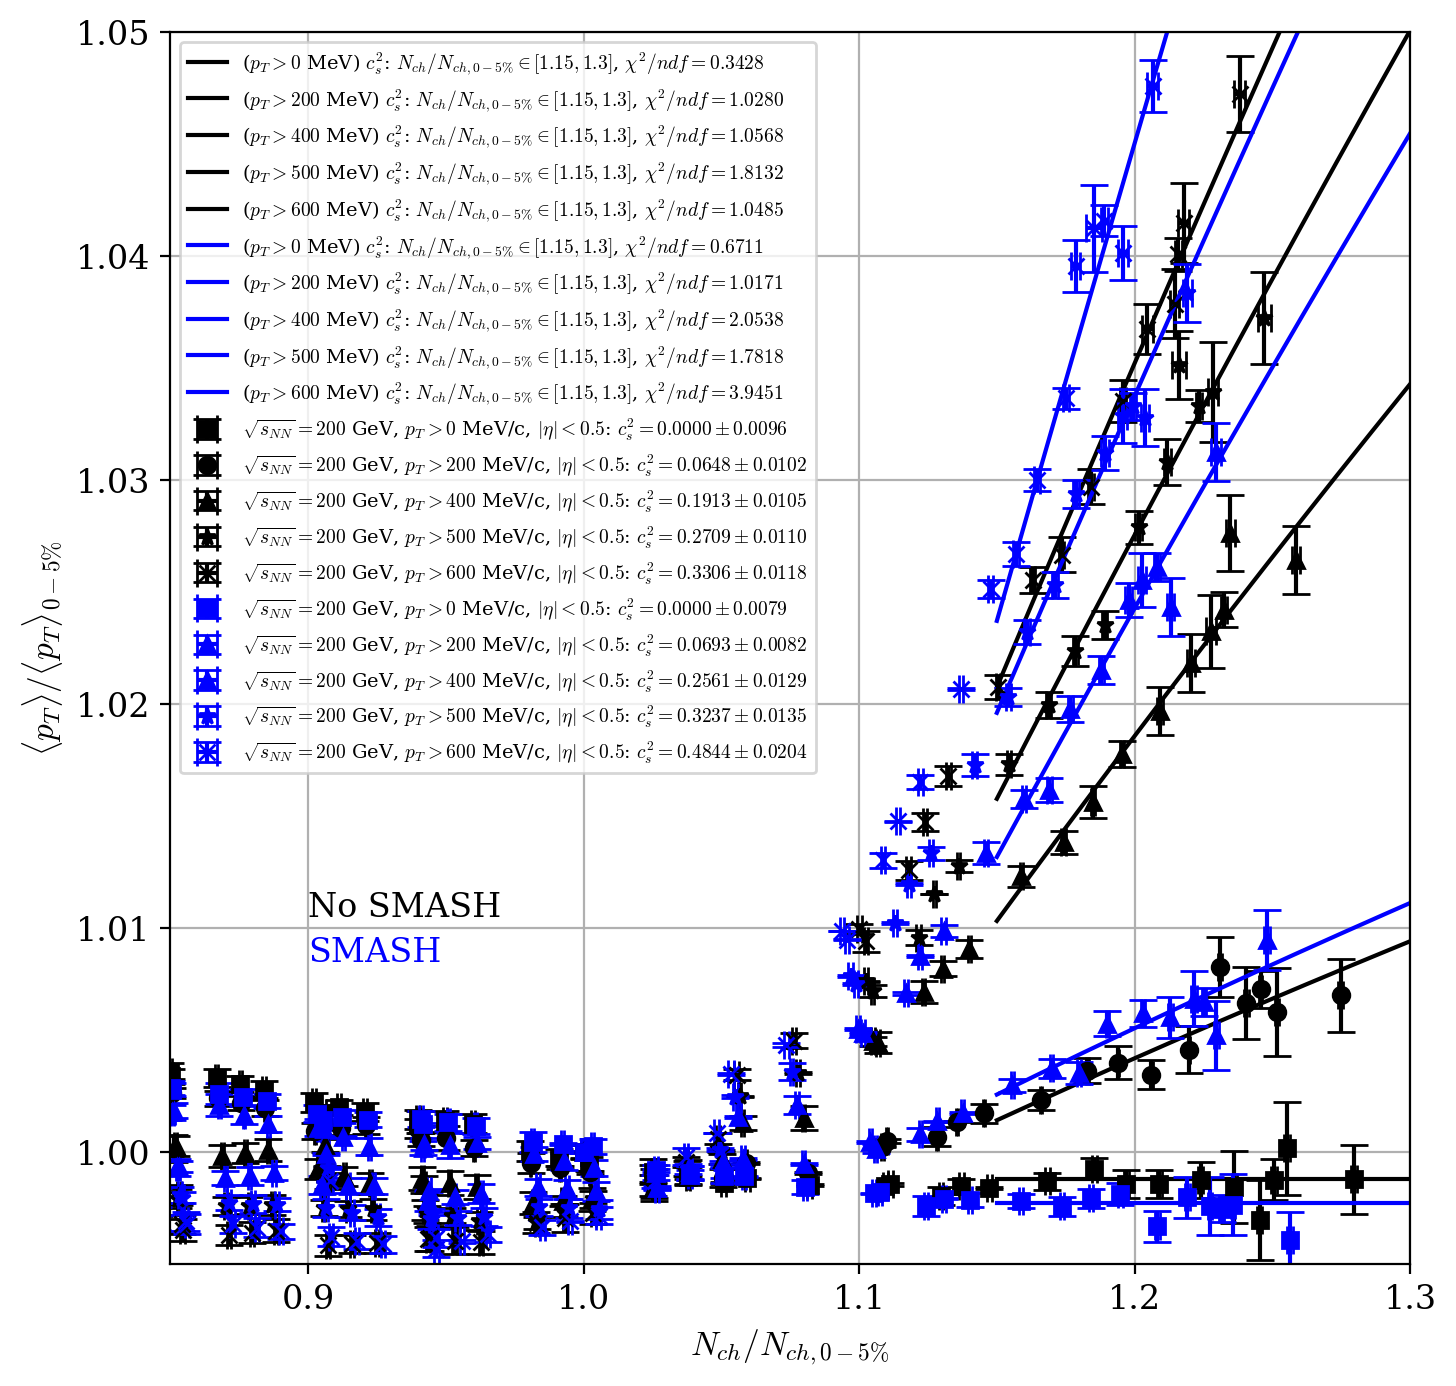

In [33]:
#Plotting NO SMASH

plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 8), dpi=200)

plt.errorbar(NS_MultiplicityCharged_05_5_STARTPC0MeV.ravel(),
             NS_MultiplicityCharged_MeanpT_05_5_STARTPC0MeV.ravel(),
             xerr=NS_MultiplicityCharged_05_Symerr_5_STARTPC0MeV.ravel(),
             yerr=NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC0MeV.ravel(),
             fmt="s",capsize=5,color="black",
             label=f"$\sqrt{{s_{{NN}}}}=200$ GeV, $p_T>0$ MeV/c, $|\eta|<0.5$: $c_s^2={NS_cs2_5_STARTPC0MeV:.4f}\pm{NS_cs2_5_err_STARTPC0MeV:.4f}$")
plt.plot(NS_xfit5_STARTPC0MeV,NS_yfit5_STARTPC0MeV,color="black",
         label=f"($p_T>0$ MeV) $c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{NS_lowerbound_5_STARTPC0MeV},{NS_upperbound_5_STARTPC0MeV}]$," 
          f" $\chi^2/ndf={NS_chi2_ndf_5_STARTPC0MeV:.4f}$")
plt.errorbar(NS_MultiplicityCharged_05_5_STARTPC200MeV.ravel(),
             NS_MultiplicityCharged_MeanpT_05_5_STARTPC200MeV.ravel(),
             xerr=NS_MultiplicityCharged_05_Symerr_5_STARTPC200MeV.ravel(),
             yerr=NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC200MeV.ravel(),
             fmt="o",capsize=5,color="black",
             label=f"$\sqrt{{s_{{NN}}}}=200$ GeV, $p_T>200$ MeV/c, $|\eta|<0.5$: $c_s^2={NS_cs2_5_STARTPC200MeV:.4f}\pm{NS_cs2_5_err_STARTPC200MeV:.4f}$")
plt.plot(NS_xfit5_STARTPC200MeV,NS_yfit5_STARTPC200MeV,color="black",
         label=f"($p_T>200$ MeV) $c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{NS_lowerbound_5_STARTPC200MeV},{NS_upperbound_5_STARTPC200MeV}]$," 
          f" $\chi^2/ndf={NS_chi2_ndf_5_STARTPC200MeV:.4f}$")
plt.errorbar(NS_MultiplicityCharged_05_5_STARTPC400MeV.ravel(),
             NS_MultiplicityCharged_MeanpT_05_5_STARTPC400MeV.ravel(),
             xerr=NS_MultiplicityCharged_05_Symerr_5_STARTPC400MeV.ravel(),
             yerr=NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC400MeV.ravel(),
             fmt="^",capsize=5,color="black",
             label=f"$\sqrt{{s_{{NN}}}}=200$ GeV, $p_T>400$ MeV/c, $|\eta|<0.5$: $c_s^2={NS_cs2_5_STARTPC400MeV:.4f}\pm{NS_cs2_5_err_STARTPC400MeV:.4f}$")
plt.plot(NS_xfit5_STARTPC400MeV,NS_yfit5_STARTPC400MeV,color="black",
         label=f"($p_T>400$ MeV) $c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{NS_lowerbound_5_STARTPC400MeV},{NS_upperbound_5_STARTPC400MeV}]$," 
          f" $\chi^2/ndf={NS_chi2_ndf_5_STARTPC400MeV:.4f}$")
plt.errorbar(NS_MultiplicityCharged_05_5_STARTPC500MeV.ravel(),
             NS_MultiplicityCharged_MeanpT_05_5_STARTPC500MeV.ravel(),
             xerr=NS_MultiplicityCharged_05_Symerr_5_STARTPC500MeV.ravel(),
             yerr=NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC500MeV.ravel(),
             fmt="*",capsize=5,color="black",
             label=f"$\sqrt{{s_{{NN}}}}=200$ GeV, $p_T>500$ MeV/c, $|\eta|<0.5$: $c_s^2={NS_cs2_5_STARTPC500MeV:.4f}\pm{NS_cs2_5_err_STARTPC500MeV:.4f}$")
plt.plot(NS_xfit5_STARTPC500MeV,NS_yfit5_STARTPC500MeV,color="black",
         label=f"($p_T>500$ MeV) $c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{NS_lowerbound_5_STARTPC500MeV},{NS_upperbound_5_STARTPC500MeV}]$," 
          f" $\chi^2/ndf={NS_chi2_ndf_5_STARTPC500MeV:.4f}$")
plt.errorbar(NS_MultiplicityCharged_05_5_STARTPC600MeV.ravel(),
             NS_MultiplicityCharged_MeanpT_05_5_STARTPC600MeV.ravel(),
             xerr=NS_MultiplicityCharged_05_Symerr_5_STARTPC600MeV.ravel(),
             yerr=NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC600MeV.ravel(),
             fmt="x",capsize=5,color="black",
             label=f"$\sqrt{{s_{{NN}}}}=200$ GeV, $p_T>600$ MeV/c, $|\eta|<0.5$: $c_s^2={NS_cs2_5_STARTPC600MeV:.4f}\pm{NS_cs2_5_err_STARTPC600MeV:.4f}$")
plt.plot(NS_xfit5_STARTPC600MeV,NS_yfit5_STARTPC600MeV,color="black",
         label=f"($p_T>600$ MeV) $c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{NS_lowerbound_5_STARTPC600MeV},{NS_upperbound_5_STARTPC600MeV}]$," 
          f" $\chi^2/ndf={NS_chi2_ndf_5_STARTPC600MeV:.4f}$")
# plt.errorbar(NS_MultiplicityCharged_05_5_STARTPC800MeV.ravel(),
#              NS_MultiplicityCharged_MeanpT_05_5_STARTPC800MeV.ravel(),
#              xerr=NS_MultiplicityCharged_05_Symerr_5_STARTPC800MeV.ravel(),
#              yerr=NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC800MeV.ravel(),
#              fmt="D",capsize=5,color="black",
#              label=f"$\sqrt{{s_{{NN}}}}=200$ GeV, $p_T>800$ MeV/c, $|\eta|<0.5$: $c_s^2={NS_cs2_5_STARTPC800MeV:.4f}\pm{NS_cs2_5_err_STARTPC800MeV:.4f}$")
# plt.plot(NS_xfit5_STARTPC800MeV,NS_yfit5_STARTPC800MeV,color="black",
#          label=f"($p_T>800$ MeV) $c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{NS_lowerbound_5_STARTPC800MeV},{NS_upperbound_5_STARTPC800MeV}]$," 
#           f" $\chi^2/ndf={NS_chi2_ndf_5_STARTPC800MeV:.4f}$")



plt.errorbar(S_MultiplicityCharged_05_5_STARTPC0MeV.ravel(),
             S_MultiplicityCharged_MeanpT_05_5_STARTPC0MeV.ravel(),
             xerr=S_MultiplicityCharged_05_Symerr_5_STARTPC0MeV.ravel(),
             yerr=S_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC0MeV.ravel(),
             fmt="s",capsize=5,color="blue",
             label=f"$\sqrt{{s_{{NN}}}}=200$ GeV, $p_T>0$ MeV/c, $|\eta|<0.5$: $c_s^2={S_cs2_5_STARTPC0MeV:.4f}\pm{S_cs2_5_err_STARTPC0MeV:.4f}$")
plt.plot(S_xfit5_STARTPC0MeV,S_yfit5_STARTPC0MeV,color="blue",
         label=f"($p_T>0$ MeV) $c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{S_lowerbound_5_STARTPC0MeV},{S_upperbound_5_STARTPC0MeV}]$," 
          f" $\chi^2/ndf={S_chi2_ndf_5_STARTPC0MeV:.4f}$")
plt.errorbar(S_MultiplicityCharged_05_5_STARTPC200MeV.ravel(),
             S_MultiplicityCharged_MeanpT_05_5_STARTPC200MeV.ravel(),
             xerr=S_MultiplicityCharged_05_Symerr_5_STARTPC200MeV.ravel(),
             yerr=S_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC200MeV.ravel(),
             fmt="^",capsize=5,color="blue",
             label=f"$\sqrt{{s_{{NN}}}}=200$ GeV, $p_T>200$ MeV/c, $|\eta|<0.5$: $c_s^2={S_cs2_5_STARTPC200MeV:.4f}\pm{S_cs2_5_err_STARTPC200MeV:.4f}$")
plt.plot(S_xfit5_STARTPC200MeV,S_yfit5_STARTPC200MeV,color="blue",
         label=f"($p_T>200$ MeV) $c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{S_lowerbound_5_STARTPC200MeV},{S_upperbound_5_STARTPC200MeV}]$," 
          f" $\chi^2/ndf={S_chi2_ndf_5_STARTPC200MeV:.4f}$")
plt.errorbar(S_MultiplicityCharged_05_5_STARTPC400MeV.ravel(),
             S_MultiplicityCharged_MeanpT_05_5_STARTPC400MeV.ravel(),
             xerr=S_MultiplicityCharged_05_Symerr_5_STARTPC400MeV.ravel(),
             yerr=S_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC400MeV.ravel(),
             fmt="^",capsize=5,color="blue",
             label=f"$\sqrt{{s_{{NN}}}}=200$ GeV, $p_T>400$ MeV/c, $|\eta|<0.5$: $c_s^2={S_cs2_5_STARTPC400MeV:.4f}\pm{S_cs2_5_err_STARTPC400MeV:.4f}$")
plt.plot(S_xfit5_STARTPC400MeV,S_yfit5_STARTPC400MeV,color="blue",
         label=f"($p_T>400$ MeV) $c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{S_lowerbound_5_STARTPC400MeV},{S_upperbound_5_STARTPC400MeV}]$," 
          f" $\chi^2/ndf={S_chi2_ndf_5_STARTPC400MeV:.4f}$")

plt.errorbar(S_MultiplicityCharged_05_5_STARTPC500MeV.ravel(),
             S_MultiplicityCharged_MeanpT_05_5_STARTPC500MeV.ravel(),
             xerr=S_MultiplicityCharged_05_Symerr_5_STARTPC500MeV.ravel(),
             yerr=S_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC500MeV.ravel(),
             fmt="*",capsize=5,color="blue",
             label=f"$\sqrt{{s_{{NN}}}}=200$ GeV, $p_T>500$ MeV/c, $|\eta|<0.5$: $c_s^2={S_cs2_5_STARTPC500MeV:.4f}\pm{S_cs2_5_err_STARTPC500MeV:.4f}$")
plt.plot(S_xfit5_STARTPC500MeV,S_yfit5_STARTPC500MeV,color="blue",
         label=f"($p_T>500$ MeV) $c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{S_lowerbound_5_STARTPC500MeV},{S_upperbound_5_STARTPC500MeV}]$," 
          f" $\chi^2/ndf={S_chi2_ndf_5_STARTPC500MeV:.4f}$")

plt.errorbar(S_MultiplicityCharged_05_5_STARTPC600MeV.ravel(),
             S_MultiplicityCharged_MeanpT_05_5_STARTPC600MeV.ravel(),
             xerr=S_MultiplicityCharged_05_Symerr_5_STARTPC600MeV.ravel(),
             yerr=S_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC600MeV.ravel(),
             fmt="x",capsize=5,color="blue",
             label=f"$\sqrt{{s_{{NN}}}}=200$ GeV, $p_T>600$ MeV/c, $|\eta|<0.5$: $c_s^2={S_cs2_5_STARTPC600MeV:.4f}\pm{S_cs2_5_err_STARTPC600MeV:.4f}$")
plt.plot(S_xfit5_STARTPC600MeV,S_yfit5_STARTPC600MeV,color="blue",
         label=f"($p_T>600$ MeV) $c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{S_lowerbound_5_STARTPC600MeV},{S_upperbound_5_STARTPC600MeV}]$," 
          f" $\chi^2/ndf={S_chi2_ndf_5_STARTPC600MeV:.4f}$")
# plt.errorbar(S_MultiplicityCharged_05_5_STARTPC800MeV.ravel(),
#              S_MultiplicityCharged_MeanpT_05_5_STARTPC800MeV.ravel(),
#              xerr=S_MultiplicityCharged_05_Symerr_5_STARTPC800MeV.ravel(),
#              yerr=S_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC800MeV.ravel(),
#              fmt="D",capsize=5,color="blue",
#              label=f"$\sqrt{{s_{{NN}}}}=200$ GeV, $p_T>800$ MeV/c, $|\eta|<0.5$: $c_s^2={S_cs2_5_STARTPC800MeV:.4f}\pm{S_cs2_5_err_STARTPC800MeV:.4f}$")
# plt.plot(S_xfit5_STARTPC800MeV,S_yfit5_STARTPC800MeV,color="blue",
#          label=f"($p_T>800$ MeV) $c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{S_lowerbound_5_STARTPC800MeV},{S_upperbound_5_STARTPC800MeV}]$," 
#           f" $\chi^2/ndf={S_chi2_ndf_5_STARTPC800MeV:.4f}$")

plt.xlim([0.85,1.3])
plt.ylim([0.995,1.05])
plt.xlabel(r"$N_{ch}/N_{ch,0-5\%}$")
plt.ylabel(r"$\langle p_T \rangle/\langle p_T \rangle_{0-5\%}$")
plt.grid()
plt.legend(prop={'size': '7'},loc="upper left")
plt.text(0.9,1.0105,"No SMASH", color="black")
plt.text(0.9,1.0085,"SMASH", color="blue")

In [34]:
# ax1.errorbar(NS_MultiplicityCharged_05_5_STARTPC400MeV.ravel(),
#              NS_MultiplicityCharged_MeanpT_05_5_STARTPC400MeV.ravel(),
#              xerr=NS_MultiplicityCharged_05_Symerr_5_STARTPC400MeV.ravel(),
#              yerr=NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC400MeV.ravel(),
#              fmt=".",capsize=5,color="black",
#              label=f"$\sqrt{{s_{{NN}}}}=200$ GeV, $c_s^2={NS_cs2_5_STARTPC400MeV:.4f}\pm{NS_cs2_5_err_STARTPC400MeV:.4f}$")
# ax1.plot(NS_xfit5_STARTPC400MeV,NS_yfit5_STARTPC400MeV,color="black",
#          label=f"$c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{NS_lowerbound_5_STARTPC400MeV},{NS_upperbound_5_STARTPC400MeV}]$," 
#           f" $\chi^2/ndf={NS_chi2_ndf_5_STARTPC400MeV:.4f}$")
# ax1.errorbar(NS_MultiplicityCharged_05_4_STARTPC400MeV.ravel(),
#              NS_MultiplicityCharged_MeanpT_05_4_STARTPC400MeV.ravel(),
#              xerr=NS_MultiplicityCharged_05_Symerr_4_STARTPC400MeV.ravel(),
#              yerr=NS_MultiplicityCharged_MeanpT_05_Symerr_4_STARTPC400MeV.ravel(),
#              fmt=".",capsize=5,color="green",
#              label=f"$\sqrt{{s_{{NN}}}}=54.4$ GeV, $c_s^2={NS_cs2_4_STARTPC400MeV:.4f}\pm{NS_cs2_4_err_STARTPC400MeV:.4f}$")
# ax1.plot(NS_xfit4_STARTPC400MeV,NS_yfit4_STARTPC400MeV,color="green",
#          label=f"$c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{NS_lowerbound_4_STARTPC400MeV},{NS_upperbound_4_STARTPC400MeV}]$," 
#           f" $\chi^2/ndf={NS_chi2_ndf_4_STARTPC400MeV:.4f}$")
# ax1.errorbar(NS_MultiplicityCharged_05_3_STARTPC400MeV.ravel(),
#              NS_MultiplicityCharged_MeanpT_05_3_STARTPC400MeV.ravel(),
#              xerr=NS_MultiplicityCharged_05_Symerr_3_STARTPC400MeV.ravel(),
#              yerr=NS_MultiplicityCharged_MeanpT_05_Symerr_3_STARTPC400MeV.ravel(),
#              fmt=".",capsize=5,color="blue",
#              label=f"$\sqrt{{s_{{NN}}}}=27$ GeV, $c_s^2={NS_cs2_3_STARTPC400MeV:.4f}\pm{NS_cs2_3_err_STARTPC400MeV:.4f}$")
# ax1.plot(NS_xfit3_STARTPC400MeV,NS_yfit3_STARTPC400MeV,color="blue",
#          label=f"$c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{NS_lowerbound_3_STARTPC400MeV},{NS_upperbound_3_STARTPC400MeV}]$," 
#           f" $\chi^2/ndf={NS_chi2_ndf_3_STARTPC400MeV:.4f}$")
# ax1.errorbar(NS_MultiplicityCharged_05_2_STARTPC400MeV.ravel(),
#              NS_MultiplicityCharged_MeanpT_05_2_STARTPC400MeV.ravel(),
#              xerr=NS_MultiplicityCharged_05_Symerr_2_STARTPC400MeV.ravel(),
#              yerr=NS_MultiplicityCharged_MeanpT_05_Symerr_2_STARTPC400MeV.ravel(),
#              fmt=".",capsize=5,color="red",
#              label=f"$\sqrt{{s_{{NN}}}}=19.6$ GeV, $c_s^2={NS_cs2_2_STARTPC400MeV:.4f}\pm{NS_cs2_2_err_STARTPC400MeV:.4f}$")
# ax1.plot(NS_xfit2_STARTPC400MeV,NS_yfit2_STARTPC400MeV,color="red",
#          label=f"$c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{NS_lowerbound_2_STARTPC400MeV},{NS_upperbound_2_STARTPC400MeV}]$," 
#           f" $\chi^2/ndf={NS_chi2_ndf_2_STARTPC400MeV:.4f}$")
# ax1.errorbar(NS_MultiplicityCharged_05_1_STARTPC400MeV.ravel(),
#              NS_MultiplicityCharged_MeanpT_05_1_STARTPC400MeV.ravel(),
#              xerr=NS_MultiplicityCharged_05_Symerr_1_STARTPC400MeV.ravel(),
#              yerr=NS_MultiplicityCharged_MeanpT_05_Symerr_1_STARTPC400MeV.ravel(),
#              fmt=".",capsize=5,color="purple",
#              label=f"$\sqrt{{s_{{NN}}}}=7.7$ GeV, $c_s^2={NS_cs2_1_STARTPC400MeV:.4f}\pm{NS_cs2_1_err_STARTPC400MeV:.4f}$")
# ax1.plot(NS_xfit1_STARTPC400MeV,NS_yfit1_STARTPC400MeV,color="purple",
#          label=f"$c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{NS_lowerbound_1_STARTPC400MeV},{NS_upperbound_1_STARTPC400MeV}]$," 
#           f" $\chi^2/ndf={NS_chi2_ndf_1_STARTPC400MeV:.4f}$")
# ax1.errorbar([],[],color="white",label=f"$N_{{ch}}\in p_T>400$ MeV/c, $|\eta|<0.5.$\nHadron Cascade Disabled.")
# ax1.set_xlim([0.85,1.3])
# ax1.set_ylim([0.995,1.05])
# ax1.grid()
# ax1.set_xlabel(r"$N_{ch}/N_{ch,0-5\%}$")
# ax1.set_ylabel(r"$\langle p_T \rangle/\langle p_T \rangle_{0-5\%}$")
# ax1.legend(prop={'size': '9'},loc="upper left")

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\%'
<>:12: SyntaxWarning: invalid escape sequence '\i'
<>:13: SyntaxWarning: invalid escape sequence '\c'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:21: SyntaxWarning: invalid escape sequence '\%'
<>:21: SyntaxWarning: invalid escape sequence '\i'
<>:22: SyntaxWarning: invalid escape sequence '\c'
<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:30: SyntaxWarning: invalid escape sequence '\%'
<>:30: SyntaxWarning: invalid escape sequence '\i'
<>:31: SyntaxWarning: invalid escape sequence '\c'
<>:37: SyntaxWarning: invalid escape sequence '\s'
<>:37: SyntaxWarning: invalid escape sequence '\p'
<>:39: SyntaxWarning: invalid escape sequence '\%'
<>:39: SyntaxWarning: invalid escape sequence '\i'
<>:40: SyntaxWarning: invalid e

Text(0, 0.5, '$\\langle p_T \\rangle/\\langle p_T \\rangle_{0-5\\%}$')

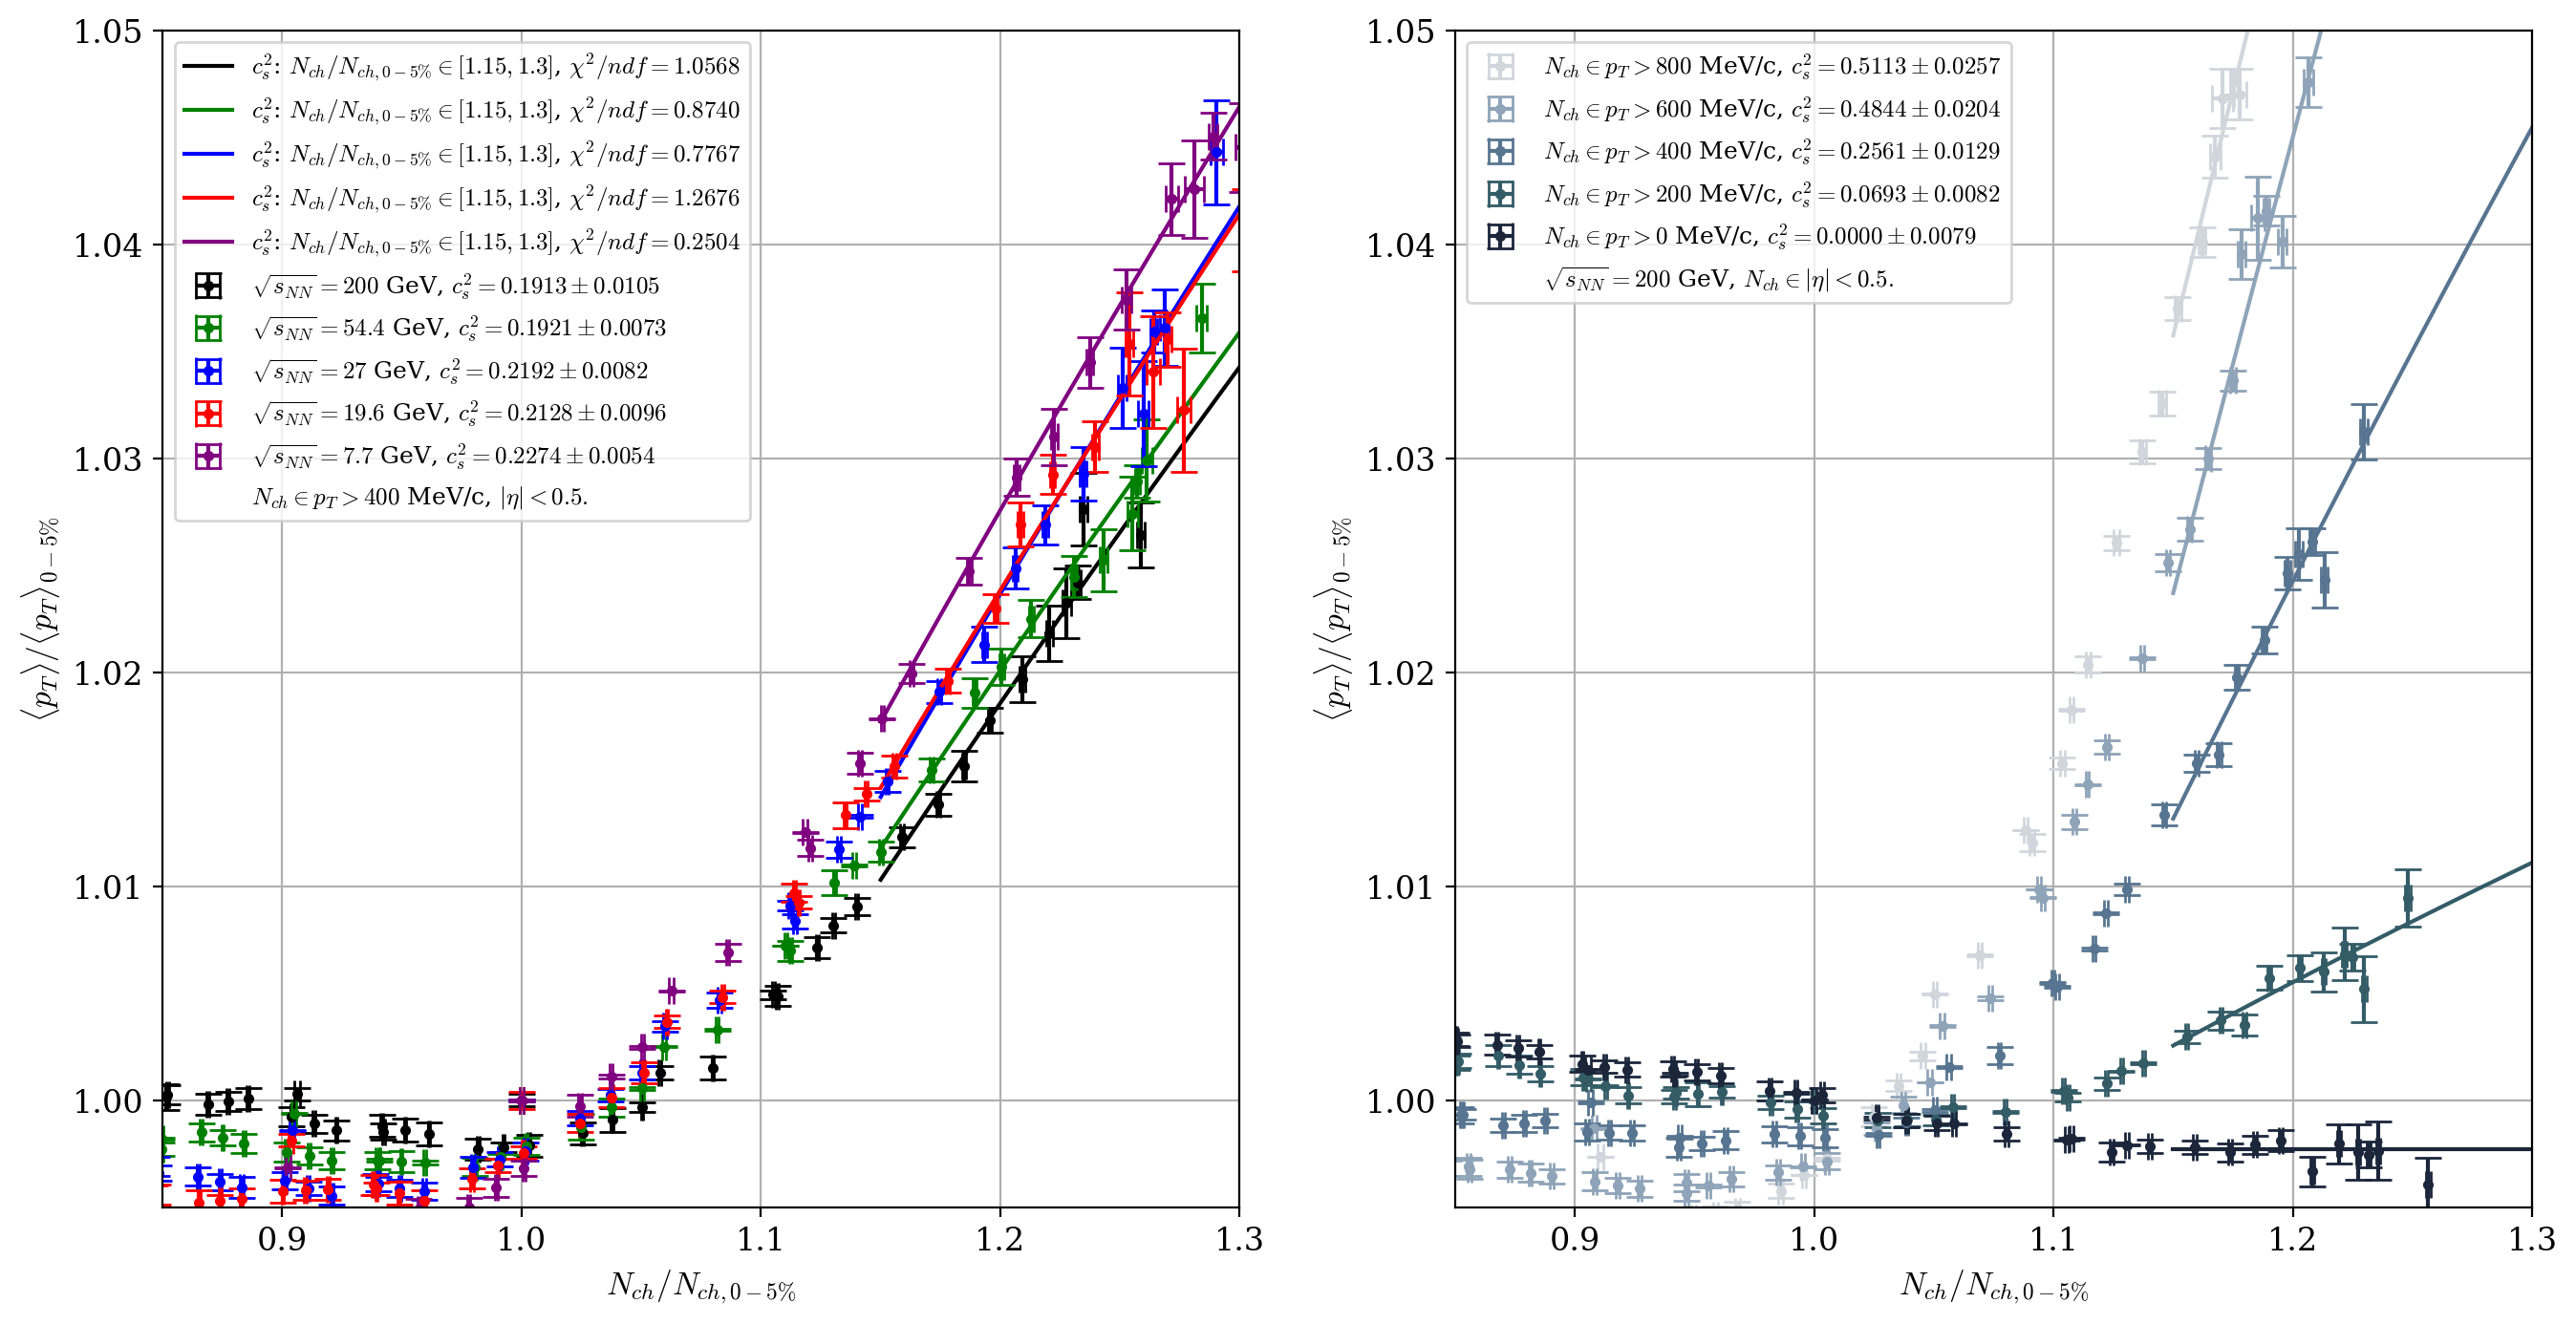

In [ ]:
plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), dpi=200)

ax1.errorbar(NS_MultiplicityCharged_05_5_STARTPC400MeV.ravel(),
             NS_MultiplicityCharged_MeanpT_05_5_STARTPC400MeV.ravel(),
             xerr=NS_MultiplicityCharged_05_Symerr_5_STARTPC400MeV.ravel(),
             yerr=NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC400MeV.ravel(),
             fmt=".",capsize=5,color="black",
             label=f"$\sqrt{{s_{{NN}}}}=200$ GeV, $c_s^2={NS_cs2_5_STARTPC400MeV:.4f}\pm{NS_cs2_5_err_STARTPC400MeV:.4f}$")
ax1.plot(NS_xfit5_STARTPC400MeV,NS_yfit5_STARTPC400MeV,color="black",
         label=f"$c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{NS_lowerbound_5_STARTPC400MeV},{NS_upperbound_5_STARTPC400MeV}]$," 
          f" $\chi^2/ndf={NS_chi2_ndf_5_STARTPC400MeV:.4f}$")
ax1.errorbar(NS_MultiplicityCharged_05_4_STARTPC400MeV.ravel(),
             NS_MultiplicityCharged_MeanpT_05_4_STARTPC400MeV.ravel(),
             xerr=NS_MultiplicityCharged_05_Symerr_4_STARTPC400MeV.ravel(),
             yerr=NS_MultiplicityCharged_MeanpT_05_Symerr_4_STARTPC400MeV.ravel(),
             fmt=".",capsize=5,color="green",
             label=f"$\sqrt{{s_{{NN}}}}=54.4$ GeV, $c_s^2={NS_cs2_4_STARTPC400MeV:.4f}\pm{NS_cs2_4_err_STARTPC400MeV:.4f}$")
ax1.plot(NS_xfit4_STARTPC400MeV,NS_yfit4_STARTPC400MeV,color="green",
         label=f"$c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{NS_lowerbound_4_STARTPC400MeV},{NS_upperbound_4_STARTPC400MeV}]$," 
          f" $\chi^2/ndf={NS_chi2_ndf_4_STARTPC400MeV:.4f}$")
ax1.errorbar(NS_MultiplicityCharged_05_3_STARTPC400MeV.ravel(),
             NS_MultiplicityCharged_MeanpT_05_3_STARTPC400MeV.ravel(),
             xerr=NS_MultiplicityCharged_05_Symerr_3_STARTPC400MeV.ravel(),
             yerr=NS_MultiplicityCharged_MeanpT_05_Symerr_3_STARTPC400MeV.ravel(),
             fmt=".",capsize=5,color="blue",
             label=f"$\sqrt{{s_{{NN}}}}=27$ GeV, $c_s^2={NS_cs2_3_STARTPC400MeV:.4f}\pm{NS_cs2_3_err_STARTPC400MeV:.4f}$")
ax1.plot(NS_xfit3_STARTPC400MeV,NS_yfit3_STARTPC400MeV,color="blue",
         label=f"$c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{NS_lowerbound_3_STARTPC400MeV},{NS_upperbound_3_STARTPC400MeV}]$," 
          f" $\chi^2/ndf={NS_chi2_ndf_3_STARTPC400MeV:.4f}$")
ax1.errorbar(NS_MultiplicityCharged_05_2_STARTPC400MeV.ravel(),
             NS_MultiplicityCharged_MeanpT_05_2_STARTPC400MeV.ravel(),
             xerr=NS_MultiplicityCharged_05_Symerr_2_STARTPC400MeV.ravel(),
             yerr=NS_MultiplicityCharged_MeanpT_05_Symerr_2_STARTPC400MeV.ravel(),
             fmt=".",capsize=5,color="red",
             label=f"$\sqrt{{s_{{NN}}}}=19.6$ GeV, $c_s^2={NS_cs2_2_STARTPC400MeV:.4f}\pm{NS_cs2_2_err_STARTPC400MeV:.4f}$")
ax1.plot(NS_xfit2_STARTPC400MeV,NS_yfit2_STARTPC400MeV,color="red",
         label=f"$c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{NS_lowerbound_2_STARTPC400MeV},{NS_upperbound_2_STARTPC400MeV}]$," 
          f" $\chi^2/ndf={NS_chi2_ndf_2_STARTPC400MeV:.4f}$")
ax1.errorbar(NS_MultiplicityCharged_05_1_STARTPC400MeV.ravel(),
             NS_MultiplicityCharged_MeanpT_05_1_STARTPC400MeV.ravel(),
             xerr=NS_MultiplicityCharged_05_Symerr_1_STARTPC400MeV.ravel(),
             yerr=NS_MultiplicityCharged_MeanpT_05_Symerr_1_STARTPC400MeV.ravel(),
             fmt=".",capsize=5,color="purple",
             label=f"$\sqrt{{s_{{NN}}}}=7.7$ GeV, $c_s^2={NS_cs2_1_STARTPC400MeV:.4f}\pm{NS_cs2_1_err_STARTPC400MeV:.4f}$")
ax1.plot(NS_xfit1_STARTPC400MeV,NS_yfit1_STARTPC400MeV,color="purple",
         label=f"$c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{NS_lowerbound_1_STARTPC400MeV},{NS_upperbound_1_STARTPC400MeV}]$," 
          f" $\chi^2/ndf={NS_chi2_ndf_1_STARTPC400MeV:.4f}$")
ax1.errorbar([],[],color="white",label=f"$N_{{ch}}\in p_T>400$ MeV/c, $|\eta|<0.5.$")
ax1.set_xlim([0.85,1.3])
ax1.set_ylim([0.995,1.05])
ax1.grid()
ax1.set_xlabel(r"$N_{ch}/N_{ch,0-5\%}$")
ax1.set_ylabel(r"$\langle p_T \rangle/\langle p_T \rangle_{0-5\%}$")
ax1.legend(prop={'size': '9'},loc="upper left")




ax2.errorbar(NS_MultiplicityCharged_05_5_STARTPC800MeV.ravel(),
             NS_MultiplicityCharged_MeanpT_05_5_STARTPC800MeV.ravel(),
             xerr=NS_MultiplicityCharged_05_Symerr_5_STARTPC800MeV.ravel(),
             yerr=NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC800MeV.ravel(),
             fmt=".",capsize=5,color="#D0D6DC",
             label=f"$N_{{ch}}\in p_T>800$ MeV/c, $c_s^2={NS_cs2_5_STARTPC800MeV:.4f}\pm{NS_cs2_5_err_STARTPC800MeV:.4f}$")
ax2.plot(NS_xfit5_STARTPC800MeV,NS_yfit5_STARTPC800MeV,color="#D0D6DC")
        #  label=f"$c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{S_lowerbound_5_STARTPC800MeV},{S_upperbound_5_STARTPC800MeV}]$," 
        #   f" $\chi^2/ndf={S_chi2_ndf_5_STARTPC800MeV:.4f}$")
ax2.errorbar(NS_MultiplicityCharged_05_5_STARTPC600MeV.ravel(),
             NS_MultiplicityCharged_MeanpT_05_5_STARTPC600MeV.ravel(),
             xerr=NS_MultiplicityCharged_05_Symerr_5_STARTPC600MeV.ravel(),
             yerr=NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC600MeV.ravel(),
             fmt=".",capsize=5,color="#8FA4B8",
             label=f"$N_{{ch}}\in p_T>600$ MeV/c, $c_s^2={NS_cs2_5_STARTPC600MeV:.4f}\pm{NS_cs2_5_err_STARTPC600MeV:.4f}$")
ax2.plot(S_xfit5_STARTPC600MeV,S_yfit5_STARTPC600MeV,color="#8FA4B8")
        #  label=f"$c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{S_lowerbound_5_STARTPC600MeV},{S_upperbound_5_STARTPC600MeV}]$," 
        #   f" $\chi^2/ndf={S_chi2_ndf_5_STARTPC600MeV:.4f}$")
ax2.errorbar(NS_MultiplicityCharged_05_5_STARTPC400MeV.ravel(),
             NS_MultiplicityCharged_MeanpT_05_5_STARTPC400MeV.ravel(),
             xerr=NS_MultiplicityCharged_05_Symerr_5_STARTPC400MeV.ravel(),
             yerr=NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC400MeV.ravel(),
             fmt=".",capsize=5,color="#577590",
             label=f"$N_{{ch}}\in p_T>400$ MeV/c, $c_s^2={NS_cs2_5_STARTPC400MeV:.4f}\pm{NS_cs2_5_err_STARTPC400MeV:.4f}$")
ax2.plot(NS_xfit5_STARTPC400MeV,NS_yfit5_STARTPC400MeV,color="#577590")
        #  label=f"$c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{S_lowerbound_5_STARTPC400MeV},{S_upperbound_5_STARTPC400MeV}]$," 
        #   f" $\chi^2/ndf={S_chi2_ndf_5_STARTPC400MeV:.4f}$")
ax2.errorbar(NS_MultiplicityCharged_05_5_STARTPC200MeV.ravel(),
             NS_MultiplicityCharged_MeanpT_05_5_STARTPC200MeV.ravel(),
             xerr=NS_MultiplicityCharged_05_Symerr_5_STARTPC200MeV.ravel(),
             yerr=NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC200MeV.ravel(),
             fmt=".",capsize=5,color="#335C67",
             label=f"$N_{{ch}}\in p_T>200$ MeV/c, $c_s^2={NS_cs2_5_STARTPC200MeV:.4f}\pm{NS_cs2_5_err_STARTPC200MeV:.4f}$")
ax2.plot(S_xfit5_STARTPC200MeV,S_yfit5_STARTPC200MeV,color="#335C67")
        #  label=f"$c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{S_lowerbound_5_STARTPC200MeV},{S_upperbound_5_STARTPC200MeV}]$," 
        #   f" $\chi^2/ndf={S_chi2_ndf_5_STARTPC200MeV:.4f}$")
ax2.errorbar(NS_MultiplicityCharged_05_5_STARTPC0MeV.ravel(),
             NS_MultiplicityCharged_MeanpT_05_5_STARTPC0MeV.ravel(),
             xerr=NS_MultiplicityCharged_05_Symerr_5_STARTPC0MeV.ravel(),
             yerr=NS_MultiplicityCharged_MeanpT_05_Symerr_5_STARTPC0MeV.ravel(),
             fmt=".",capsize=5,color="#1B263B",
             label=f"$N_{{ch}}\in p_T>0$ MeV/c, $c_s^2={NS_cs2_5_STARTPC0MeV:.4f}\pm{NS_cs2_5_err_STARTPC0MeV:.4f}$")
ax2.plot(NS_xfit5_STARTPC0MeV,NS_yfit5_STARTPC0MeV,color="#1B263B")
        #  label=f"$c_s^2$: $N_{{ch}}/N_{{ch,0-5\%}}\in[{S_lowerbound_5_STARTPC0MeV},{S_upperbound_5_STARTPC0MeV}]$," 
        #   f" $\chi^2/ndf={S_chi2_ndf_5_STARTPC0MeV:.4f}$")
ax2.errorbar([],[],color="white",label=f"$\sqrt{{s_{{NN}}}}=200$ GeV, $N_{{ch}}\in |\eta|<0.5.$")
ax2.legend(prop={'size': '9'},loc="upper left")
ax2.set_xlim([0.85,1.3])
ax2.set_ylim([0.995,1.05])
ax2.grid()
ax2.set_xlabel(r"$N_{ch}/N_{ch,0-5\%}$")
ax2.set_ylabel(r"$\langle p_T \rangle/\langle p_T \rangle_{0-5\%}$")

In [36]:
#pT threshold study. Smash and No Smash

NS_pT_cuts = np.array([0,200,400,450,500,550,600,800,1000])
NS_pT_cuts_cs2_vals = np.array([NS_cs2_5_STARTPC0MeV,NS_cs2_5_STARTPC200MeV,NS_cs2_5_STARTPC400MeV,NS_cs2_5_STARTPC450MeV,NS_cs2_5_STARTPC500MeV,NS_cs2_5_STARTPC550MeV,NS_cs2_5_STARTPC600MeV,NS_cs2_5_STARTPC800MeV,NS_cs2_5_STARTPC1000MeV])
NS_pT_cuts_cs2_errs = np.array([NS_cs2_5_err_STARTPC0MeV,NS_cs2_5_err_STARTPC200MeV,NS_cs2_5_err_STARTPC400MeV,NS_cs2_5_err_STARTPC450MeV,NS_cs2_5_err_STARTPC500MeV,NS_cs2_5_err_STARTPC550MeV,NS_cs2_5_err_STARTPC600MeV,NS_cs2_5_err_STARTPC800MeV,NS_cs2_5_err_STARTPC1000MeV])

S_pT_cuts = np.array([0,200,400,500,600,800])
S_pT_cuts_cs2_vals = np.array([S_cs2_5_STARTPC0MeV,S_cs2_5_STARTPC200MeV,S_cs2_5_STARTPC400MeV,S_cs2_5_STARTPC500MeV,S_cs2_5_STARTPC600MeV,S_cs2_5_STARTPC800MeV])
S_pT_cuts_cs2_errs = np.array([S_cs2_5_err_STARTPC0MeV,S_cs2_5_err_STARTPC200MeV,S_cs2_5_err_STARTPC400MeV,S_cs2_5_err_STARTPC500MeV,S_cs2_5_err_STARTPC600MeV,S_cs2_5_err_STARTPC800MeV])

<>:59: SyntaxWarning: invalid escape sequence '\%'
<>:59: SyntaxWarning: invalid escape sequence '\i'
<>:73: SyntaxWarning: invalid escape sequence '\%'
<>:73: SyntaxWarning: invalid escape sequence '\i'
<>:86: SyntaxWarning: invalid escape sequence '\s'
<>:59: SyntaxWarning: invalid escape sequence '\%'
<>:59: SyntaxWarning: invalid escape sequence '\i'
<>:73: SyntaxWarning: invalid escape sequence '\%'
<>:73: SyntaxWarning: invalid escape sequence '\i'
<>:86: SyntaxWarning: invalid escape sequence '\s'
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_4070/2329921468.py:59: SyntaxWarning: invalid escape sequence '\%'
  label=f"Fit range: $N_{{ch}}/N_{{ch,0-5\%}}\in[{NS_lowerbound_5_STARTPC200MeV},{NS_upperbound_5_STARTPC200MeV}]$.\nHadronic contributions NOT included.")
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_4070/2329921468.py:59: SyntaxWarning: invalid escape sequence '\i'
  label=f"Fit range: $N_{{ch}}/N_{{ch,0-5\%}}\in[{NS_lowerbound_5_STARTPC200MeV},{

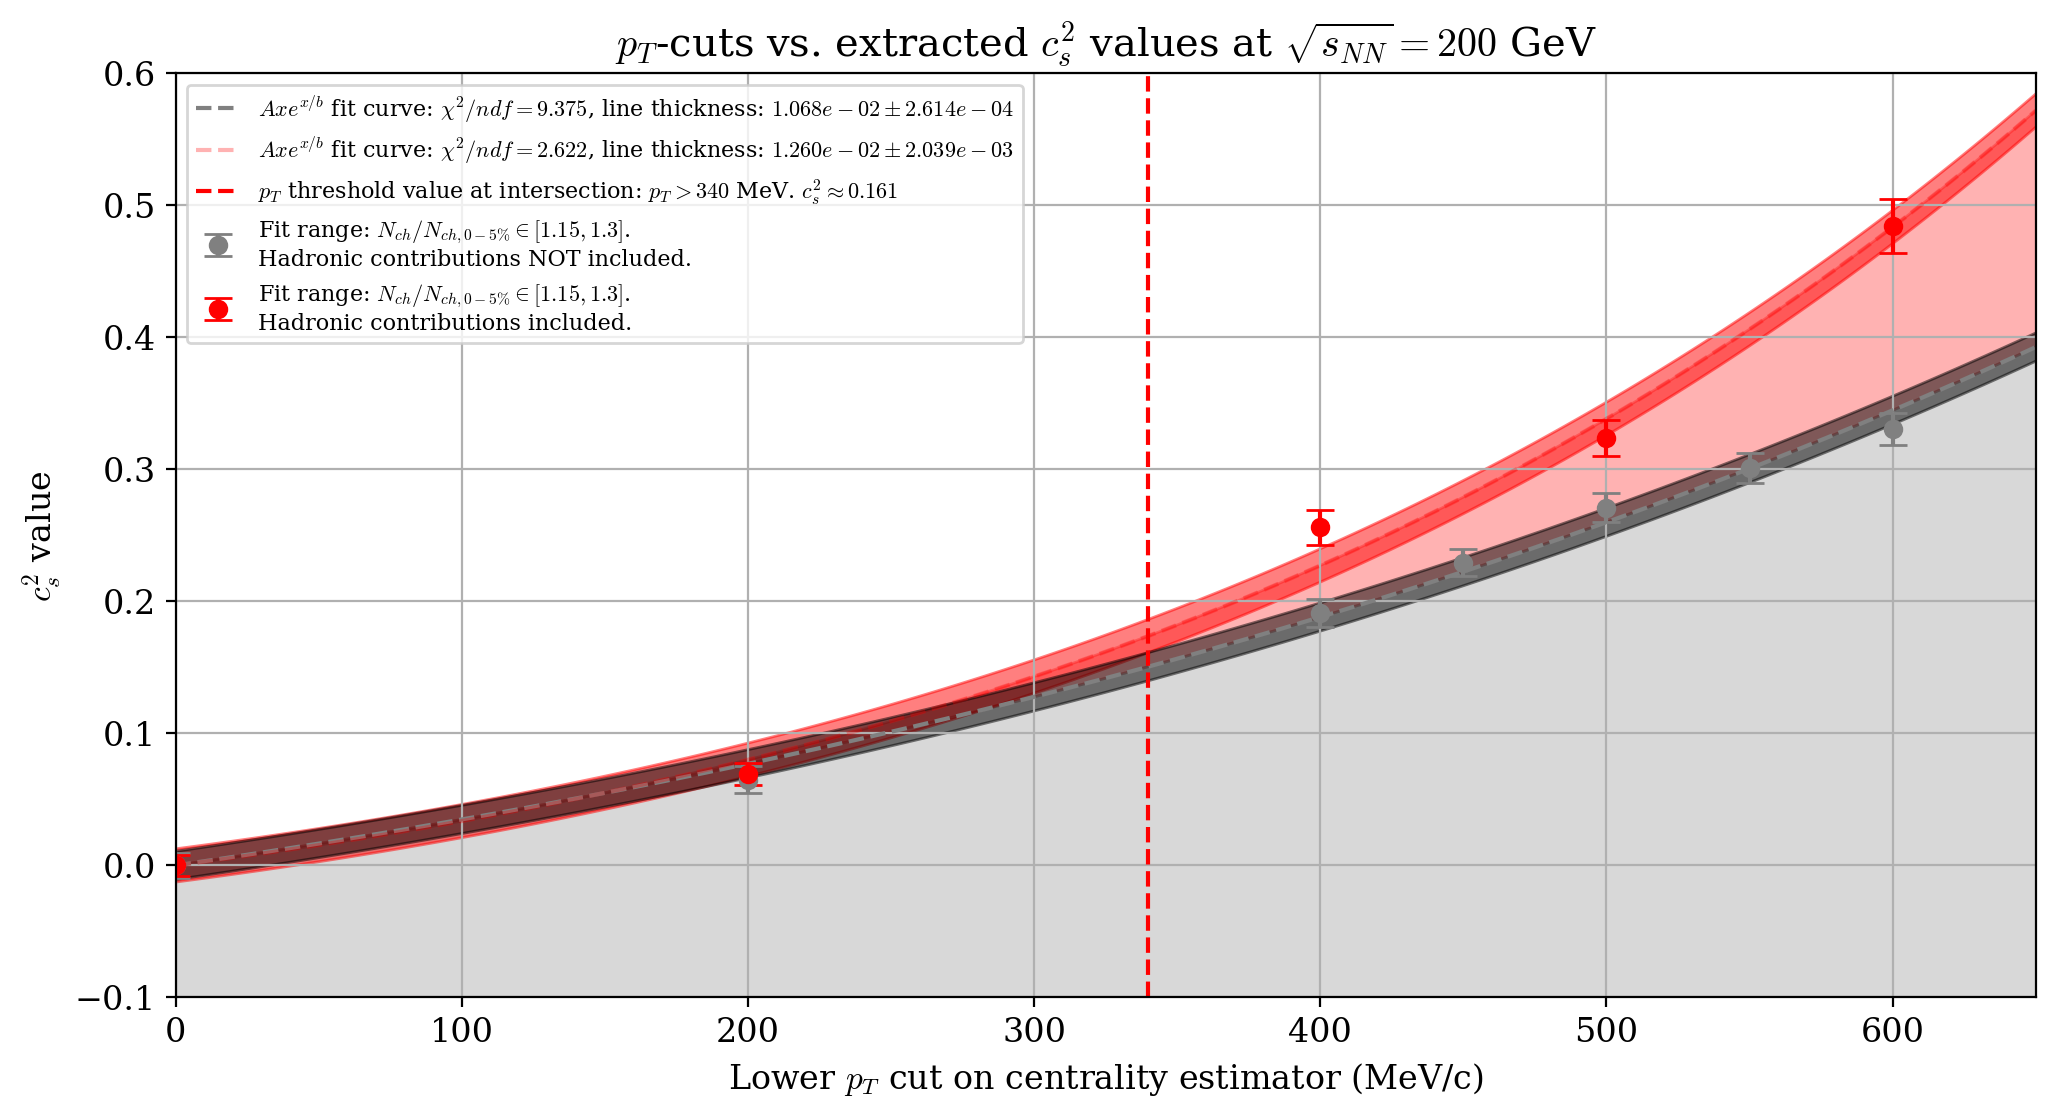

In [37]:
#pT threshold plots

plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(12, 6), dpi=200)

def linear_pt_threshold_fit(x,A,B):
    return A*x+B

def exponential_pt_threshold_fit(x,A, p0):
    return x * A * (np.e**(x / p0))

NS_popt_line, NS_pcov_line = curve_fit(
    lambda x, A, B: linear_pt_threshold_fit(x,A,B),
    NS_pT_cuts[:-2], NS_pT_cuts_cs2_vals[:-2], sigma=NS_pT_cuts_cs2_errs[:-2], absolute_sigma=True, p0=[6e-4, 0], bounds=([0,-100],[100,100]), maxfev=100000
)

NS_popt_exp, NS_pcov_exp = curve_fit(
    lambda x, A, p0: exponential_pt_threshold_fit(x,A, p0),
    NS_pT_cuts[:-2], NS_pT_cuts_cs2_vals[:-2], sigma=NS_pT_cuts_cs2_errs[:-2], absolute_sigma=True, p0=[1,1000], bounds=([0,0],[1,1000]), maxfev=100000
)

NS_Slope_Parameter_val = NS_popt_line[0]
NS_Slope_Parameter_err = np.sqrt(NS_pcov_line[0][0])

S_popt_line, S_pcov_line = curve_fit(
    lambda x, A, B: linear_pt_threshold_fit(x,A,B),
    S_pT_cuts[:-1], S_pT_cuts_cs2_vals[:-1], sigma=S_pT_cuts_cs2_errs[:-1], absolute_sigma=True, p0=[6e-4, 0], bounds=([0,-100],[100,100]), maxfev=100000
)

S_popt_exp, S_pcov_exp = curve_fit(
    lambda x, A, p0: exponential_pt_threshold_fit(x,A, p0),
    S_pT_cuts[:-1], S_pT_cuts_cs2_vals[:-1], sigma=S_pT_cuts_cs2_errs[:-1], absolute_sigma=True, p0=[1,1000], bounds=([0,0],[1,1000]), maxfev=100000
)

S_Slope_Parameter_val = S_popt_line[0]
S_Slope_Parameter_err = np.sqrt(S_pcov_line[0][0])

NS_xfit_line = np.linspace(0,1500,10000)
NS_yfit_line = linear_pt_threshold_fit(NS_xfit_line, *NS_popt_line)
NS_yfit_exp = exponential_pt_threshold_fit(NS_xfit_line, *NS_popt_exp)
NS_chi2_line, NS_ndf_line, NS_chi2_ndf_line = compute_chi2_ndf(NS_pT_cuts[:-2], NS_pT_cuts_cs2_vals[:-2], NS_pT_cuts_cs2_errs[:-2], linear_pt_threshold_fit, NS_popt_line)
NS_chi2_exp, NS_ndf_exp, NS_chi2_ndf_exp = compute_chi2_ndf(NS_pT_cuts[:-1], NS_pT_cuts_cs2_vals[:-1], NS_pT_cuts_cs2_errs[:-1], exponential_pt_threshold_fit, NS_popt_exp)

S_xfit_line = np.linspace(0,1500,10000)
S_yfit_line = linear_pt_threshold_fit(S_xfit_line, *S_popt_line)
S_yfit_exp = exponential_pt_threshold_fit(S_xfit_line, *S_popt_exp)
S_chi2_line, S_ndf_line, S_chi2_ndf_line = compute_chi2_ndf(S_pT_cuts[:-1], S_pT_cuts_cs2_vals[:-1], S_pT_cuts_cs2_errs[:-1], linear_pt_threshold_fit, S_popt_line)
S_chi2_exp, S_ndf_exp, S_chi2_ndf_exp = compute_chi2_ndf(S_pT_cuts[:-1], S_pT_cuts_cs2_vals[:-1], S_pT_cuts_cs2_errs[:-1], exponential_pt_threshold_fit, S_popt_exp)

S_linethickness_val = np.mean(S_pT_cuts_cs2_errs[:-1])
S_linethickness_err = np.std(S_pT_cuts_cs2_errs[:-1])/np.sqrt(len(S_pT_cuts_cs2_errs[:-1]))

NS_linethickness_val = np.mean(NS_pT_cuts_cs2_errs[:-2])
NS_linethickness_err = np.std(NS_pT_cuts_cs2_errs[:-2])/np.sqrt(len(NS_pT_cuts_cs2_errs[:-2]))

plt.errorbar(NS_pT_cuts,NS_pT_cuts_cs2_vals,yerr=NS_pT_cuts_cs2_errs,
             fmt="o",capsize=5,color="gray",
             label=f"Fit range: $N_{{ch}}/N_{{ch,0-5\%}}\in[{NS_lowerbound_5_STARTPC200MeV},{NS_upperbound_5_STARTPC200MeV}]$.\nHadronic contributions NOT included.")
# plt.plot(NS_xfit_line, NS_yfit_line, color="black",linestyle="--",
#          label=f"Linear fit curve: $\chi^2/ndf={NS_chi2_ndf_line:.3f}$, Slope: $A={NS_Slope_Parameter_val:.3e}\pm{NS_Slope_Parameter_err:.3e}$")
plt.plot(NS_xfit_line, NS_yfit_exp, color="gray",linestyle="--",
         label=rf"$Axe^{{x/b}}$ fit curve: $\chi^2/ndf={NS_chi2_ndf_exp:.3f}$, line thickness: ${NS_linethickness_val:.3e}\pm{NS_linethickness_err:.3e}$")

# cs2_val_at_intersection = min(np.abs((S_yfit_exp-S_linethickness_val)-(NS_yfit_exp+NS_linethickness_val)))
# print(cs2_val_at_intersection)
pT_cut_idx = np.argmin(np.abs((S_yfit_exp-S_linethickness_val)-(NS_yfit_exp+NS_linethickness_val)))
pt_cut_at_min_difference = S_xfit_line[pT_cut_idx]
cs2_val_at_intersection = S_yfit_exp[pT_cut_idx]-S_linethickness_val

plt.errorbar(S_pT_cuts,S_pT_cuts_cs2_vals,yerr=S_pT_cuts_cs2_errs,fmt="o",
             capsize=5,color="red",
             label=f"Fit range: $N_{{ch}}/N_{{ch,0-5\%}}\in[{S_lowerbound_5_STARTPC200MeV},{S_upperbound_5_STARTPC200MeV}]$.\nHadronic contributions included.")
plt.plot(S_xfit_line, S_yfit_exp, color="red",linestyle="--", alpha=0.3,
         label=rf"$Axe^{{x/b}}$ fit curve: $\chi^2/ndf={S_chi2_ndf_exp:.3f}$, line thickness: ${S_linethickness_val:.3e}\pm{S_linethickness_err:.3e}$")
plt.fill_between(S_xfit_line, S_yfit_exp, NS_yfit_exp,color="red",alpha=0.3)
plt.fill_between(S_xfit_line, -1, NS_yfit_exp,color="gray",alpha=0.3)
# plt.fill_between(S_xfit_line, S_yfit_exp, NS_yfit_line,color="red",alpha=0.3)
plt.fill_between(S_xfit_line, S_yfit_exp+S_linethickness_val, S_yfit_exp-S_linethickness_val,color="red",alpha=0.5)
plt.axvline(x=pt_cut_at_min_difference,color="red",linestyle="--",label=rf"$p_T$ threshold value at intersection: $p_T>{pt_cut_at_min_difference:.0f}$ MeV. $c_s^2\approx{cs2_val_at_intersection:.3f}$")
# plt.fill_between(S_xfit_line, -1, NS_yfit_line,color="black",alpha=0.3)
plt.fill_between(NS_xfit_line, NS_yfit_exp+NS_linethickness_val, NS_yfit_exp-NS_linethickness_val,color="black",alpha=0.5)
plt.grid()
plt.xlim([0,650])
plt.ylim([-0.1,0.6])
plt.title("$p_T$-cuts vs. extracted $c_s^2$ values at $\sqrt{s_{NN}}=200$ GeV")
plt.xlabel("Lower $p_T$ cut on centrality estimator (MeV/c)")
plt.ylabel("$c_s^2$ value")
plt.legend(prop={'size': '8'},loc="upper left")

In [38]:
print(pt_cut_at_min_difference)

339.93399339933995


In [39]:
print(S_pT_cuts_cs2_errs)
print(np.mean(S_pT_cuts_cs2_errs))
print(np.std(S_pT_cuts_cs2_errs)/np.sqrt(len(S_pT_cuts_cs2_errs)))

[0.00786319 0.00823411 0.01292904 0.01351866 0.02044383 0.02570048]
0.01478155146194747
0.002619604432640132


In [40]:
print(S_pT_cuts[1:-1])
print(NS_pT_cuts[:-2])

[200 400 500 600]
[  0 200 400 450 500 550 600]


(21,)
(21,)


(-0.2, 10.0)

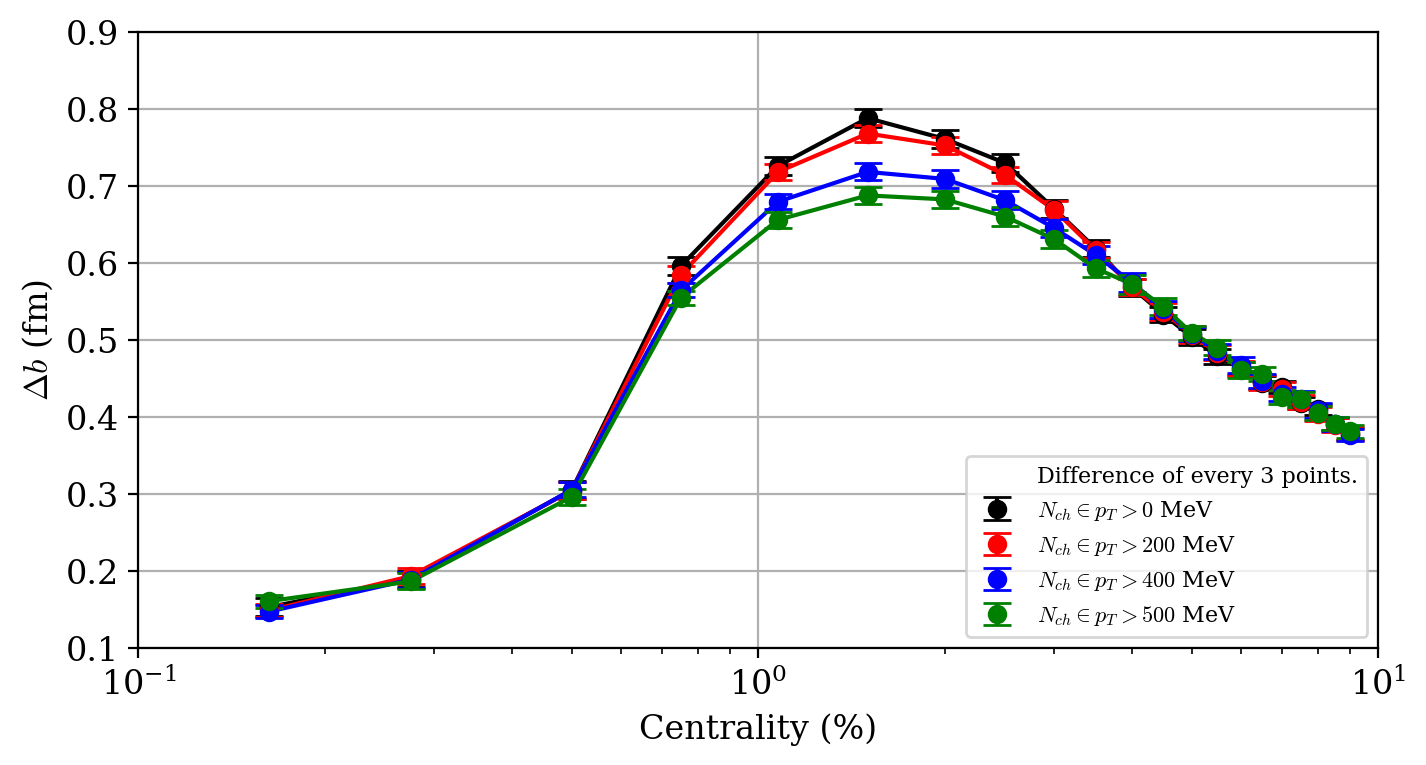

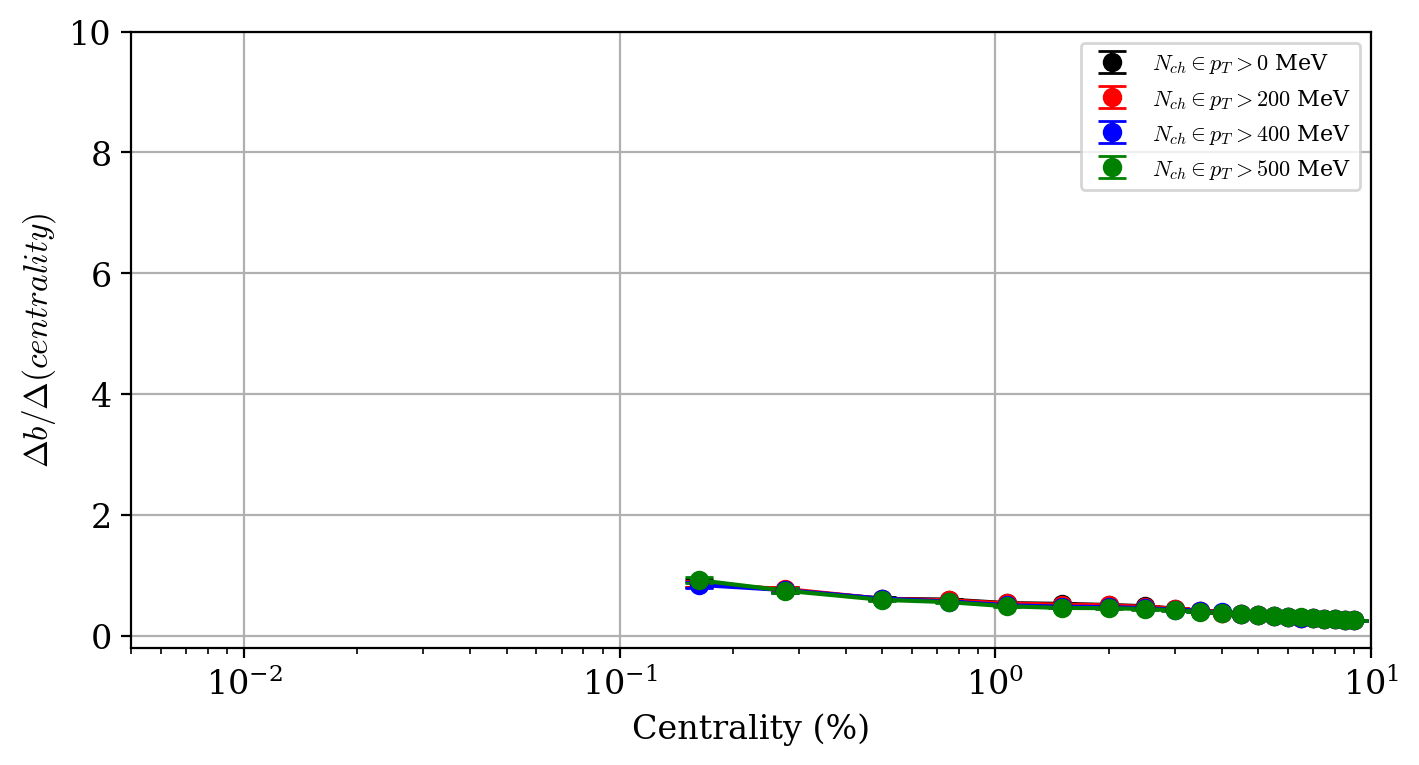

In [41]:
# Select the last 32 centrality bins before sorting
Centrality_subset = Centrality.ravel()[-24:]
subset_indices = np.arange(len(Centrality.ravel()))[-24:]

# Sort that subset
sorting_term = np.argsort(Centrality_subset)
sorted_Centrality = Centrality_subset[sorting_term]

n_dpoints = 3  # difference step

# Helper to slice, sort, and compute deltas
def get_vals_and_errs(values, errors, subset_indices, sorting_term):
    vals = values.ravel()[subset_indices][sorting_term]
    errs = errors.ravel()[subset_indices][sorting_term]
    return vals, errs

# Get sorted values and errors (last 32 bins only)
vals_0, errs_0 = get_vals_and_errs(S_ImpactParameter_values_5_STARTPC0MeV,
                                   S_ImpactParameter_Symerr_5_STARTPC0MeV,
                                   subset_indices, sorting_term)
vals_200, errs_200 = get_vals_and_errs(S_ImpactParameter_values_5_STARTPC200MeV,
                                       S_ImpactParameter_Symerr_5_STARTPC200MeV,
                                       subset_indices, sorting_term)
vals_400, errs_400 = get_vals_and_errs(S_ImpactParameter_values_5_STARTPC400MeV,
                                       S_ImpactParameter_Symerr_5_STARTPC400MeV,
                                       subset_indices, sorting_term)
vals_500, errs_500 = get_vals_and_errs(S_ImpactParameter_values_5_STARTPC500MeV,
                                       S_ImpactParameter_Symerr_5_STARTPC500MeV,
                                       subset_indices, sorting_term)

# Δb and normalized Δb
S_delta_b_5_STARTPC0MeV = vals_0[n_dpoints:] - vals_0[:-n_dpoints]
S_delta_b_5_STARTPC0MeV_Normalized = S_delta_b_5_STARTPC0MeV / S_ImpactParameter_values_5_STARTPC0MeV[16]

S_delta_b_5_STARTPC200MeV = vals_200[n_dpoints:] - vals_200[:-n_dpoints]
S_delta_b_5_STARTPC200MeV_Normalized = S_delta_b_5_STARTPC200MeV / S_ImpactParameter_values_5_STARTPC200MeV[16]

S_delta_b_5_STARTPC400MeV = vals_400[n_dpoints:] - vals_400[:-n_dpoints]
S_delta_b_5_STARTPC400MeV_Normalized = S_delta_b_5_STARTPC400MeV / S_ImpactParameter_values_5_STARTPC400MeV[16]

S_delta_b_5_STARTPC500MeV = vals_500[n_dpoints:] - vals_500[:-n_dpoints]
S_delta_b_5_STARTPC500MeV_Normalized = S_delta_b_5_STARTPC500MeV / S_ImpactParameter_values_5_STARTPC500MeV[16]

# Initialize result containers
sorted_Centrality_Delta = []
S_delta_b_5_STARTPC0MeV_Symerr = []
S_delta_b_5_STARTPC200MeV_Symerr = []
S_delta_b_5_STARTPC400MeV_Symerr = []
S_delta_b_5_STARTPC500MeV_Symerr = []
dcentrality = []

# Error propagation for (a - b)
def delta_err(vals, errs, i, n_dpoints):
    sa, sb = errs[i + n_dpoints], errs[i]
    return np.sqrt(sa**2 + sb**2)

# Loop through subset
for i in range(len(sorted_Centrality) - n_dpoints):
    dcentrality_val = sorted_Centrality[i + n_dpoints] - sorted_Centrality[i]
    delta_centrality_val = 0.5 * (sorted_Centrality[i + n_dpoints] + sorted_Centrality[i])
    sorted_Centrality_Delta.append(delta_centrality_val)
    dcentrality.append(dcentrality_val)

    S_delta_b_5_STARTPC0MeV_Symerr.append(delta_err(vals_0, errs_0, i, n_dpoints))
    S_delta_b_5_STARTPC200MeV_Symerr.append(delta_err(vals_200, errs_200, i, n_dpoints))
    S_delta_b_5_STARTPC400MeV_Symerr.append(delta_err(vals_400, errs_400, i, n_dpoints))
    S_delta_b_5_STARTPC500MeV_Symerr.append(delta_err(vals_500, errs_500, i, n_dpoints))



sorted_Centrality_Delta = np.array(sorted_Centrality_Delta)

S_delta_b_5_STARTPC0MeV_Symerr = np.array(S_delta_b_5_STARTPC0MeV_Symerr)
S_delta_b_5_STARTPC200MeV_Symerr=np.array(S_delta_b_5_STARTPC200MeV_Symerr)
S_delta_b_5_STARTPC400MeV_Symerr=np.array(S_delta_b_5_STARTPC400MeV_Symerr)
S_delta_b_5_STARTPC500MeV_Symerr=np.array(S_delta_b_5_STARTPC400MeV_Symerr)
dcentrality = np.array(dcentrality)    

S_dbdc_STARTPC0MeV = np.array(S_delta_b_5_STARTPC0MeV/dcentrality)
S_dbdc_STARTPC0MeV_Symerr = np.array(S_delta_b_5_STARTPC0MeV_Symerr/dcentrality)
S_dbdc_STARTPC200MeV = np.array(S_delta_b_5_STARTPC200MeV/dcentrality)
S_dbdc_STARTPC200MeV_Symerr = np.array(S_delta_b_5_STARTPC200MeV_Symerr/dcentrality)
S_dbdc_STARTPC400MeV = np.array(S_delta_b_5_STARTPC400MeV/dcentrality)
S_dbdc_STARTPC400MeV_Symerr = np.array(S_delta_b_5_STARTPC400MeV_Symerr/dcentrality)
S_dbdc_STARTPC500MeV = np.array(S_delta_b_5_STARTPC500MeV/dcentrality)
S_dbdc_STARTPC500MeV_Symerr = np.array(S_delta_b_5_STARTPC500MeV_Symerr/dcentrality)

print(sorted_Centrality_Delta.shape)
print(S_delta_b_5_STARTPC0MeV.shape)

plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)

plt.errorbar(sorted_Centrality_Delta,S_delta_b_5_STARTPC0MeV,yerr=S_delta_b_5_STARTPC0MeV_Symerr.ravel(),fmt="o",capsize=5,color="black",
             label=r"$N_{ch}\in p_T>0$ MeV")
plt.plot(sorted_Centrality_Delta,S_delta_b_5_STARTPC0MeV,color="black")

plt.errorbar(sorted_Centrality_Delta,S_delta_b_5_STARTPC200MeV,yerr=S_delta_b_5_STARTPC200MeV_Symerr.ravel(),fmt="o",capsize=5,color="red",
             label=r"$N_{ch}\in p_T>200$ MeV")
plt.plot(sorted_Centrality_Delta,S_delta_b_5_STARTPC200MeV,color="red")

plt.errorbar(sorted_Centrality_Delta,S_delta_b_5_STARTPC400MeV,yerr=S_delta_b_5_STARTPC400MeV_Symerr.ravel(),fmt="o",capsize=5,color="blue",
             label=r"$N_{ch}\in p_T>400$ MeV")
plt.plot(sorted_Centrality_Delta,S_delta_b_5_STARTPC400MeV,color="blue")

plt.errorbar(sorted_Centrality_Delta,S_delta_b_5_STARTPC500MeV,yerr=S_delta_b_5_STARTPC500MeV_Symerr.ravel(),fmt="o",capsize=5,color="green",
             label=r"$N_{ch}\in p_T>500$ MeV")
plt.plot(sorted_Centrality_Delta,S_delta_b_5_STARTPC500MeV,color="green")
plt.plot([],[],color="white",label=f"Difference of every {n_dpoints} points.")
plt.xlim([1e-1,10])
plt.ylim([0.1,0.9])

plt.xscale("log")
plt.grid()
plt.xlabel("Centrality (%)")
plt.ylabel(r"$\Delta b$ (fm)")
plt.legend(prop={'size': '8'},loc="lower right")

plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)

plt.errorbar(sorted_Centrality_Delta,S_dbdc_STARTPC0MeV,yerr=S_dbdc_STARTPC0MeV_Symerr, fmt="o",capsize=5,color="black",
             label=r"$N_{ch}\in p_T>0$ MeV")
plt.plot(sorted_Centrality_Delta,S_dbdc_STARTPC0MeV,color="black")
plt.errorbar(sorted_Centrality_Delta,S_dbdc_STARTPC200MeV,yerr=S_dbdc_STARTPC200MeV_Symerr, fmt="o",capsize=5,color="red",
             label=r"$N_{ch}\in p_T>200$ MeV")
plt.plot(sorted_Centrality_Delta,S_dbdc_STARTPC200MeV,color="red")
plt.errorbar(sorted_Centrality_Delta,S_dbdc_STARTPC400MeV,yerr=S_dbdc_STARTPC400MeV_Symerr, fmt="o",capsize=5,color="blue",
             label=r"$N_{ch}\in p_T>400$ MeV")
plt.plot(sorted_Centrality_Delta,S_dbdc_STARTPC400MeV,color="blue")
plt.errorbar(sorted_Centrality_Delta,S_dbdc_STARTPC500MeV,yerr=S_dbdc_STARTPC500MeV_Symerr, fmt="o",capsize=5,color="green",
             label=r"$N_{ch}\in p_T>500$ MeV")
plt.plot(sorted_Centrality_Delta,S_dbdc_STARTPC500MeV,color="green")
plt.xscale("log")
plt.grid()
plt.xlabel("Centrality (%)")
plt.ylabel(r"$\Delta b/\Delta(centrality)$")
plt.legend(prop={'size': '8'},loc="upper right")
plt.xlim([5e-3,10])
plt.ylim([-0.2,10])

In [42]:
print(Centrality_subset)

[0.075 0.15  0.25  0.4   0.75  0.25  1.25  1.75  2.25  2.75  3.25  3.75
 4.25  4.75  5.25  5.75  6.25  6.75  7.25  7.75  8.25  8.75  9.25  9.75 ]


In [43]:
# print(np.array(S_ImpactParameter_Symerr_5_STARTPC0MeV.ravel()))

In [44]:
print(NS_cs2_1_STARTPC400MeV)
print(NS_cs2_2_STARTPC400MeV)
print(NS_cs2_3_STARTPC400MeV)
print(NS_cs2_4_STARTPC400MeV)
print(NS_cs2_5_STARTPC400MeV)

0.22737655657896066
0.2128081390455268
0.21916898904446974
0.19213091859619294
0.19126348272940014
